# MASS ASSEMBLY MODEL

## sfh mpi

Keys in the HDF5 file:
['/1000', '/10000', '/10025', '/10050', '/10075', '/10100', '/10125', '/10150', '/10175', '/10200', '/10225', '/10250', '/10275', '/10300', '/10325', '/10350', '/10375', '/10400', '/10425', '/10450', '/10475', '/1050', '/10500', '/10525', '/10550', '/10575', '/10600', '/10625', '/10650', '/10675', '/10700', '/10725', '/10750', '/10775', '/10800', '/10825', '/10850', '/10875', '/10900', '/10925', '/10950', '/10975', '/1100', '/11000', '/11025', '/11050', '/11075', '/11100', '/11125', '/11150', '/11175', '/11200', '/11225', '/11250', '/11275', '/11300', '/11325', '/11350', '/11375', '/11400', '/11425', '/11450', '/11475', '/1150', '/11500', '/11525', '/11550', '/11575', '/11600', '/11625', '/11650', '/11675', '/11700', '/11725', '/11750', '/11775', '/11800', '/11825', '/11850', '/11875', '/11900', '/11925', '/11950', '/11975', '/1200', '/12000', '/12025', '/12050', '/12075', '/12100', '/12125', '/12150', '/12175', '/12200', '/12225', '/12250', '/12275', '/12300', '

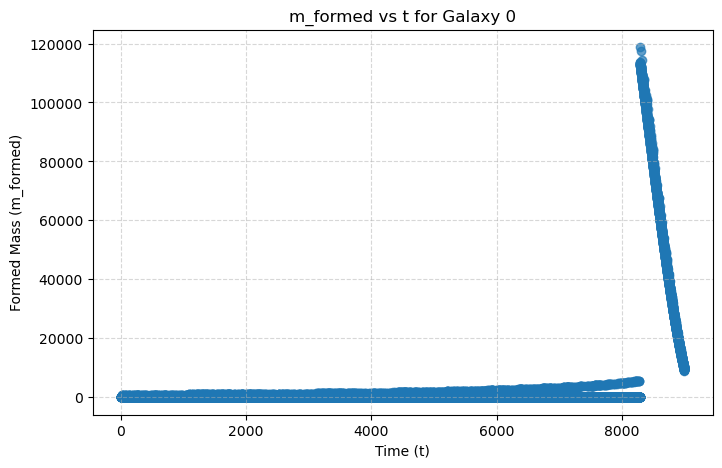

In [1]:
# Read the dataset

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18 as cosmo
from astropy.cosmology import z_at_value
import astropy.units as u

#define what SFH step we want to plot
sfh_step = 'sfh_25_50'
mass_assembly = os.environ['mass_assembly']  # Make sure this is set in your environment
filepath = os.path.join(mass_assembly, 'SFH_mpi', sfh_step, 'SFHs_alt_0.5_quenched_all_bursts.h5')
#print all the keys in the file
with pd.HDFStore(filepath, 'r') as store:
    print("Keys in the HDF5 file:")
    print(store.keys())


# load the data

df = pd.read_hdf(filepath, key='9000')


# display all the data  
# Extract time and formed mass for galaxy 0
# Filter the DataFrame for galaxy number 0

# Filter rows where the index is 0 (i.e., the first galaxy)
gal0 = df[df.index == 0 ]

# Plot m_formed vs t
plt.figure(figsize=(8, 5))
plt.scatter(gal0['t'], gal0['m_formed'], alpha=0.7)
plt.xlabel('Time (t)')
plt.ylabel('Formed Mass (m_formed)')
plt.title('m_formed vs t for Galaxy 0')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

/tmp/ipykernel_856530/1694458197.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i, j].legend(fontsize=12, loc="upper left")
/tmp/ipykernel_856530/1694458197.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i, j].legend(fontsize=12, loc="upper left")
/tmp/ipykernel_856530/1694458197.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i, j].legend(fontsize=12, loc="upper left")
/tmp/ipykernel_856530/1694458197.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[

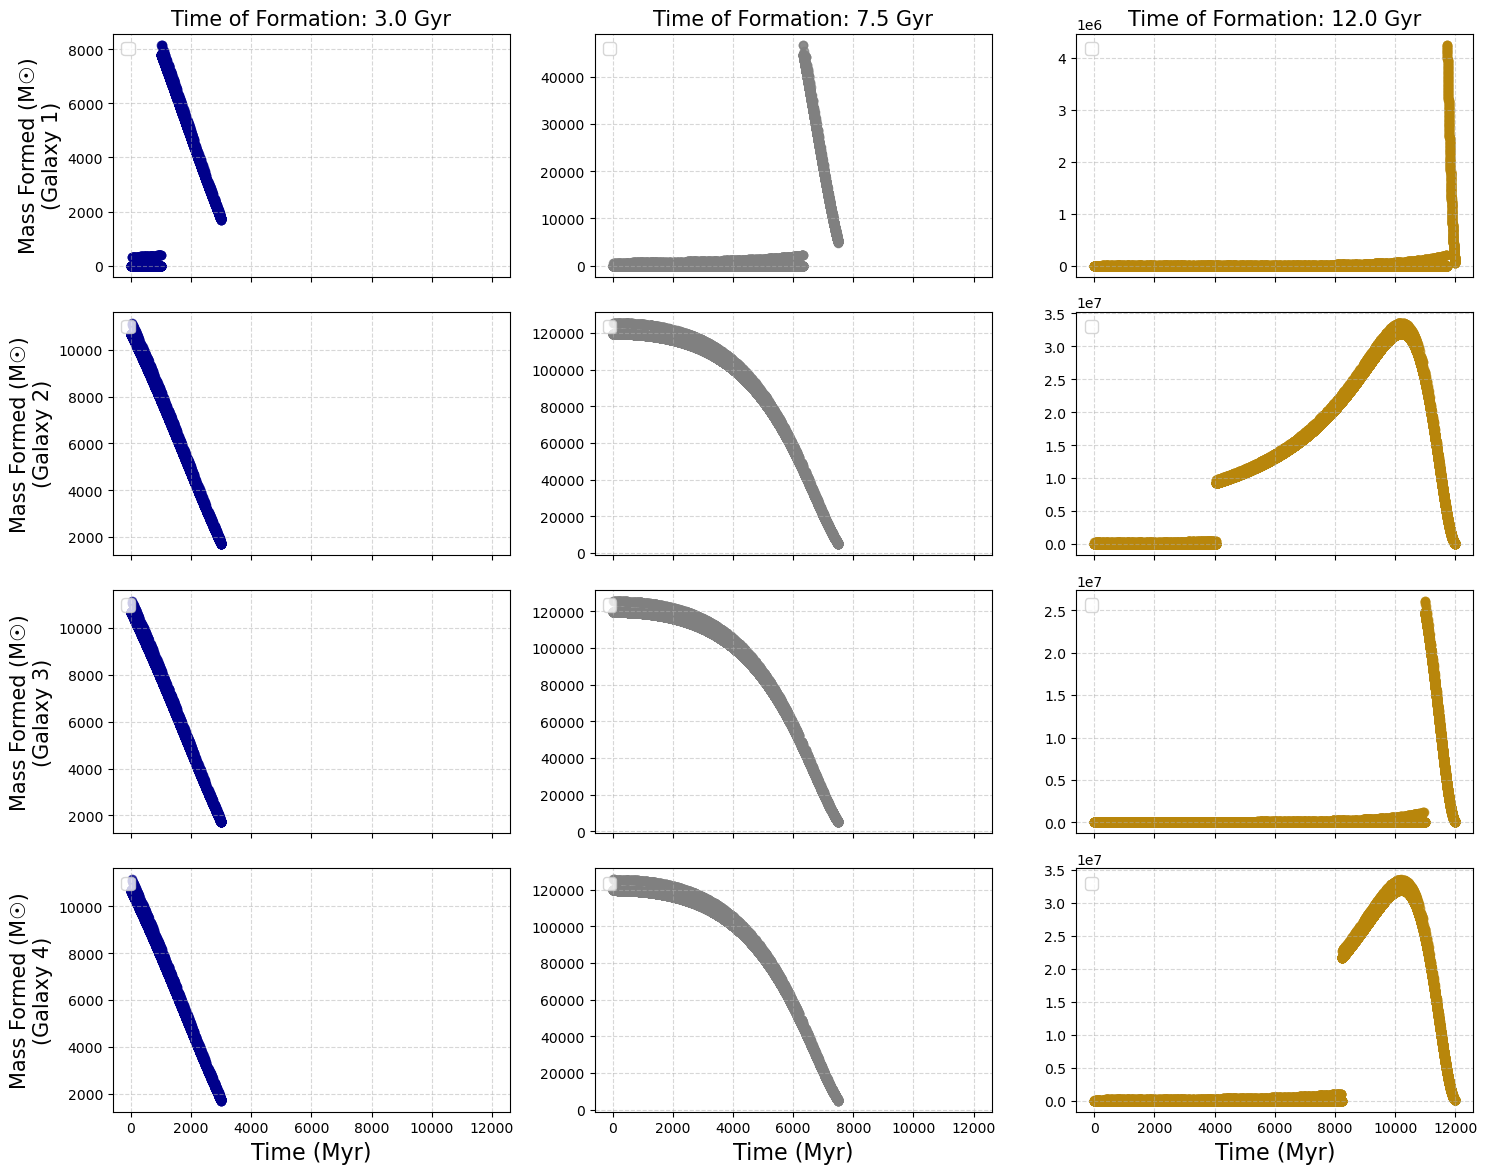

In [2]:


# Define what SFH step we want to plot
sfh_step = 'sfh_25_50'
mass_assembly = os.environ['mass_assembly']  # Make sure this is set in your environment
filepath = os.path.join(mass_assembly, 'SFH_mpi', sfh_step, 'SFHs_alt_0.5_quenched_all_bursts.h5')

# Define galaxies and keys
galaxies = [0, 27, 50, 40]
keys = ['3000', '7500', '12000']

# Assign distinct colors for each column/key
colors = ['darkblue', 'grey', 'darkgoldenrod']

# Create figure with 4 rows × 3 cols
fig, axes = plt.subplots(len(galaxies), len(keys), figsize=(15, 12), sharex=True, sharey=False)

for i, (gal_num, gal) in enumerate(zip(range(1, 5), galaxies)):
    for j, key in enumerate(keys):
        # Load the data for this key
        df = pd.read_hdf(filepath, key=key)

        # Filter rows for this galaxy
        gal_df = df[df.index == gal]

        # Plot m_formed vs t with column-specific color
        axes[i, j].scatter(
            gal_df['t'], gal_df['m_formed'],
            alpha=0.7, color=colors[j]
        )
        axes[i, j].grid(True, linestyle='--', alpha=0.5)

        # Only add x-axis label for bottom row
        if i == len(galaxies) - 1:
            axes[i, j].set_xlabel('Time (Myr)', fontsize=16)

        # Add y-axis label for first column with galaxy number 1–4
        if j == 0:
            axes[i, j].set_ylabel(f'Mass Formed (M☉)\n(Galaxy {gal_num})', fontsize=15)

        # Titles only on the first row
        if i == 0:
            time_gyr = float(key) / 1000  # convert Myr to Gyr
            axes[i, j].set_title(f'Time of Formation: {time_gyr:.1f} Gyr', fontsize=15)

        # Add legend (larger)
        axes[i, j].legend(fontsize=12, loc="upper left")

# Adjust layout
plt.tight_layout()
plt.show()


In [3]:

# Setup paths and keys

keys = [str(n) for n in np.arange(1000, 10000, 100)] + \
       [str(n) for n in np.arange(10000, 13000, 50)]

logM_all = []
z=[]

for key in keys:
    try:
        df = pd.read_hdf(filepath, key)
    except Exception as e:
        print(f"Skipping key {key} due to error: {e}")
        continue

    df = df[df['m_tot'] > 0]  # keep valid
    logM = np.log10(df['m_tot'])
    logM_all.extend(logM)
    z.extend(df['z'].values)


    



235815000
Counts: [ 2628845  3313680  4095760  4723607  5196915  5478253  6068659  6266204
  6777580  7259807  7400187  7306862  7737817  7894546  8706665  9160561
  9589780 10599699 11652116 12470516 13181967 12240366 11429233 10595484
 11210746  9888588  9366201  6825279  4600583  1811479   337015]
Bin centers: [ 6.1  6.3  6.5  6.7  6.9  7.1  7.3  7.5  7.7  7.9  8.1  8.3  8.5  8.7
  8.9  9.1  9.3  9.5  9.7  9.9 10.1 10.3 10.5 10.7 10.9 11.1 11.3 11.5
 11.7 11.9 12.1]
Number density: [0.01114791 0.01405203 0.01736853 0.02003099 0.0220381  0.02323115
 0.02573483 0.02657254 0.02874109 0.03078603 0.03138132 0.03098557
 0.03281308 0.03347771 0.03692159 0.03884639 0.04066654 0.04494921
 0.04941211 0.05288262 0.05589961 0.05190665 0.04846695 0.04493134
 0.04754043 0.04193367 0.03971843 0.02894336 0.01950929 0.00768178
 0.00142915]


/tmp/ipykernel_856530/1946230754.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


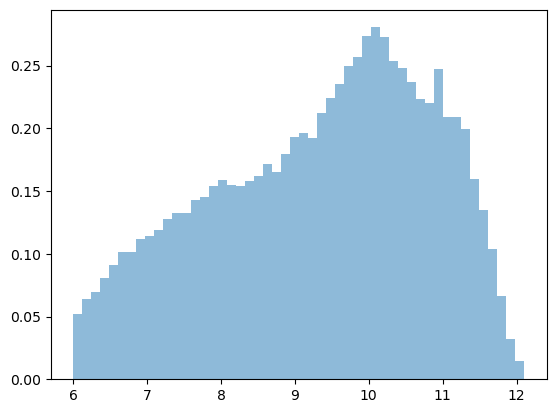

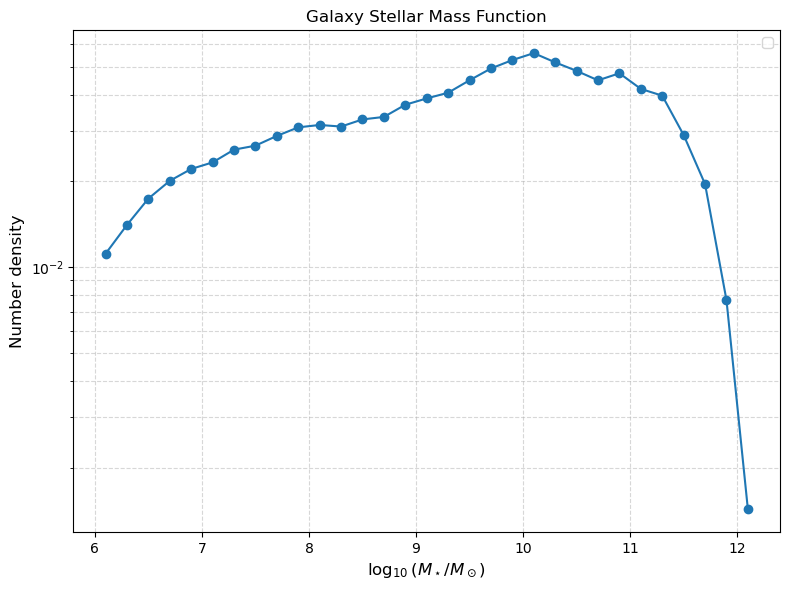

In [4]:
def double_schechter(logM, logM_star=10.66, phi1=3.96e-3, alpha1=-0.35, phi2=0.79e-3, alpha2=-1.47):
    M = 10**logM
    M_star = 10**logM_star
    term1 = phi1 * (M / M_star)**alpha1
    term2 = phi2 * (M / M_star)**alpha2
    return np.log(10) * (term1 + term2) * np.exp(-M / M_star) * M

# Convert to numpy array if needed
logM_all = np.array(logM_all)
print(len(logM_all))
plt.hist(logM_all, bins=50, density=True, alpha=0.5, label='Log Mass Distribution')

bin_width = 0.2
bins = np.arange(6, 12.1 + bin_width, bin_width)

counts, edges = np.histogram(logM_all, bins=bins)
print(f"Counts: {counts}")

box_size = 700  # Mpc
volume = box_size ** 3  # Mpc^3

number_density = counts / np.sum(counts)

bin_centers = 0.5 * (edges[:-1] + edges[1:])
unique_logM = np.unique(logM_all)

schecter = double_schechter(unique_logM)
schecter /= np.sum(schecter)  # Normalize the Schechter function

print(f"Bin centers: {bin_centers}")
print(f"Number density: {number_density}")
# ------------------------------
plt.figure(figsize=(8, 6))

plt.plot(bin_centers, number_density, marker='o', linestyle='-')
#plt.plot(unique_logM, schecter, color='red', linestyle='--', label='Double Schechter Fit')


plt.xlabel(r'$\log_{10}(M_\star/M_\odot)$', fontsize=12)
plt.ylabel('Number density', fontsize=12)
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.title('Galaxy Stellar Mass Function')
plt.legend()
plt.tight_layout()
plt.show()



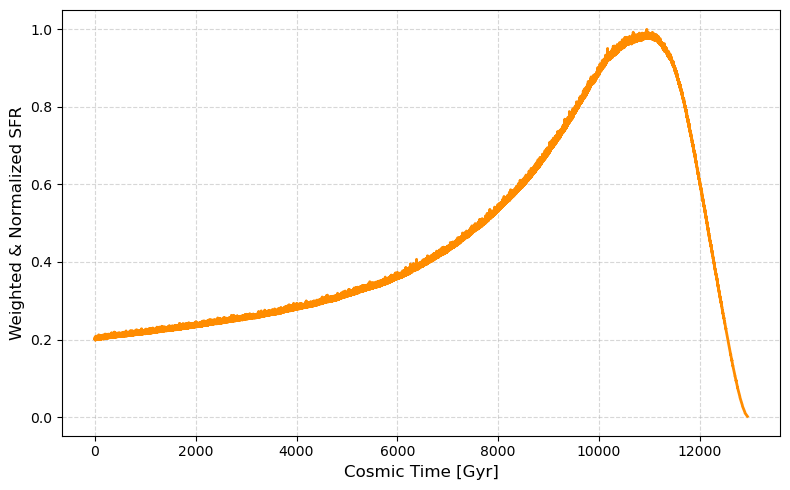

In [ ]:

# Baldry+2018 double Schechter function
def double_schechter(logM, logM_star=10.66, phi1=3.96e-3, alpha1=-0.35, phi2=0.79e-3, alpha2=-1.47):
    M = 10**logM
    M_star = 10**logM_star
    term1 = phi1 * (M / M_star)**alpha1
    term2 = phi2 * (M / M_star)**alpha2
    return np.log(10) * (term1 + term2) * np.exp(-M / M_star) * M

# Setup paths and keys
sfh_step = 'sfh_50_100'
mass_assembly = os.environ['mass_assembly']
filepath = os.path.join(mass_assembly, 'SFH_mpi', sfh_step, 'SFHs_alt_0.5_quenched_all_bursts.h5')

keys = [str(n) for n in np.arange(1000, 10000, 100)] + \
       [str(n) for n in np.arange(10000, 13000, 50)]

# Accumulate weighted m_formed per time bin
m_formed_weighted_total = {}
weighted_total = {}

for key in keys:
    try:
        df = pd.read_hdf(filepath, key)
    except Exception as e:
        print(f"Skipping key {key} due to error: {e}")
        continue

    df = df[df['m_formed'] > 0]  # remove invalid logs

    logM = np.log10(df['m_formed'])
    weights = double_schechter(logM)
    df['weighted_m_formed'] = df['m_formed'] * weights
    df['weights'] = weights

    grouped = df.groupby('t')['weighted_m_formed'].sum()
    

    for t_val, m_val in grouped.items():
        m_formed_weighted_total[t_val] = m_formed_weighted_total.get(t_val, 0) + m_val

# Prepare time and SFH arrays
t_sorted = sorted(m_formed_weighted_total.keys())
t_array = np.array(t_sorted)
m_formed_weighted_array = np.array([m_formed_weighted_total[t] for t in t_sorted])
m_formed_weighted_norm = m_formed_weighted_array / np.max(m_formed_weighted_array)


# Plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(t_array, m_formed_weighted_norm, color='darkorange', linewidth=2)
ax.set_xlabel('Cosmic Time [Gyr]', fontsize=12)
ax.set_ylabel('Weighted & Normalized SFR', fontsize=12)
#ax.set_title(f'Weighted SFH ({sfh_step}) with Redshift Axis', fontsize=13)
ax.grid(alpha=0.5, linestyle='--')


plt.tight_layout()
plt.show()



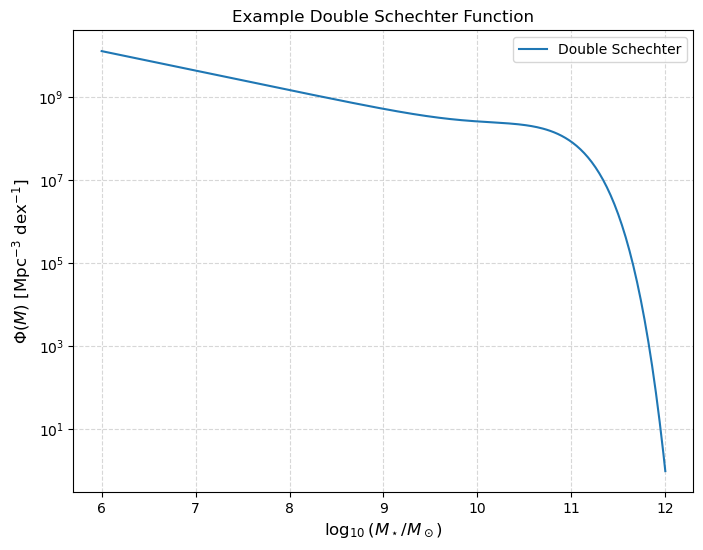

In [ ]:

logM_vals = np.linspace(6, 12, 300)  # 6 to 12 in log10(M)

# -----------------------------
# 3. Compute Schechter function
# -----------------------------
phi_vals = double_schechter(logM_vals)

# -----------------------------
# 4. Plot
# -----------------------------
plt.figure(figsize=(8, 6))
plt.plot(logM_vals, phi_vals, label='Double Schechter')

plt.yscale('log')
plt.xlabel(r'$\log_{10}(M_\star/M_\odot)$', fontsize=12)
plt.ylabel(r'$\Phi(M)$ [Mpc$^{-3}$ dex$^{-1}$]', fontsize=12)
plt.title('Example Double Schechter Function')
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.legend()
plt.show()


In [2]:
#!/usr/bin/env python
# coding: utf-8

# # MASS ASSEMBLY MODEL

# Read the dataset
import pandas as pd
import numpy as np
import matplotlib
import os
import matplotlib.pyplot as plt

#define what SFH step we want to plot
sfh_step = 'sfh_50_100'
mass_assembly = os.environ['mass_assembly']  # Make sure this is set in your environment
filepath = os.path.join(mass_assembly, 'SFH_mpi', sfh_step, 'SFHs_alt_0.5_quenched_all_bursts.h5')

# Option 1: Using pandas.HDFStore
import pandas as pd

with pd.HDFStore(filepath) as store:
    print(sorted(store.keys()))

#### Plotting the Star Formation History for different keys
keys = [3000, 10000, 12000]
colors = ['darkblue', 'grey', 'darkgoldenrod']

plt.figure(figsize=(15, 5))

for i, key in enumerate(keys):
    df = pd.read_hdf(os.path.join(mass_assembly, 'SFH_mpi', sfh_step, 'SFHs_alt_0.5_quenched_all_bursts.h5'), key=str(key))
    all_mass = df["m_formed"].values
    all_t = df["t"].values/1000
    m_total = np.max(df['m_tot'].iloc[-1])
    print(f"Max total mass for key {key}: {m_total}")

    ax = plt.subplot(1, 3, i+1)
    ax.scatter(all_t, all_mass, s=2, alpha=0.6, color=colors[i], edgecolors='none')
    ax.set_xlabel("Time (Gyr)")
    ax.set_ylabel("Mass formed")
    ax.set_yscale('log')
    ax.set_title(f"Time of formation = {key/1000} Gyr ")
    ax.grid(True, which="both", ls="--", lw=0.5, alpha=0.7)

plt.tight_layout()
plt.show()


keys = [str(n) for n in np.arange(1000, 10000, 100)] + \
       [str(n) for n in np.arange(10000, 13000, 50)] 

plt.figure(figsize=(11, 6))

colors = plt.cm.cividis(np.linspace(0, 1, len(keys)))

# Select 10 uniformly spaced indices for the legend
legend_targets = ['1000','1500', '2000', '2500', '3000', '3500', '4000', '4500', '5000', '5500', '6000', '6500', '7000', '7500', '8000', '8500', '9000', '9500', '10000', '10500', '11000', '11500', '12000', '12500', '13000']
legend_handles = []
legend_labels = []

for i, key in enumerate(keys):
    df_all = pd.read_hdf(
        os.path.join(mass_assembly, 'SFH_mpi', sfh_step, 'SFHs_alt_0.5_quenched_all_bursts.h5'), key
    )
    df_t_zero = df_all[df_all['t'] == 0.5]
    m_tot_averaged = np.mean(df_t_zero['m_tot'])

    scatter = plt.scatter(df_all['t']/1000, df_all['m_formed'] / m_tot_averaged, s=1, color=colors[i])

    if key in legend_targets:
        legend_handles.append(scatter)
        legend_labels.append(f"{int(key) / 1000:.1f}")  

plt.legend(
    legend_handles,
    legend_labels,
    title='Time of formation (Gyr)',
    loc="upper right",
    ncol=6,
    fontsize=10,
    markerscale=6,
    handletextpad=0.4,
    borderpad=0.3,
    labelspacing=0.4,
    frameon=True,
    framealpha=0.9,
)
plt.xlabel("Time (Gyr)", fontsize=12)
plt.ylabel("Normalized Mass Formed", fontsize=12)
#plt.title("Star Formation History", fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

['/1000', '/10000', '/10050', '/10100', '/10150', '/10200', '/10250', '/10300', '/10350', '/10400', '/10450', '/10500', '/10550', '/10600', '/10650', '/10700', '/10750', '/10800', '/10850', '/10900', '/10950', '/1100', '/11000', '/11050', '/11100', '/11150', '/11200', '/11250', '/11300', '/11350', '/11400', '/11450', '/11500', '/11550', '/11600', '/11650', '/11700', '/11750', '/11800', '/11850', '/11900', '/11950', '/1200', '/12000', '/12050', '/12100', '/12150', '/12200', '/12250', '/12300', '/12350', '/12400', '/12450', '/12500', '/12550', '/12600', '/12650', '/12700', '/12750', '/12800', '/12850', '/12900', '/12950', '/1300', '/1400', '/1500', '/1600', '/1700', '/1800', '/1900', '/2000', '/2100', '/2200', '/2300', '/2400', '/2500', '/2600', '/2700', '/2800', '/2900', '/3000', '/3100', '/3200', '/3300', '/3400', '/3500', '/3600', '/3700', '/3800', '/3900', '/4000', '/4100', '/4200', '/4300', '/4400', '/4500', '/4600', '/4700', '/4800', '/4900', '/5000', '/5100', '/5200', '/5300', '/5

KeyboardInterrupt: 

# HOST GALAXY 

# hostlib mpi

## sfh mpi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Path to your HDF5 file
hostlib_path = os.environ['hostlib']  # Make sure HOSTLIB is set in your environment
file_path = os.path.join(hostlib_path, 'output_hostlib_mpi', 'SFH_mpi', 'smaller_sfh', 'all_model_params_quench_BC03_z_rv_rand_full_age_dists_neb_U-2.00_res_5_beta_1.14.h5')
print(file_path)

# Load the data using the known key
df_raw = pd.read_hdf(file_path, key='main')
print(df_raw)

/priv/debass/DES/SIMS/hostlib/output_hostlib_mpi/SFH_mpi/smaller_sfh/all_model_params_quench_BC03_z_rv_rand_full_age_dists_neb_U-2.00_res_5_beta_1.14.h5
          z          mass          ssfr      mean_age        Av        Rv  \
0      0.01  3.864026e+11  1.276039e-13  11618.075622  0.000000  2.897126   
1      0.01  3.864026e+11  1.276039e-13  11618.075622  0.107143  4.469958   
2      0.01  3.864026e+11  1.276039e-13  11618.075622  0.214286  3.214477   
3      0.01  3.864026e+11  1.276039e-13  11618.075622  0.321429  3.719174   
4      0.01  3.864026e+11  1.276039e-13  11618.075622  0.428571  4.043677   
...     ...           ...           ...           ...       ...       ...   
16825  1.11  2.169707e+11  8.466079e-13   2536.614217  1.071429  3.480155   
16826  1.11  2.169707e+11  8.466079e-13   2536.614217  1.178571  3.765345   
16827  1.11  2.169707e+11  8.466079e-13   2536.614217  1.285714  2.471708   
16828  1.11  2.169707e+11  8.466079e-13   2536.614217  1.392857  3.408265   


In [3]:

df = df_raw[df_raw['z'] < 1.1]

# Prepare data
x_mass = np.log10(df["mass"])
df["U"] = df["U"].apply(lambda x: x[0])
df["R"] = df["R"].apply(lambda x: x[0])
y_color = df["U"]   - df["R"]  # U - R color
x_age = df["mean_age"] / 1000  # Convert to Gyr

# Create figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# First plot: U - R vs Mass
sns.kdeplot(
    x=x_mass,
    y=y_color,
    ax=axs[0],
    cmap="viridis",
    fill=False,
    levels=10,
    linewidths=1.2
)
axs[0].set_xlabel("Mass (log10)")
axs[0].set_ylabel("U - R")
axs[0].set_xlim(8, 12)
axs[0].set_ylim(-0.2, 2.9)
axs[0].set_title("U - R vs Mass (MPI)")
axs[0].grid(True)

# Second plot: U - R vs Mean Age
sns.kdeplot(
    x=x_age,
    y=y_color,
    ax=axs[1],
    cmap="plasma",
    fill=False,
    levels=10,
    linewidths=1.2
)
axs[1].set_xlabel("Mean Age (Gyr)")
axs[1].set_xlim(0, 6)
axs[1].set_title("U - R vs Mean Age")
axs[1].grid(True)

# Save the figure using the first plot's filename
output_filename = 'contour_plot_U_R_vs_mass_mpi_sfh_mpi.png'
plt.tight_layout()
plt.savefig(output_filename, dpi=300)
plt.show()


TypeError: 'float' object is not subscriptable

In [ ]:
df = df_raw[df_raw['z'] < 1.1].copy()

# Safe access: if sdssu/sdssr is a float, just take it directly
df["U"] = df["U"].apply(lambda x: x[0])
df["R"] = df["R"].apply(lambda x: x[0])
df["sdssu"] = df["sdssu"].apply(lambda x: x[0])
df["sdssr"] = df["sdssr"].apply(lambda x: x[0])
# Compute all U-R variants
U_R_bessel_vega = df["U"] - df["R"]
U_R_sdss_AB = df["sdssu"] -df["sdssr"]
U_R_sdss_vega = df["U_R"]

mass = np.log10(df["mass"])
mean_age = df["mean_age"] / 1000


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of (U-R name, label, colormap)
ur_systems = [
    (U_R_bessel_vega, "U - R (Bessel Filter, vega)", "viridis"),
    (U_R_sdss_vega, "U - R (SDSS filter, vega)", "cividis"),
    (U_R_sdss_AB, "U - R (SDSS filter, AB)", "plasma")
]

#

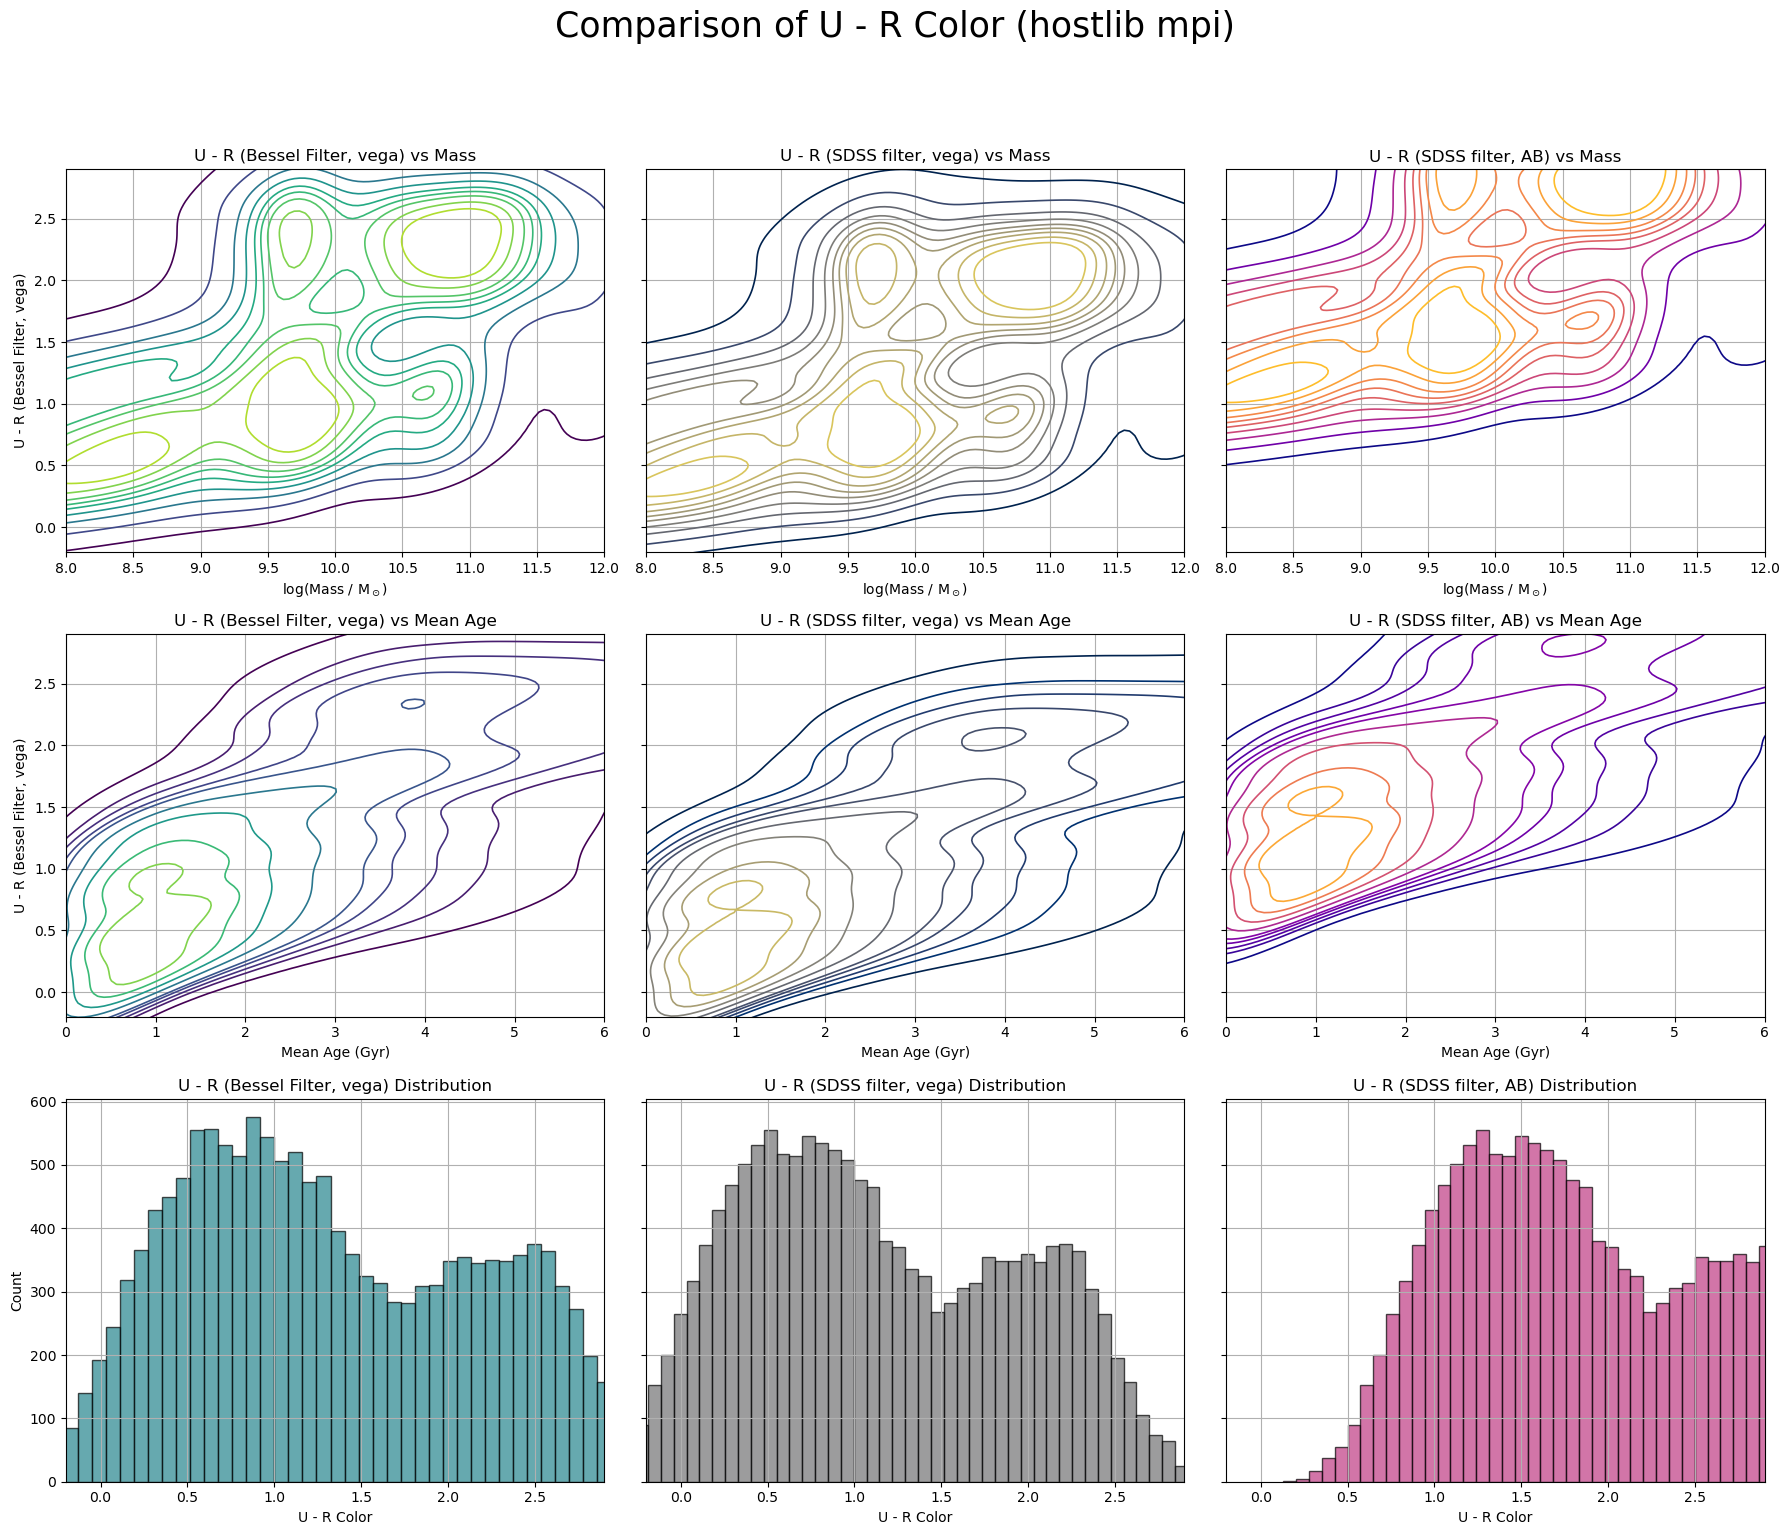

In [ ]:
# Set up the 3x3 plot grid
fig, axs = plt.subplots(3, 3, figsize=(18, 15), sharey='row')

# Loop over each U-R system and create 3 plots: vs mass, vs age, and histogram
for i, (ur_col, ur_label, cmap) in enumerate(ur_systems):
    # Row 1: U - R vs log_mass
    sns.kdeplot(
        x=mass,
        y=ur_col,
        ax=axs[0, i],
        cmap=cmap,
        fill=False,
        levels=10,
        linewidths=1.2
    )
    axs[0, i].set_title(f"{ur_label} vs Mass")
    axs[0, i].set_xlabel("log(Mass / M$_\odot$)")
    axs[0, i].set_xlim(8, 12)
    axs[0, i].set_ylim(-0.2, 2.9)
    axs[0, i].grid(True)
    if i == 0:
        axs[0, i].set_ylabel(ur_label)
    else:
        axs[0, i].set_ylabel("")

    # Row 2: U - R vs mean age
    sns.kdeplot(
        x=mean_age,
        y=ur_col,
        ax=axs[1, i],
        cmap=cmap,
        fill=False,
        levels=10,
        linewidths=1.2
    )
    axs[1, i].set_title(f"{ur_label} vs Mean Age")
    axs[1, i].set_xlabel("Mean Age (Gyr)")
    axs[1, i].set_xlim(0, 6)
    axs[1, i].set_ylim(-0.2, 2.9)
    axs[1, i].grid(True)
    if i == 0:
        axs[1, i].set_ylabel(ur_label)
    else:
        axs[1, i].set_ylabel("")

    # Row 3: Histogram of U - R distribution
    axs[2, i].hist(ur_col, bins=50, color=sns.color_palette(cmap, 10)[4], edgecolor='black', alpha=0.7)
    axs[2, i].set_title(f"{ur_label} Distribution")
    axs[2, i].set_xlabel("U - R Color")
    axs[2, i].set_xlim(-0.2, 2.9)
    axs[2, i].grid(True)
    if i == 0:
        axs[2, i].set_ylabel("Count")
    else:
        axs[2, i].set_ylabel("")

# Layout and save
fig.suptitle("Comparison of U - R Color (hostlib mpi)", fontsize=25, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # adjust spacing for suptitle
plt.savefig("ur_mass_age_distribution_comparison.png", dpi=300)
plt.show()


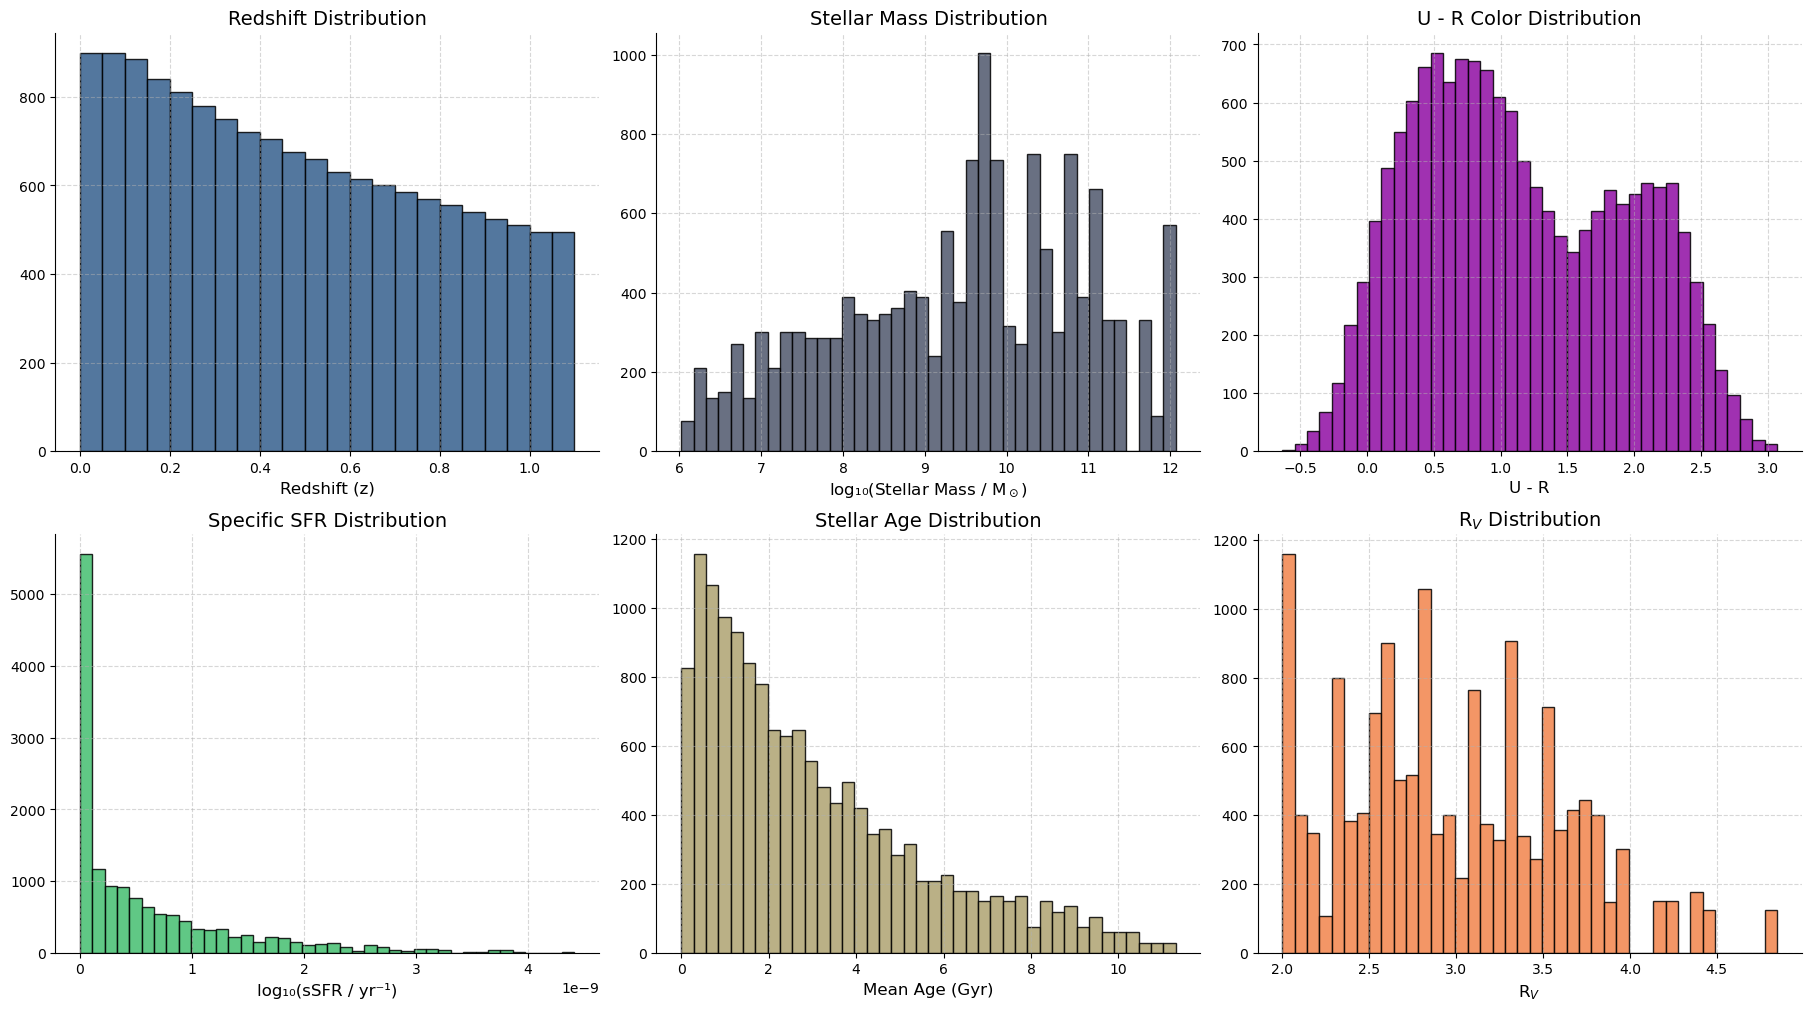

0        0.01
1        0.01
2        0.01
3        0.01
4        0.01
         ... 
15610    1.06
15611    1.06
15612    1.06
15613    1.06
15614    1.06
Name: z, Length: 14745, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Data
redshift = df["z"]
mass = np.log10(df["mass"])
ssfr = df["ssfr"]
mean_age = df["mean_age"] / 1000  # Gyr
Av = df["Av"]
Rv = df["Rv"]
y_color = df["U_R"]

# Colormaps
colormaps = [cm.viridis, cm.cividis, cm.plasma]
colors = [
    colormaps[0](0.3),  # redshift — viridis
    colormaps[1](0.3),  # mass — cividis
    colormaps[2](0.3),  # U-R — plasma
    colormaps[0](0.7),  # ssfr — viridis
    colormaps[1](0.7),  # mean_age — cividis
    colormaps[2](0.7),  # Rv — plasma
]

# Subplot
fig, axs = plt.subplots(2, 3, figsize=(18, 10), constrained_layout=True)

# Plot configs: (data, label, color)
plot_data = [
    (redshift,np.arange(0, 1.15, 0.05), "Redshift (z)", "Redshift Distribution"),
    (mass, 40, "log₁₀(Stellar Mass / M$_\odot$)", "Stellar Mass Distribution"),
    (y_color , 40, "U - R", "U - R Color Distribution"),
    (ssfr,40,  "log₁₀(sSFR / yr⁻¹)", "Specific SFR Distribution"),
    (mean_age, 40,  "Mean Age (Gyr)", "Stellar Age Distribution"),
    (Rv, 40,  "R$_V$", "R$_V$ Distribution")
]

# Fill plots
for ax, (data, bins, xlabel, title), color in zip(axs.flatten(), plot_data, colors):
    ax.hist(data, bins=bins, color=color, edgecolor="black", alpha=0.85)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.tick_params(axis='both', labelsize=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Save and show
plt.show()
print(redshift)

# hostlib nonmpi

## sfh mpi

/priv/debass/DES/SIMS/hostlib/output_hostlib/SFH_mpi/sfh_50_100/all_model_params_quench_BC03_z_rv_rand_full_age_dists_neb_U-2.00_res_5_beta_1.14.h5
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05]
Index(['z', 'mass', 'ssfr', 'mean_age', 'Av', 'Rv', 'delta', 'U_R',
       'pred_rate_x1_hi', 'pred_rate_x1_lo', 'pred_rate_total', 't_f', 'm_g',
       'm_r', 'm_i', 'm_z', 'U', 'B', 'V', 'R', 'I', 'sdssu', 'sdssg', 'sdssr',
       'sdssi', 'sdssz', 'galid_spec', 'g_r'],
      dtype='object')
0        -21.066898
1        -20.975107
2        -20.885422
3        -20.798690
4        -20.705909
            ...    
746995    30.189094
746996    29.696705
746997    30.607169
746998    30.044078
746999    30.624714
Name: m_r, Length: 747000, dtype: float64
7.260204987989947e-14 3.808638228253718e-09


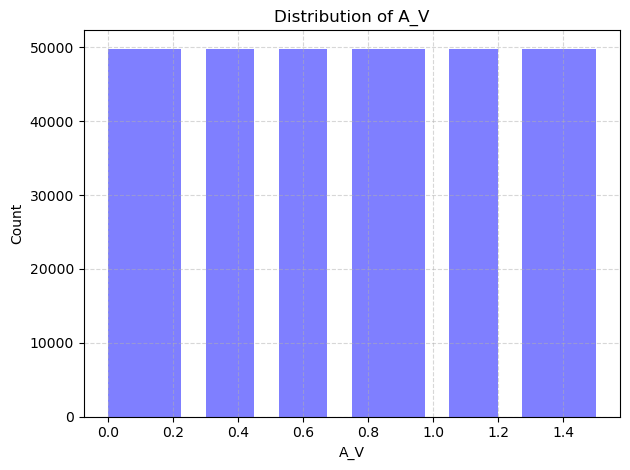

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

sfh_step= 'sfh_50_100'
# Path to your HDF5 file
hostlib_path = os.environ['hostlib']  # Make sure HOSTLIB is set in your environment
file_path = os.path.join(hostlib_path, 'output_hostlib', 'SFH_mpi', 'sfh_50_100','all_model_params_quench_BC03_z_rv_rand_full_age_dists_neb_U-2.00_res_5_beta_1.14.h5')
print(file_path)

# Load the data using the known key
df_hostlib = pd.read_hdf(file_path, key='main')
print(df_hostlib['z'].unique())
print(df_hostlib.columns)
print(df_hostlib['m_r'])
print(np.min(df_hostlib['ssfr']), np.max(df_hostlib['ssfr']))

plt.hist(df_hostlib['Av'], bins=20, alpha=0.5, color='blue')
plt.xlabel('A_V')
plt.ylabel('Count')
plt.title('Distribution of A_V')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


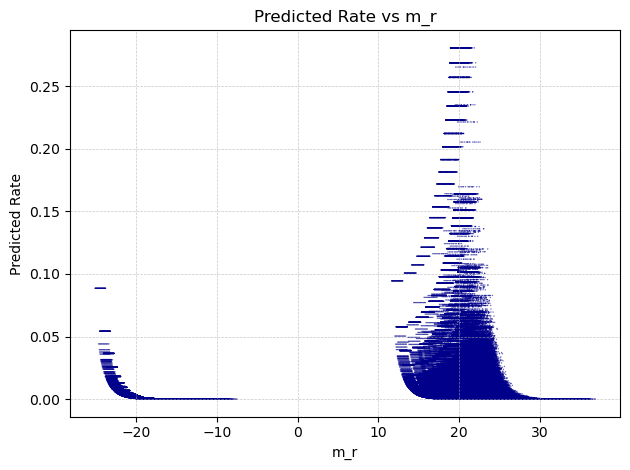

In [ ]:

# Prepare data
x_mass = np.log10(df_hostlib["mass"])
y_color = df_hostlib["U_R"]
x_age = df_hostlib["mean_age"] / 1000  # Convert to Gyr
# Data
redshift = df_hostlib["z"]
mass = np.log10(df_hostlib["mass"])
ssfr = df_hostlib["ssfr"]
mean_age = df_hostlib["mean_age"] / 1000  # Gyr
Av = df_hostlib["Av"]
m_r= df_hostlib["m_r"]
Rv = df_hostlib["Rv"]
y_color = df_hostlib["U_R"]
pred_rate = df_hostlib["pred_rate_total"]
sdssr = df_hostlib["sdssr"]

plt.scatter(m_r, pred_rate, s=1, alpha=0.6, color='darkblue', edgecolors='none')
plt.xlabel("m_r")
plt.ylabel("Predicted Rate")
plt.title("Predicted Rate vs m_r")
plt.grid(True, which="both", ls="--", lw=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

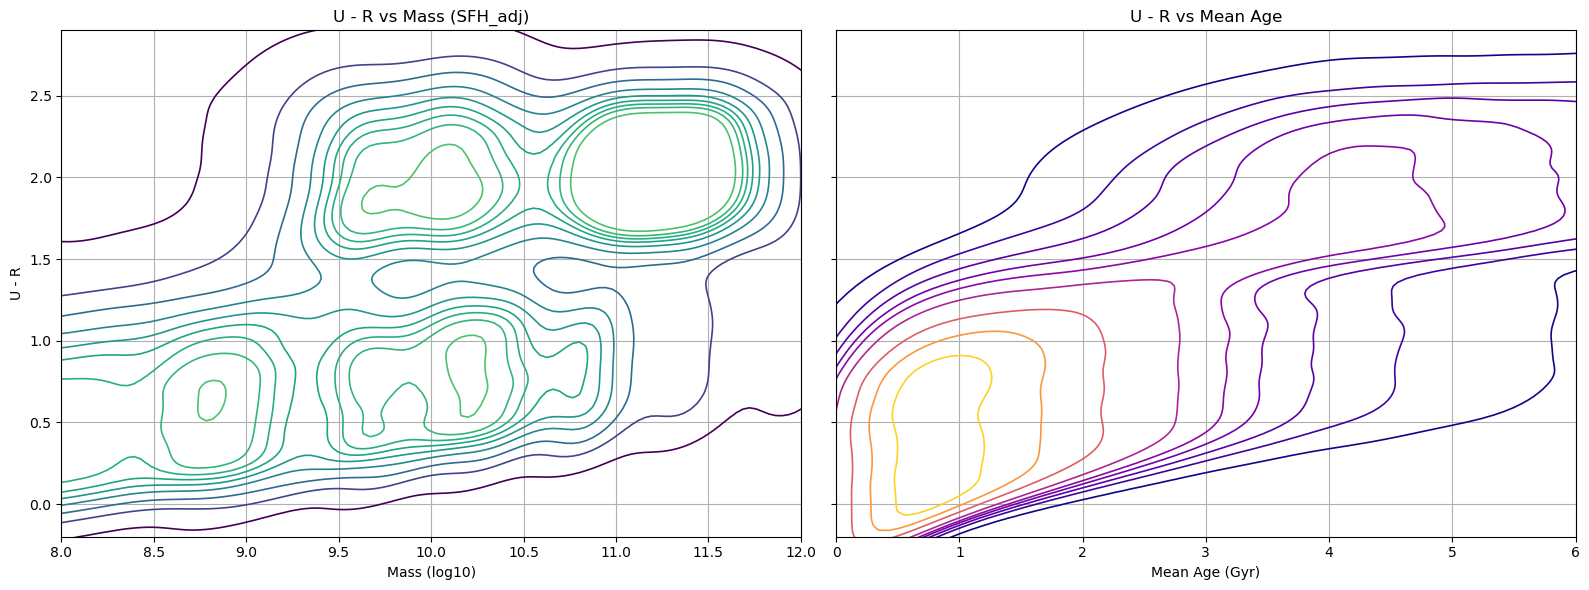

In [ ]:

# Create figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# First plot: U - R vs Mass
sns.kdeplot(
    x=x_mass,
    y=y_color,
    ax=axs[0],
    cmap="viridis",
    fill=False,
    levels=10,
    linewidths=1.2
)
axs[0].set_xlabel("Mass (log10)")
axs[0].set_ylabel("U - R")
axs[0].set_xlim(8, 12)
axs[0].set_ylim(-0.2, 2.9)
axs[0].set_title("U - R vs Mass (SFH_adj)")
axs[0].grid(True)

# Second plot: U - R vs Mean Age
sns.kdeplot(
    x=x_age,
    y=y_color,
    ax=axs[1],
    cmap="plasma",
    fill=False,
    levels=10,
    linewidths=1.2
)
axs[1].set_xlabel("Mean Age (Gyr)")
axs[1].set_xlim(0, 6)
axs[1].set_title("U - R vs Mean Age")
axs[1].grid(True)

# Save the figure using the first plot's filename
output_filename = 'contour_plot_U_R_vs_mass_sfh_mpi.png'
plt.tight_layout()
plt.show()


In [ ]:
# Safe access: if sdssu/sdssr is a float, just take it directly
df_hostlib["sdssu"] = df_hostlib["sdssu"].apply(lambda x: x[0])
df_hostlib["sdssr"] = df_hostlib["sdssr"].apply(lambda x: x[0])
df_hostlib["U"] = df_hostlib["U"].apply(lambda x: x[0])
df_hostlib["R"] = df_hostlib["R"].apply(lambda x: x[0])
# Compute all U-R variants
U_R_bessel_vega = df_hostlib["U"] - df_hostlib["R"]
U_R_sdss_AB = df_hostlib["sdssu"] - df_hostlib["sdssr"]
U_R_sdss_vega = df_hostlib["U_R"]


mass = np.log10(df_hostlib["mass"])
mean_age = df_hostlib["mean_age"] / 1000

#

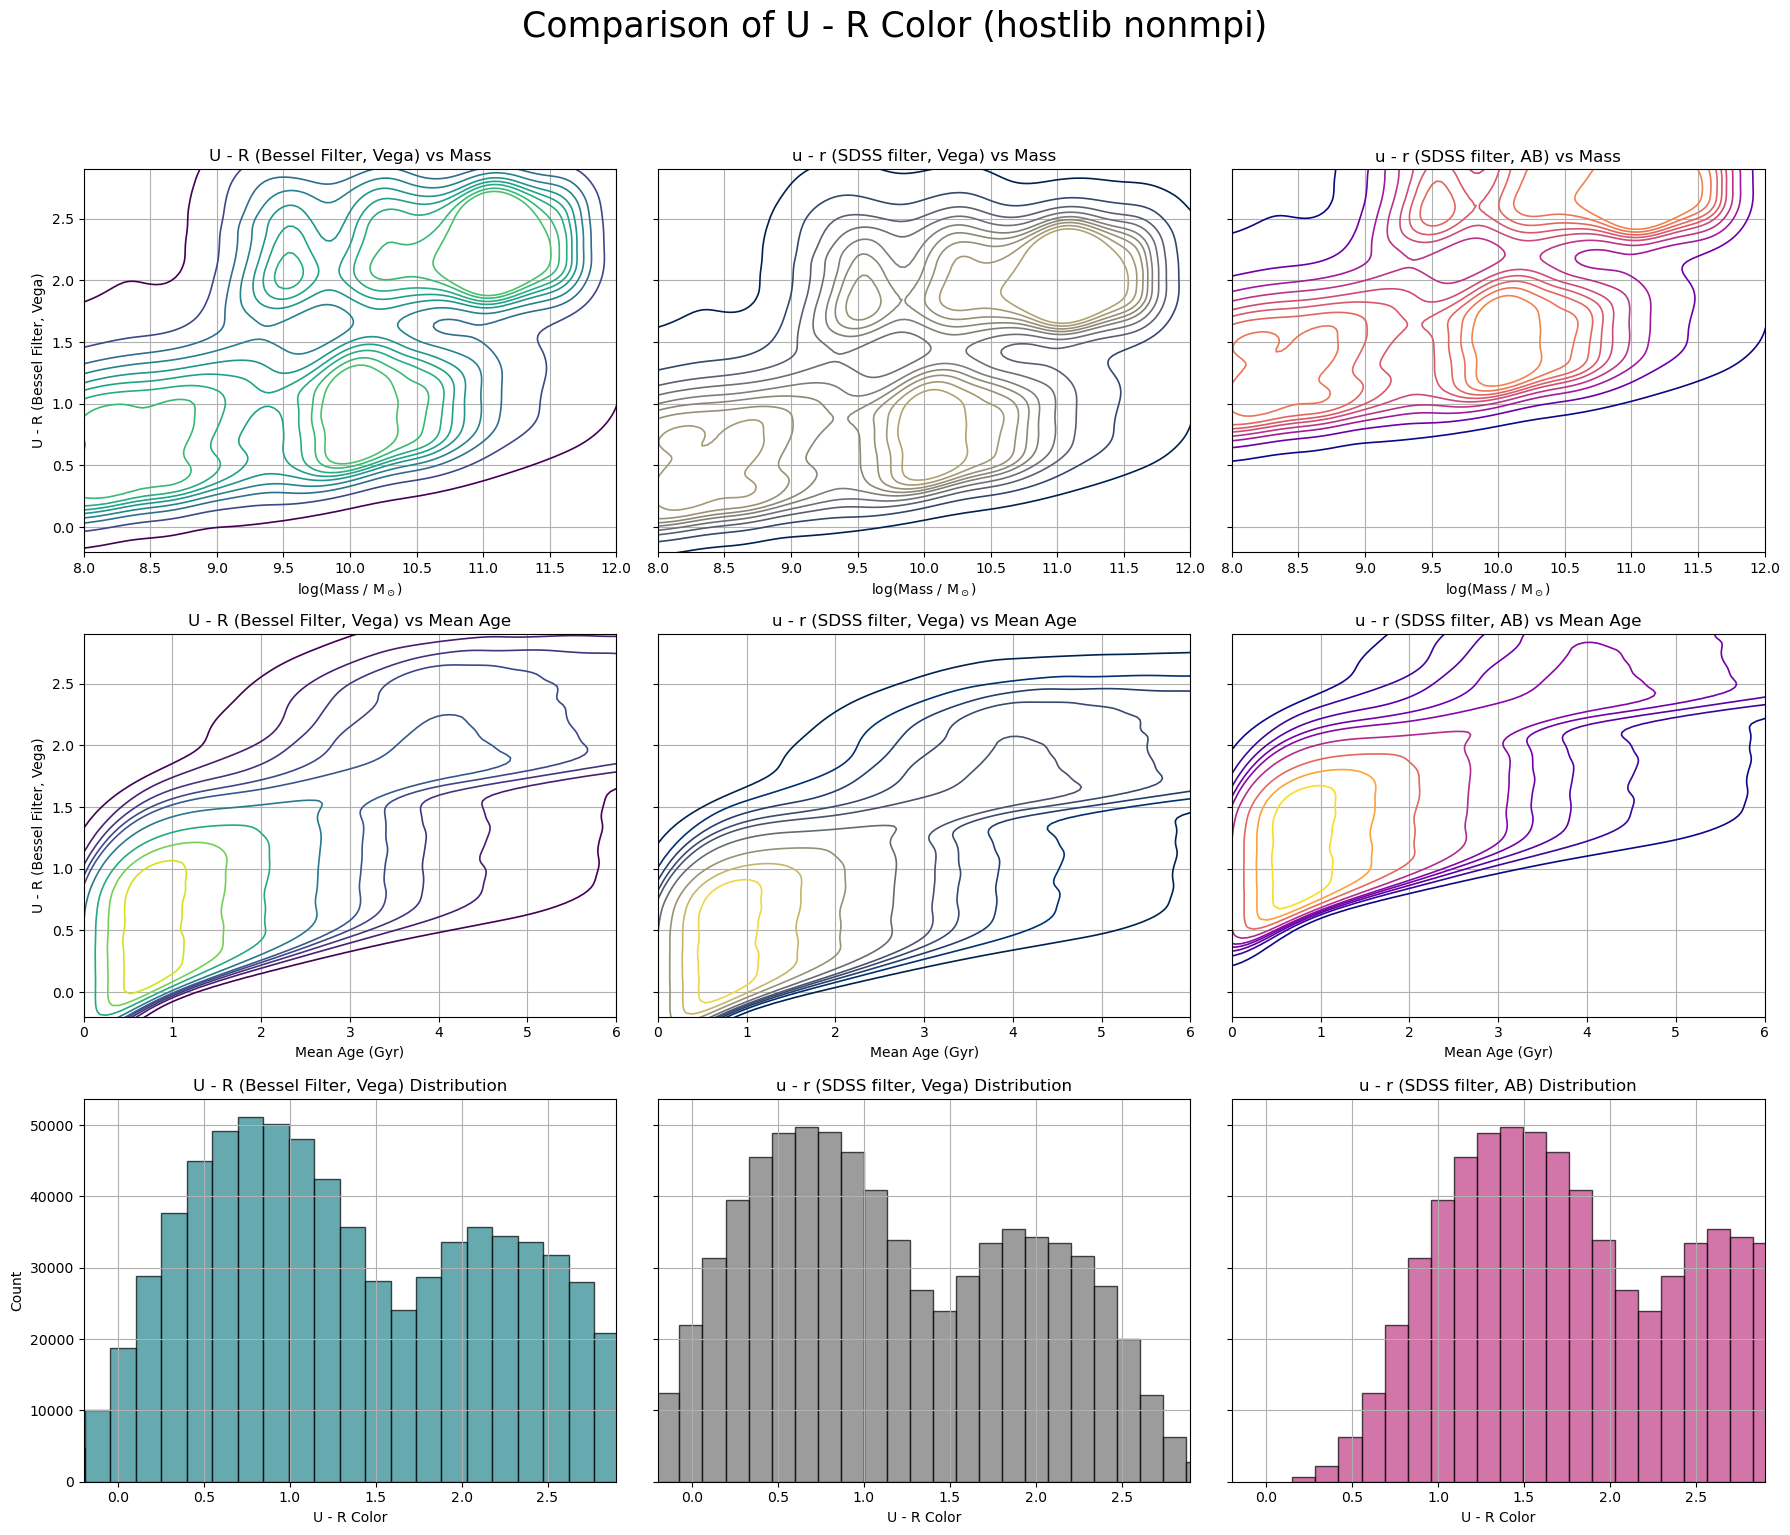

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of (U-R name, label, colormap)
ur_systems = [
    (U_R_bessel_vega, "U - R (Bessel Filter, Vega)", "viridis"),
    (U_R_sdss_vega, "u - r (SDSS filter, Vega)", "cividis"),
    (U_R_sdss_AB, "u - r (SDSS filter, AB)", "plasma")
]

# Set up the 3x3 plot grid
fig, axs = plt.subplots(3, 3, figsize=(18, 15), sharey='row')

# Loop over each U-R system and create 3 plots: vs mass, vs age, and histogram
for i, (ur_col, ur_label, cmap) in enumerate(ur_systems):
    # Row 1: U - R vs log_mass
    sns.kdeplot(
        x=mass,
        y=ur_col,
        ax=axs[0, i],
        cmap=cmap,
        fill=False,
        levels=10,
        linewidths=1.2
    )
    axs[0, i].set_title(f"{ur_label} vs Mass")
    axs[0, i].set_xlabel("log(Mass / M$_\odot$)")
    axs[0, i].set_xlim(8, 12)
    axs[0, i].set_ylim(-0.2, 2.9)
    axs[0, i].grid(True)
    if i == 0:
        axs[0, i].set_ylabel(ur_label)
    else:
        axs[0, i].set_ylabel("")

    # Row 2: U - R vs mean age
    sns.kdeplot(
        x=mean_age,
        y=ur_col,
        ax=axs[1, i],
        cmap=cmap,
        fill=False,
        levels=10,
        linewidths=1.2
    )
    axs[1, i].set_title(f"{ur_label} vs Mean Age")
    axs[1, i].set_xlabel("Mean Age (Gyr)")
    axs[1, i].set_xlim(0, 6)
    axs[1, i].set_ylim(-0.2, 2.9)
    axs[1, i].grid(True)
    if i == 0:
        axs[1, i].set_ylabel(ur_label)
    else:
        axs[1, i].set_ylabel("")

    # Row 3: Histogram of U - R distribution
    axs[2, i].hist(ur_col, bins=30, color=sns.color_palette(cmap, 10)[4], edgecolor='black', alpha=0.7)
    axs[2, i].set_title(f"{ur_label} Distribution")
    axs[2, i].set_xlabel("U - R Color")
    axs[2, i].set_xlim(-0.2, 2.9)
    axs[2, i].grid(True)
    if i == 0:
        axs[2, i].set_ylabel("Count")
    else:
        axs[2, i].set_ylabel("")

# Layout and save
fig.suptitle("Comparison of U - R Color (hostlib nonmpi)", fontsize=25, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # adjust spacing for suptitle
plt.show()


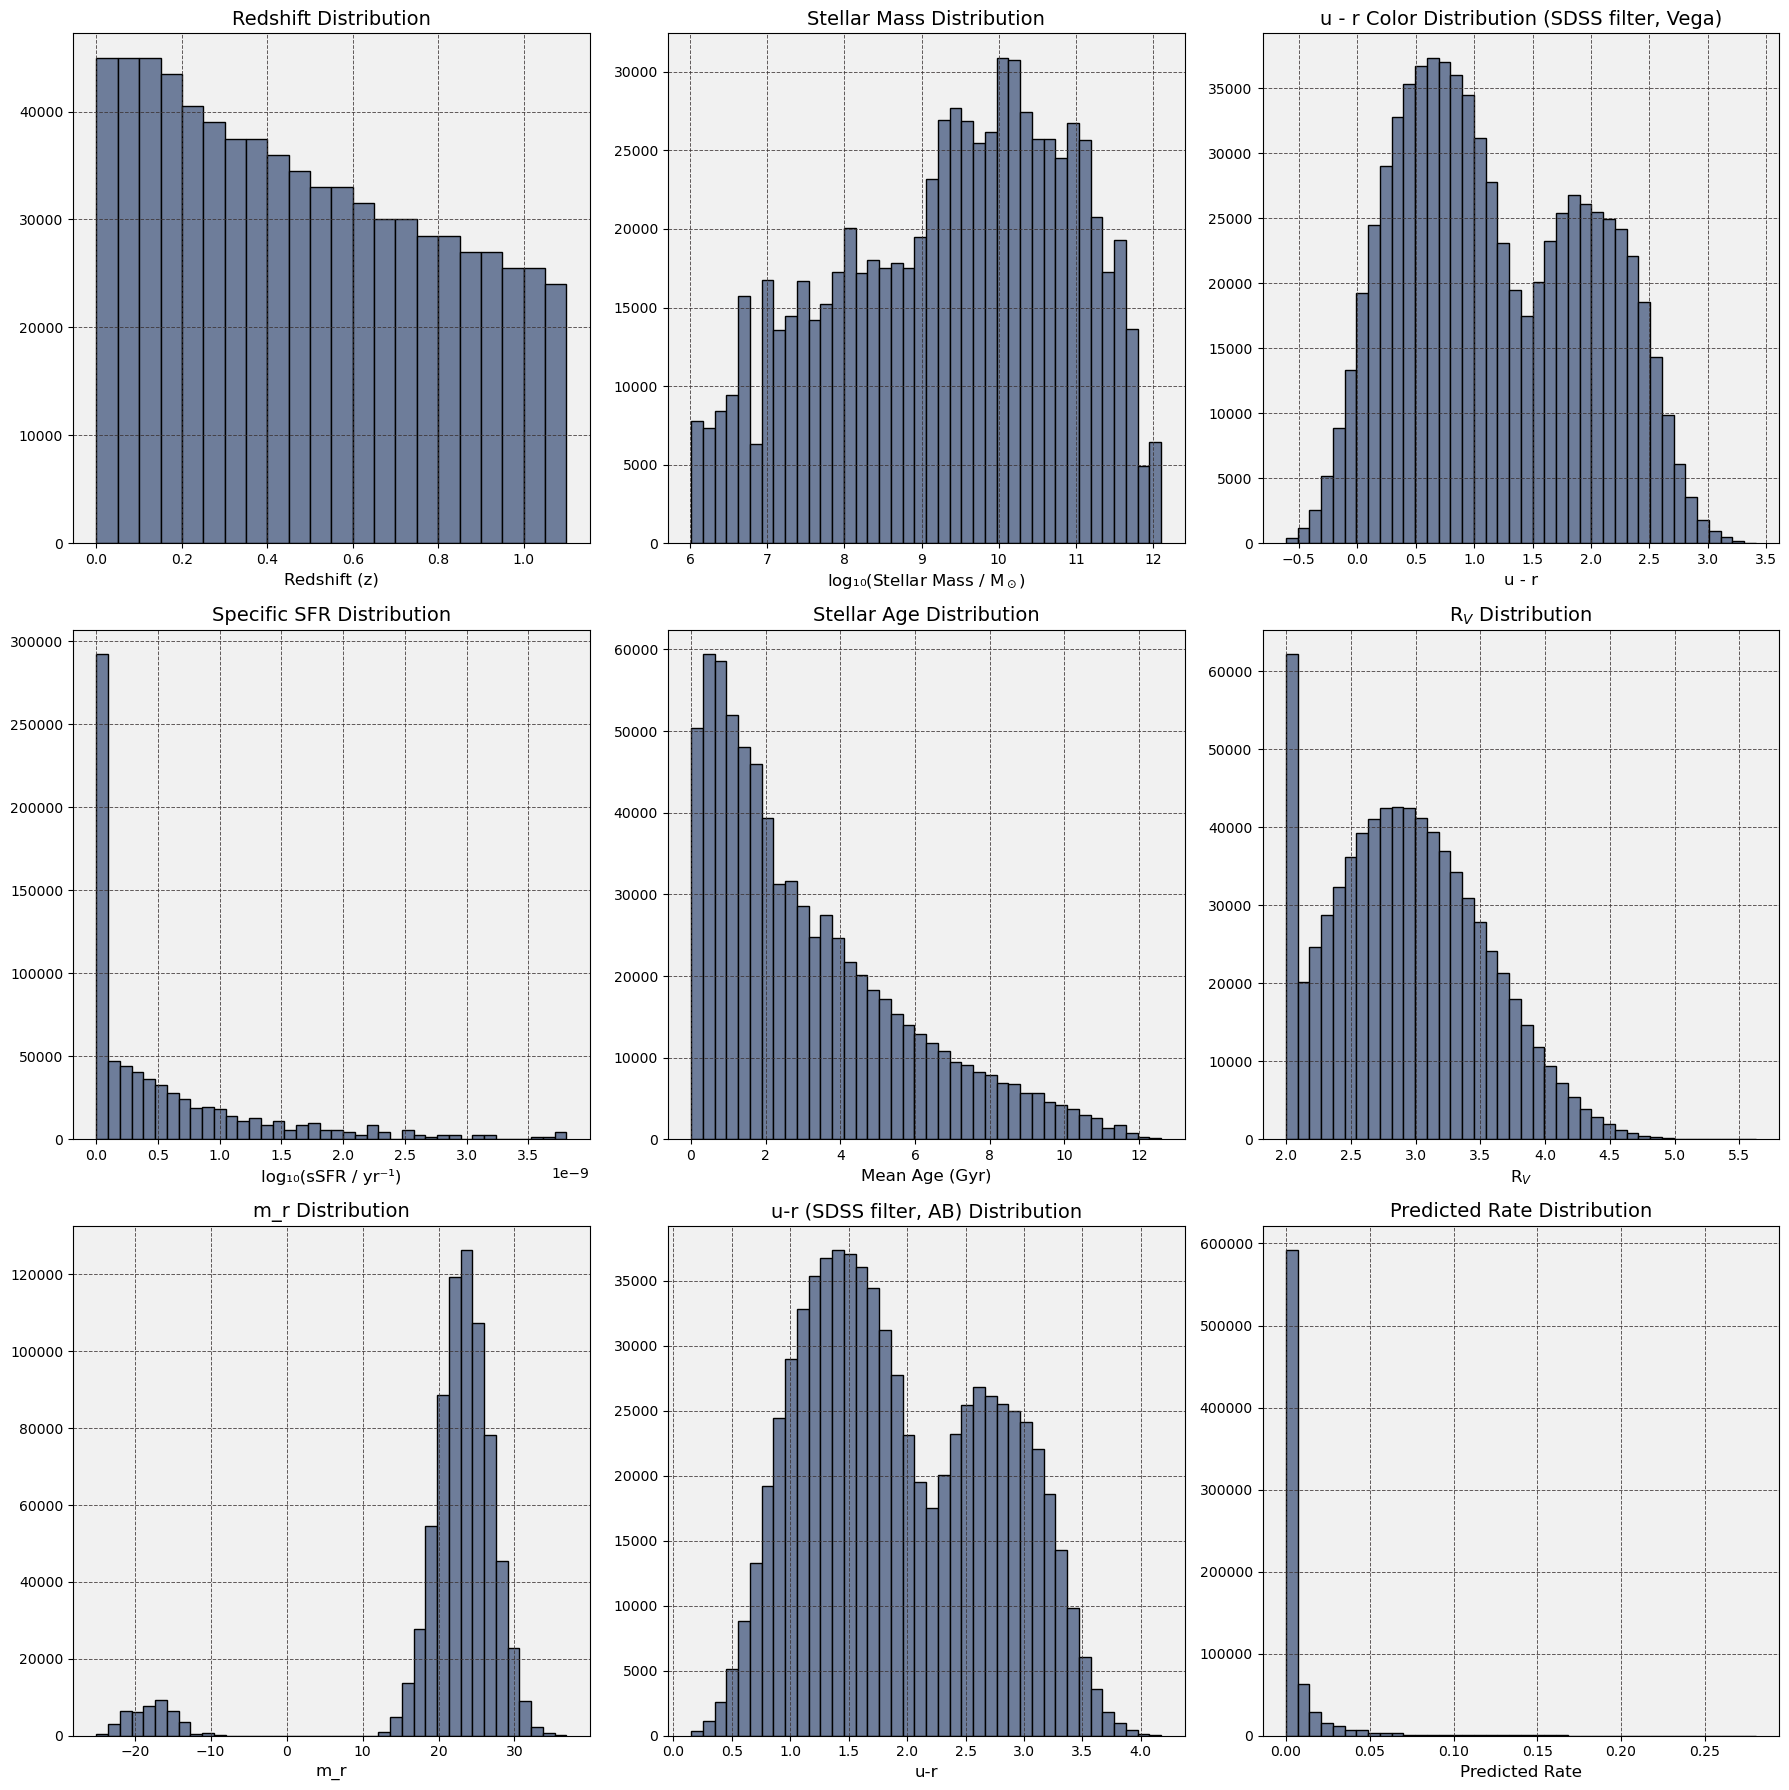

In [ ]:
import matplotlib.pyplot as plt

# Choose a single bright color (e.g., a bright blue)
hist_color = "#6E7D9A"

fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Plot configs: (data, bins, xlabel, title)
plot_data = [
    (redshift, np.arange(0, 1.15, 0.05), "Redshift (z)", "Redshift Distribution"),
    (mass, 40, "log₁₀(Stellar Mass / M$_\odot$)", "Stellar Mass Distribution"),
    (y_color, 40, "u - r", "u - r Color Distribution (SDSS filter, Vega)"),
    (ssfr, 40, "log₁₀(sSFR / yr⁻¹)", "Specific SFR Distribution"),
    (mean_age, 40, "Mean Age (Gyr)", "Stellar Age Distribution"),
    (Rv, 40, "R$_V$", "R$_V$ Distribution"),
    (m_r, 40, "m_r", "m_r Distribution"),
    (U_R_sdss_AB, 40, "u-r", "u-r (SDSS filter, AB) Distribution"),
    (pred_rate, 40, "Predicted Rate", "Predicted Rate Distribution")    
    
]

for ax, (data, bins, xlabel, title) in zip(axs.flatten(), plot_data):
    ax.hist(data, bins=bins, color=hist_color, edgecolor="black")
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.grid(True, linestyle="--", linewidth=0.7, alpha=0.8, color="#3A3232")
    ax.tick_params(axis='both', labelsize=10)
    ax.set_facecolor("#f1f1f1")  # light background for subplot

plt.tight_layout()
plt.show()


# SN SIMULATION

## Plot DES and OzDES data

/tmp/ipykernel_3323387/886263198.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df1 = pd.read_csv(DES_data, delim_whitespace=True, comment='#', names=columns, skiprows=data_start)


       CID   CIDint  IDSURVEY  TYPE FIELD  CUTFLAG_SNANA  ERRFLAG_FIT  \
0  1562098  1562098        10     0    X2              3            0   
1  1702083  1702083        10     0    C2              3            0   
2  1311632  1311632        10     0    X1              3            0   
3  1314162  1314162        10     0    X3              3            0   
4  1279488  1279488        10     0    X3              3            0   

      zHEL  zHELERR     zCMB  ...  biasCorErr_mu  biasCor_mB  biasCor_x1  \
0  0.57747    0.001  0.57618  ...            0.0         0.0         0.0   
1  0.38932    0.001  0.38884  ...            0.0         0.0         0.0   
2  0.42538    0.001  0.42420  ...            0.0         0.0         0.0   
3  0.58267    0.001  0.58141  ...            0.0         0.0         0.0   
4  0.49532    0.001  0.49412  ...            0.0         0.0         0.0   

   biasCor_c  biasCor_muCOVSCALE  IDSAMPLE  IZBIN   LOG_OII  LOG_OII_ERR  \
0        0.0                

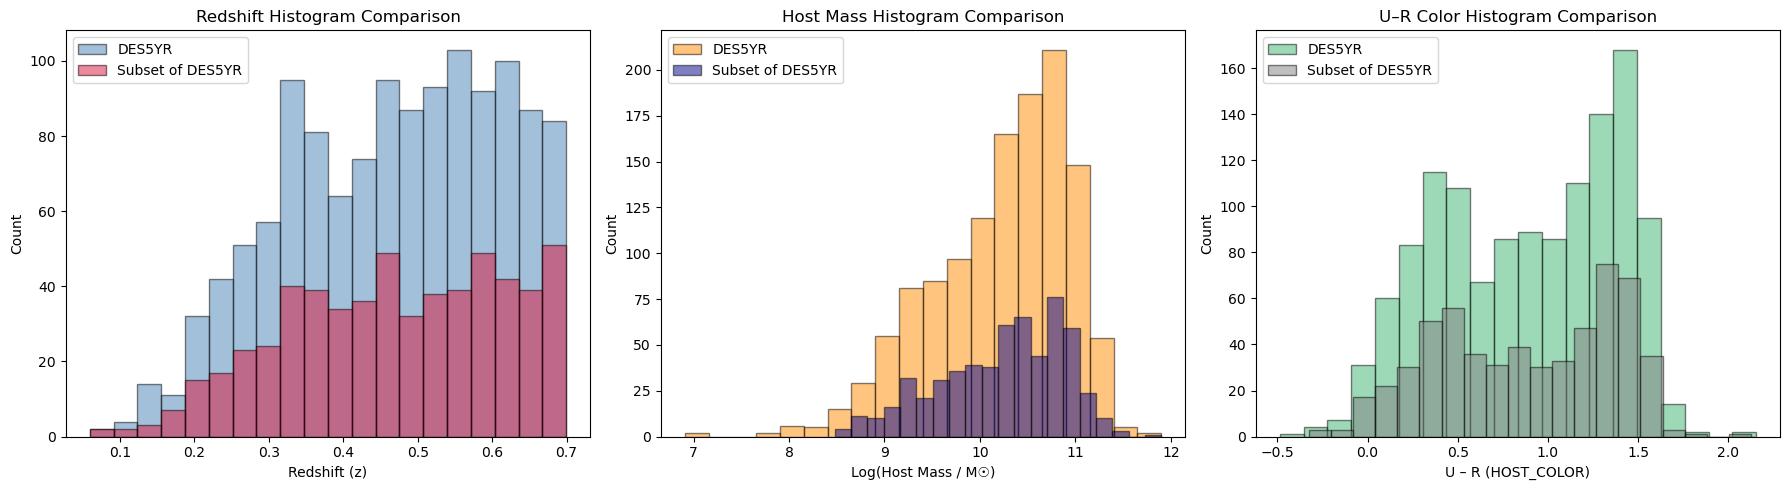

25.12963


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load FITRES file
DES_data= os.path.join(os.environ['DESCODE'], 'SIMS', 'DES-OzDES_data', 'BBC1D_fixgamma0.FITRES')  # Make sure DES_data is set in your environment
#fitres_path = "/Users/ishfahanirusyda/master_thesis/DES-OzDES_data/BBC1D_fixgamma0.FITRES"

# Detect and read FITRES column headers
with open(DES_data, 'r') as f:
    lines = f.readlines()
for i, line in enumerate(lines):
    if line.startswith("VARNAMES:"):
        columns = line.strip().split()[1:]
        data_start = i + 1
        break

# Read FITRES into df1
df1 = pd.read_csv(DES_data, delim_whitespace=True, comment='#', names=columns, skiprows=data_start)

# Filter data where zHD <= -0.7 (check if this is correct; usually redshift is positive!)
filtered = df1[df1['zHD'] <= 0.7]

# Load the OII data
subDES = os.path.join(os.environ['DESCODE'], 'SIMS', 'DES-OzDES_data', 'ozdes_oII.csv')
df2 = pd.read_csv(subDES)

# Merge on 'CID' (inner join to match only relevant rows)
df_merged = pd.merge(filtered, df2[['CID', 'LOG_OII', 'LOG_OII_ERR', 'SPECZ']], on='CID', how='inner')
# Print counts
print(df_merged.head(5))
print(f"Total entries after filtering : {len(filtered)}")
print(f"Entries matched with OII data: {len(df_merged)}")
# Begin plotting
plt.figure(figsize=(18, 5))

# Redshift comparison
plt.subplot(1, 3, 1)
plt.hist(filtered['zHD'], bins=20, alpha=0.5, label='DES5YR', color='steelblue', edgecolor='black')
plt.hist(df_merged['zHD'], bins=20, alpha=0.5, label='Subset of DES5YR', color='crimson', edgecolor='black')
plt.xlabel('Redshift (z)')
plt.ylabel('Count')
plt.title('Redshift Histogram Comparison')
plt.legend()

# Host Mass comparison
plt.subplot(1, 3, 2)
plt.hist(filtered['HOST_LOGMASS'], bins=20, alpha=0.5, label='DES5YR', color='darkorange', edgecolor='black')
plt.hist(df_merged['HOST_LOGMASS'], bins=20, alpha=0.5, label='Subset of DES5YR', color='darkblue', edgecolor='black')
plt.xlabel('Log(Host Mass / M☉)')
plt.ylabel('Count')
plt.title('Host Mass Histogram Comparison')
plt.legend()

# U-R (HOST_COLOR) comparison
plt.subplot(1, 3, 3)
plt.hist(filtered['HOST_COLOR'], bins=20, alpha=0.5, label='DES5YR', color='mediumseagreen', edgecolor='black')
plt.hist(df_merged['HOST_COLOR'], bins=20, alpha=0.5, label='Subset of DES5YR', color='gray', edgecolor='black')
plt.xlabel('U – R (HOST_COLOR)')
plt.ylabel('Count')
plt.title('U–R Color Histogram Comparison')
plt.legend()

plt.tight_layout()
plt.show()

print(np.max(df1['mB']))

/tmp/ipykernel_3323387/711281034.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df1 = pd.read_csv(DES_data, delim_whitespace=True, comment='#', names=columns, skiprows=data_start)


       CID   CIDint  IDSURVEY  TYPE FIELD  CUTFLAG_SNANA  ERRFLAG_FIT  \
0  1562098  1562098        10     0    X2              3            0   
1  1702083  1702083        10     0    C2              3            0   
2  1309227  1309227        10     0    C3              3            0   
3  1311632  1311632        10     0    X1              3            0   
4  1314162  1314162        10     0    X3              3            0   

      zHEL  zHELERR     zCMB  ...  biasCorErr_mu  biasCor_mB  biasCor_x1  \
0  0.57747    0.001  0.57618  ...            0.0         0.0         0.0   
1  0.38932    0.001  0.38884  ...            0.0         0.0         0.0   
2  0.92649    0.001  0.92576  ...            0.0         0.0         0.0   
3  0.42538    0.001  0.42420  ...            0.0         0.0         0.0   
4  0.58267    0.001  0.58141  ...            0.0         0.0         0.0   

   biasCor_c  biasCor_muCOVSCALE  IDSAMPLE  IZBIN   LOG_OII  LOG_OII_ERR  \
0        0.0                

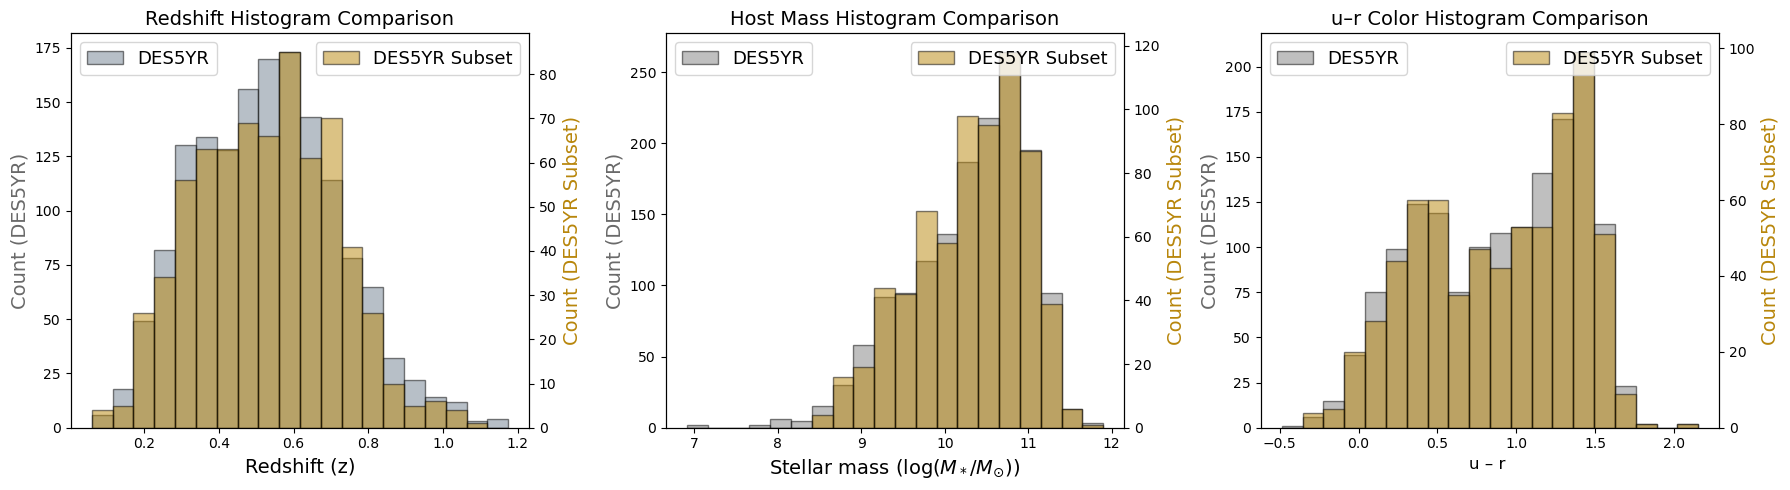

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Load FITRES file
DES_data = os.path.join(os.environ['DESCODE'], 'SIMS', 'DES-OzDES_data', 'BBC1D_fixgamma0.FITRES')

# Detect and read FITRES column headers
with open(DES_data, 'r') as f:
    lines = f.readlines()
for i, line in enumerate(lines):
    if line.startswith("VARNAMES:"):
        columns = line.strip().split()[1:]
        data_start = i + 1
        break

# Read FITRES into df1
df1 = pd.read_csv(DES_data, delim_whitespace=True, comment='#', names=columns, skiprows=data_start)

# Filter data
filtered = df1[df1['zHD'] <= 1.2]

# Load OII data
subDES = os.path.join(os.environ['DESCODE'], 'SIMS', 'DES-OzDES_data', 'ozdes_oII.csv')
df2 = pd.read_csv(subDES)

# Merge on CID
df_merged = pd.merge(filtered, df2[['CID', 'LOG_OII', 'LOG_OII_ERR', 'SPECZ']], on='CID', how='inner')

# Print info
print(df_merged.head(5))
print(f"Total entries after filtering : {len(filtered)}")
print(f"Entries matched with OII data: {len(df_merged)}")

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Shared binning helper
def get_bins(data1, data2, bins=20):
    combined = pd.concat([data1, data2])
    return np.histogram_bin_edges(combined, bins=bins)

# Redshift
bins = get_bins(filtered['zHD'], df_merged['zHD'])
ax = axes[0]
counts1, _ = np.histogram(filtered['zHD'], bins=bins)
counts2, _ = np.histogram(df_merged['zHD'], bins=bins)
ax.bar(bins[:-1], counts1, width=np.diff(bins), align='edge', alpha=0.5, label='DES5YR', color='slategrey', edgecolor='black')
ax2 = ax.twinx()
ax2.bar(bins[:-1], counts2 , width=np.diff(bins), align='edge', alpha=0.5, label='DES5YR Subset', color='darkgoldenrod', edgecolor='black')
ax.set_xlabel('Redshift (z)', size=14)
ax.set_ylabel('Count (DES5YR)', color='dimgrey', size=14)
ax2.set_ylabel('Count (DES5YR Subset)', color='darkgoldenrod', size=14)
ax.set_title('Redshift Histogram Comparison', size=14)
ax.legend(loc='upper left', fontsize=13)
ax2.legend(loc='upper right', fontsize=13)

# Host Mass
bins = get_bins(filtered['HOST_LOGMASS'], df_merged['HOST_LOGMASS'])
ax = axes[1]
counts1, _ = np.histogram(filtered['HOST_LOGMASS'], bins=bins)
counts2, _ = np.histogram(df_merged['HOST_LOGMASS'], bins=bins)
ax.bar(bins[:-1], counts1, width=np.diff(bins), align='edge', alpha=0.5, label='DES5YR', color='gray', edgecolor='black')
ax2 = ax.twinx()
ax2.bar(bins[:-1], counts2 , width=np.diff(bins), align='edge', alpha=0.5, label='DES5YR Subset', color='darkgoldenrod', edgecolor='black')
ax.set_xlabel(r'Stellar mass ($\log(M_*/M_{\odot})$)', size=14)
ax.set_ylabel('Count (DES5YR)', color='dimgrey', size=14)
ax2.set_ylabel('Count (DES5YR Subset)', color='darkgoldenrod', size=14)
ax.set_title('Host Mass Histogram Comparison', size=14)
ax.legend(loc='upper left', fontsize=13)
ax2.legend(loc='upper right', fontsize=13)

# HOST_COLOR
bins = get_bins(filtered['HOST_COLOR'], df_merged['HOST_COLOR'])
ax = axes[2]
counts1, _ = np.histogram(filtered['HOST_COLOR'], bins=bins)
counts2, _ = np.histogram(df_merged['HOST_COLOR'], bins=bins)
ax.bar(bins[:-1], counts1 , width=np.diff(bins), align='edge', alpha=0.5, label='DES5YR', color='gray', edgecolor='black')
ax2 = ax.twinx()
ax2.bar(bins[:-1], counts2 , width=np.diff(bins), align='edge', alpha=0.5, label='DES5YR Subset', color='darkgoldenrod', edgecolor='black')
ax.set_xlabel('u – r ', size=12)
ax.set_ylabel('Count (DES5YR)', color='dimgrey', size=14)
ax2.set_ylabel('Count (DES5YR Subset)', color='darkgoldenrod', size=14)
ax.set_title('u–r Color Histogram Comparison', size=14)
ax.legend(loc='upper left', fontsize=13)
ax2.legend(loc='upper right', fontsize=13)


plt.tight_layout()
plt.show()


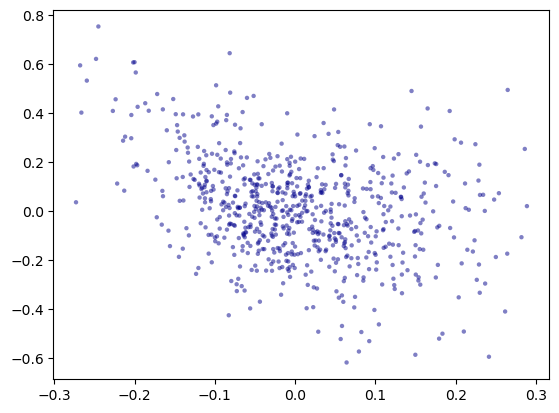

In [ ]:
plt.scatter(df_merged['c'], df_merged['MURES'], s=10, alpha=0.5, color='darkblue', edgecolors='none')

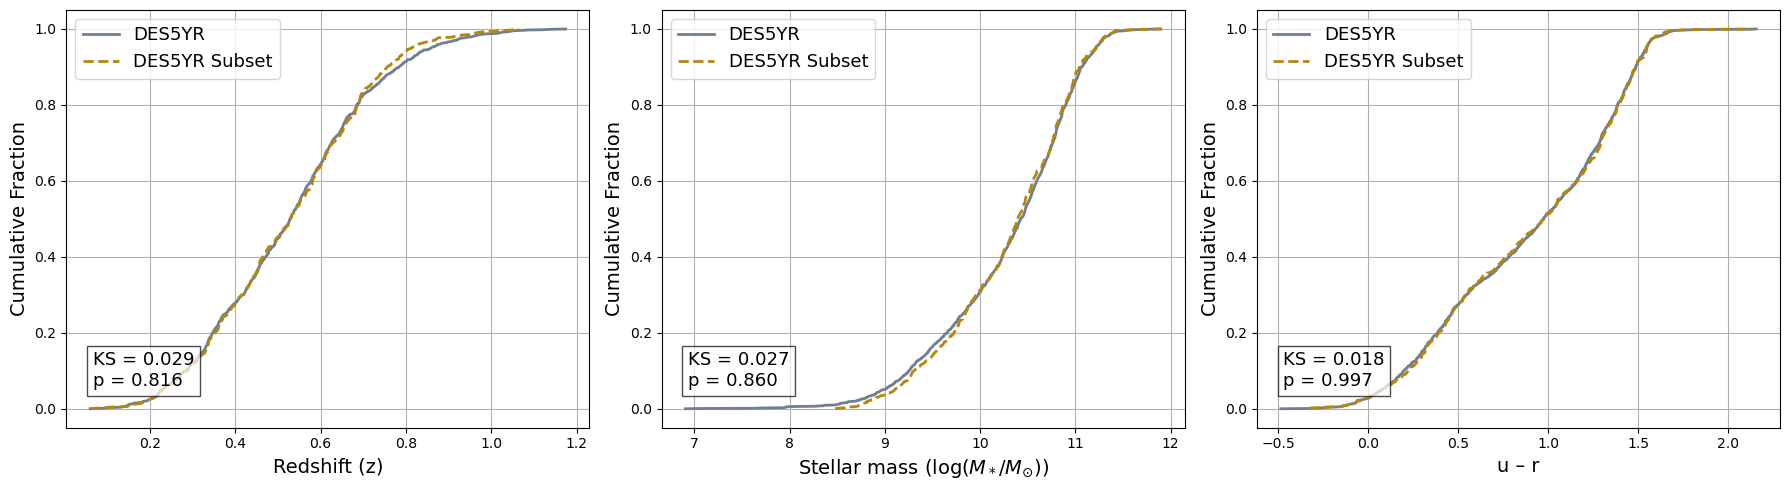

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.stats import ks_2samp
#Plotting colors (darker but soft tones)
color_full = 'slategrey'     # Medium blue
color_subset = 'darkgoldenrod'   # Medium orange
color_overlap = '#9e9ac8'  # Medium purple
# === CDF + KS Plots ===
z_full = np.sort(filtered['zHD'])
z_subset = np.sort(df_merged['zHD'])
z_cdf_full = np.linspace(0, 1, len(z_full))
z_cdf_subset = np.linspace(0, 1, len(z_subset))

mass_full = np.sort(filtered['HOST_LOGMASS'])
mass_subset = np.sort(df_merged['HOST_LOGMASS'])
mass_cdf_full = np.linspace(0, 1, len(mass_full))
mass_cdf_subset = np.linspace(0, 1, len(mass_subset))

color_full_data = np.sort(filtered['HOST_COLOR'])
color_subset_data = np.sort(df_merged['HOST_COLOR'])
color_cdf_full = np.linspace(0, 1, len(color_full_data))
color_cdf_subset = np.linspace(0, 1, len(color_subset_data))

ks_z = ks_2samp(filtered['zHD'], df_merged['zHD'])
ks_mass = ks_2samp(filtered['HOST_LOGMASS'], df_merged['HOST_LOGMASS'])
ks_color = ks_2samp(filtered['HOST_COLOR'], df_merged['HOST_COLOR'])

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

cdf_params = [
    (z_full, z_cdf_full, z_subset, z_cdf_subset, 'Redshift (z)', 'Redshift CDF', ks_z),
    (mass_full, mass_cdf_full, mass_subset, mass_cdf_subset, r'Stellar mass ($\log(M_*/M_{\odot})$)', 'Host Mass CDF', ks_mass),
    (color_full_data, color_cdf_full, color_subset_data, color_cdf_subset, 'u – r', 'u–r Color CDF', ks_color)
]

for i, (full, cdf_full, subset, cdf_subset, xlabel, title, ks) in enumerate(cdf_params):
    axes[i].plot(full, cdf_full, label='DES5YR', color=color_full, linewidth=2)
    axes[i].plot(subset, cdf_subset, label='DES5YR Subset', color=color_subset, linewidth=2, ls='--')
    axes[i].set_xlabel(xlabel, size=14)
    axes[i].set_ylabel('Cumulative Fraction', size=14)
    #axes[i].set_title(title)
    axes[i].legend(fontsize=13)
    axes[i].grid(True)
    axes[i].text(
        0.05, 0.1, f"KS = {ks.statistic:.3f}\np = {ks.pvalue:.3f}",
        transform=axes[i].transAxes,
        fontsize=13,  # <- set font size here
        bbox=dict(facecolor='white', alpha=0.7)
    )

plt.tight_layout()
plt.show()


### plot style 2

/tmp/ipykernel_834812/1371402887.py:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df1 = pd.read_csv(DES_data, delim_whitespace=True, comment='#', names=columns, skiprows=data_start)


       CID   CIDint  IDSURVEY  TYPE FIELD  CUTFLAG_SNANA  ERRFLAG_FIT  \
0  1562098  1562098        10     0    X2              3            0   
1  1702083  1702083        10     0    C2              3            0   
2  1309227  1309227        10     0    C3              3            0   
3  1311632  1311632        10     0    X1              3            0   
4  1314162  1314162        10     0    X3              3            0   

      zHEL  zHELERR     zCMB  ...  biasCorErr_mu  biasCor_mB  biasCor_x1  \
0  0.57747    0.001  0.57618  ...            0.0         0.0         0.0   
1  0.38932    0.001  0.38884  ...            0.0         0.0         0.0   
2  0.92649    0.001  0.92576  ...            0.0         0.0         0.0   
3  0.42538    0.001  0.42420  ...            0.0         0.0         0.0   
4  0.58267    0.001  0.58141  ...            0.0         0.0         0.0   

   biasCor_c  biasCor_muCOVSCALE  IDSAMPLE  IZBIN   LOG_OII  LOG_OII_ERR  \
0        0.0                

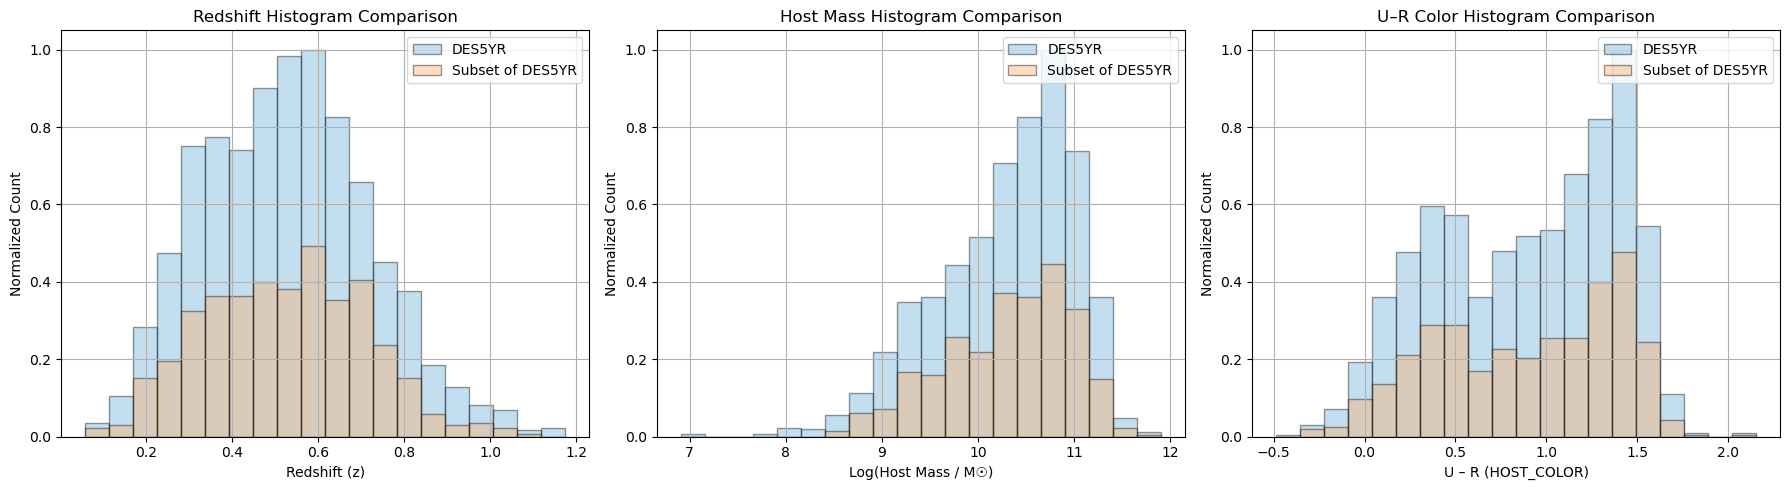

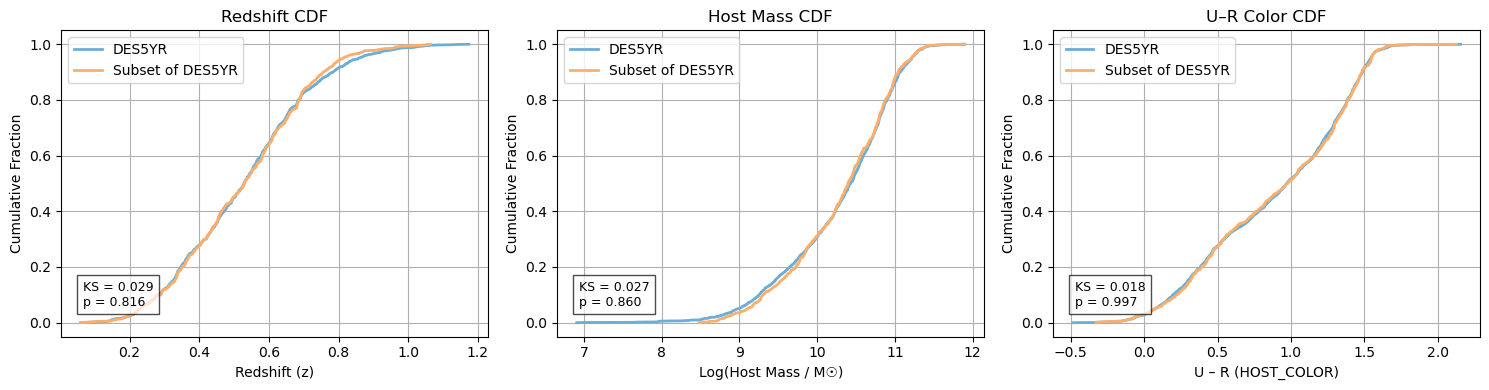

(array([  2.,   0.,   3.,   1.,   9.,  10.,  22.,  45.,  57.,  88., 153.,
        134., 211., 222., 252., 172.,  99.,  31.,  17.,   5.]),
 array([37.3382   , 37.7204505, 38.102701 , 38.4849515, 38.867202 ,
        39.2494525, 39.631703 , 40.0139535, 40.396204 , 40.7784545,
        41.160705 , 41.5429555, 41.925206 , 42.3074565, 42.689707 ,
        43.0719575, 43.454208 , 43.8364585, 44.218709 , 44.6009595,
        44.98321  ]),
 <BarContainer object of 20 artists>)

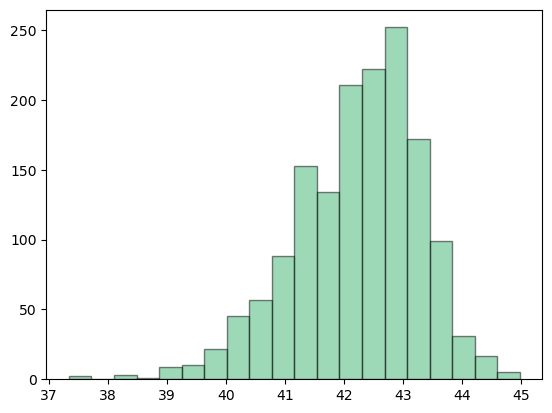

In [ ]:
## plot
# 
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.stats import ks_2samp

# Load FITRES file
DES_data = os.path.join(os.environ['DESCODE'], 'SIMS', 'DES-OzDES_data', 'BBC1D_fixgamma0.FITRES')

# Detect and read FITRES column headers
with open(DES_data, 'r') as f:
    lines = f.readlines()
for i, line in enumerate(lines):
    if line.startswith("VARNAMES:"):
        columns = line.strip().split()[1:]
        data_start = i + 1
        break

# Read FITRES into df1
df1 = pd.read_csv(DES_data, delim_whitespace=True, comment='#', names=columns, skiprows=data_start)

# Filter data
filtered = df1[df1['zHD'] <= 1.2]

# Load OII data
subDES = os.path.join(os.environ['DESCODE'], 'SIMS', 'DES-OzDES_data', 'ozdes_oII.csv')
df2 = pd.read_csv(subDES)

# Merge on CID
df_merged = pd.merge(filtered, df2[['CID', 'LOG_OII', 'LOG_OII_ERR', 'SPECZ']], on='CID', how='inner')

print(df_merged.head(5))
print(f"Total entries after filtering : {len(filtered)}")
print(f"Entries matched with OII data: {len(df_merged)}")

# Plotting colors (darker but soft tones)
color_full = '#6baed6'     # Medium blue
color_subset = '#fdae6b'   # Medium orange
color_overlap = '#9e9ac8'  # Medium purple

# === HISTOGRAMS ===
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

def get_bins(data1, data2, bins=20):
    combined = pd.concat([data1, data2])
    return np.histogram_bin_edges(combined, bins=bins)

params = [
    ('zHD', 'Redshift (z)', 'Redshift Histogram Comparison'),
    ('HOST_LOGMASS', 'Log(Host Mass / M☉)', 'Host Mass Histogram Comparison'),
    ('HOST_COLOR', 'U – R (HOST_COLOR)', 'U–R Color Histogram Comparison')
]

for i, (key, xlabel, title) in enumerate(params):
    bins = get_bins(filtered[key], df_merged[key])
    ax = axes[i]
    counts1, _ = np.histogram(filtered[key], bins=bins)
    counts2, _ = np.histogram(df_merged[key], bins=bins)
    overlap = np.minimum(counts1, counts2)

    ax.bar(bins[:-1], counts1 / counts1.max(), width=np.diff(bins),
           align='edge', alpha=0.4, label='DES5YR', color=color_full, edgecolor='black')
    ax.bar(bins[:-1], counts2 / counts1.max(), width=np.diff(bins),
           align='edge', alpha=0.4, label='Subset of DES5YR', color=color_subset, edgecolor='black')


    ax.set_xlabel(xlabel)
    ax.set_ylabel('Normalized Count')
    ax.set_title(title)
    ax.legend(loc='upper right')
    ax.grid(True)

plt.tight_layout()
plt.show()

# === CDF + KS Plots ===
z_full = np.sort(filtered['zHD'])
z_subset = np.sort(df_merged['zHD'])
z_cdf_full = np.linspace(0, 1, len(z_full))
z_cdf_subset = np.linspace(0, 1, len(z_subset))

mass_full = np.sort(filtered['HOST_LOGMASS'])
mass_subset = np.sort(df_merged['HOST_LOGMASS'])
mass_cdf_full = np.linspace(0, 1, len(mass_full))
mass_cdf_subset = np.linspace(0, 1, len(mass_subset))

color_full_data = np.sort(filtered['HOST_COLOR'])
color_subset_data = np.sort(df_merged['HOST_COLOR'])
color_cdf_full = np.linspace(0, 1, len(color_full_data))
color_cdf_subset = np.linspace(0, 1, len(color_subset_data))

ks_z = ks_2samp(filtered['zHD'], df_merged['zHD'])
ks_mass = ks_2samp(filtered['HOST_LOGMASS'], df_merged['HOST_LOGMASS'])
ks_color = ks_2samp(filtered['HOST_COLOR'], df_merged['HOST_COLOR'])

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

cdf_params = [
    (z_full, z_cdf_full, z_subset, z_cdf_subset, 'Redshift (z)', 'Redshift CDF', ks_z),
    (mass_full, mass_cdf_full, mass_subset, mass_cdf_subset, 'Log(Host Mass / M☉)', 'Host Mass CDF', ks_mass),
    (color_full_data, color_cdf_full, color_subset_data, color_cdf_subset, 'U – R (HOST_COLOR)', 'U–R Color CDF', ks_color)
]

for i, (full, cdf_full, subset, cdf_subset, xlabel, title, ks) in enumerate(cdf_params):
    axes[i].plot(full, cdf_full, label='DES5YR', color=color_full, linewidth=2)
    axes[i].plot(subset, cdf_subset, label='Subset of DES5YR', color=color_subset, linewidth=2)
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel('Cumulative Fraction')
    axes[i].set_title(title)
    axes[i].legend()
    axes[i].grid(True)
    axes[i].text(0.05, 0.1, f"KS = {ks.statistic:.3f}\np = {ks.pvalue:.3f}",
                 transform=axes[i].transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

plt.hist(filtered['MU'], bins=20, alpha=0.5, label='DES5YR', color='mediumseagreen', edgecolor='black')


# .h5 FILE FROM SIMULATION

/priv/debass/DES/SIMS/sims/SNe/for_BBC/test_modified_oII


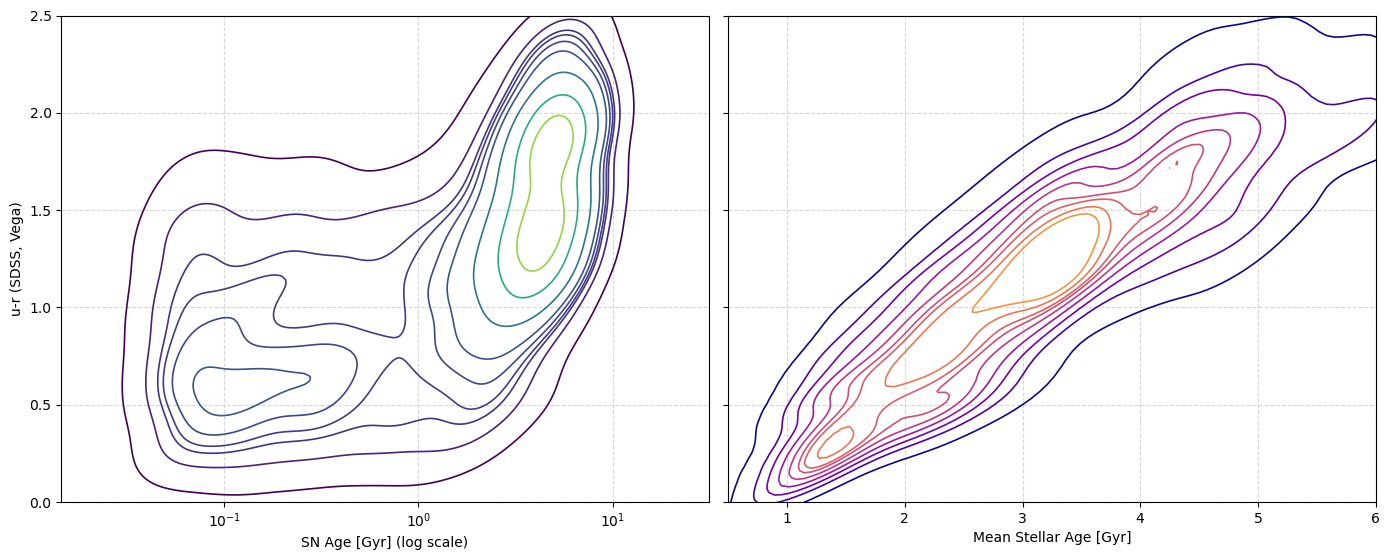

(array([  19.,    0.,   68.,    0.,  142.,    0.,  217.,    0.,  354.,
           0.,  473.,    0.,  616.,    0.,  711.,    0.,  834.,    0.,
        1067.,    0., 1182.,    0., 1179., 1202.,    0.,    0., 1082.,
        1126.,    0.,    0.,  811.,    0.,  564.,  294.,    0.,    0.,
         152.,    0.,   52.,   16.]),
 array([0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  , 0.225, 0.25 ,
        0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425, 0.45 , 0.475,
        0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 , 0.675, 0.7  ,
        0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875, 0.9  , 0.925,
        0.95 , 0.975, 1.   , 1.025, 1.05 ]),
 <BarContainer object of 40 artists>)

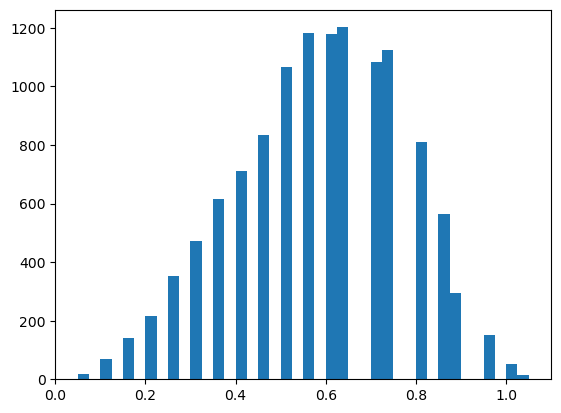

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

import pandas as pd
import os
# Define the file path

DESSIMS = os.environ['DESSIMS'] 
SN_path= os.path.join(DESSIMS, 'sims', 'SNe', 'for_BBC') # Make sure SN_sim is set in your environment
model_path = os.path.join(SN_path, 'test_modified_oII')
print(model_path)

# Collect files
h5_files = glob.glob(os.path.join(model_path, "*.h5"))

# Initialize lists
z_list, mass_list, u_list, n_list, c_list = [], [], [], [], []
mr_lis, x1_list, mean_age_list, sn_age_list = [], [], [], []

# Load data
for file in h5_files:
    try:
        df = pd.read_hdf(file, key="/sim")
        z_list.extend(df["z"].values)
        mass_list.extend(df["mass"].values)
        u_list.extend(df["U-R"].values)
        n_list.extend(df["n"].values)
        c_list.extend(df["c"].values)
        mr_lis.extend(df["m_r"].values)
        x1_list.extend(df["x1"].values)
        mean_age_list.extend(df["mean_ages"].values)
        sn_age_list.extend(df["SN_age"].values)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Convert to arrays
sn_age_array = np.array(sn_age_list)
z_array = np.array(z_list)
mass_array = np.array(mass_list)
ur_array = np.array(u_list)
n_array_raw = np.array(n_list)
c_array = np.array(c_list)
mr_array = np.array(mr_lis)
x1_array = np.array(x1_list)
mean_age_array = np.array(mean_age_list)
logmass_array = np.log10(mass_array)

# Scale weights
scaling_factor = 1600 / np.sum(n_array_raw)
n_array = n_array_raw * scaling_factor

# Plotting
import matplotlib.ticker as ticker

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
#fig.suptitle("u-r rest frame vs age distributions", fontsize=16, weight='bold')

# --- 1. U-R vs log(SN Age) ---
mask_log = sn_age_array > 0
log_sn_age = np.log10(sn_age_array[mask_log])

sns.kdeplot(
    x=log_sn_age,
    y=ur_array[mask_log],
    weights=n_array[mask_log],
    fill=False,
    cmap="viridis",
    ax=axs[0],
    levels=10,
    linewidths=1.2
)

axs[0].set_xticks([-1, 0, 1])
axs[0].set_xticklabels([r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$'])
axs[0].set_xlabel("SN Age [Gyr] (log scale)")
axs[0].set_ylabel("u-r (SDSS, Vega)")
axs[0].set_ylim(0,2.5)
#axs[0].set_title("U - R vs log(SN Age)")
axs[0].grid(True, linestyle='--', alpha=0.5)

# --- 2. U-R vs Mean Stellar Age ---
sns.kdeplot(
    x=mean_age_array/1000,
    y=ur_array,
    weights=n_array,
    fill=False,
    cmap="plasma",
    ax=axs[1],
    levels=10,
    linewidths=1.2
)

axs[1].set_xlabel("Mean Stellar Age [Gyr]")
axs[1].set_ylabel("u -r (SDSS, Vega)")
#axs[1].set_title("U - R vs Mean Stellar Age")
axs[1].set_xlim(0.5, 6)
axs[1].set_ylim(0,2.5)
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

plt.hist(z_array, bins=40)

In [2]:
print(h5_files.columns)

AttributeError: 'list' object has no attribute 'columns'

In [3]:
import pandas as pd
#file_path= '/priv/debass/DES/SIMS/sims/SNe/for_BBC/phil_model/DES_BS20_age_Rv_step_3Gyr_age_x1_beta_1.14_quenched_bursty_test_SN_sim.h5' 
file_path= '/priv/debass/DES/SIMS/sims/SNe/for_BBC/test_modified_oII/baseline_model_test_SN_sim_2.50_2.50_0.00.h5'
#file_path= '/priv/debass/DES/SIMS/sims/SNe/for_BBC/phil_model/DES_BS20_age_Rv_step_3Gyr_age_x1_beta_1.14_quenched_bursty_test_SN_sim.h5'

df = pd.read_hdf(file_path, key="/sim")
print(df.columns)


Index(['n', 'distmod', 'mass', 'EW_OII', 'ssfr', 'sfr', 'mean_ages', 'SN_age',
       'rv', 'E', 'host_Av', 'U-R', 'm_g', 'm_r', 'm_i', 'm_z', 'eff_mask',
       'c', 'c_int', 'x1', 'mB', 'alpha_SN', 'beta_SN', 'mB_err', 'c_err',
       'c_noise', 'x1_err', 'x1_noise', 'x1_int', 'cov_mB_x1', 'cov_mB_c',
       'cov_x1_c', 'z'],
      dtype='object')


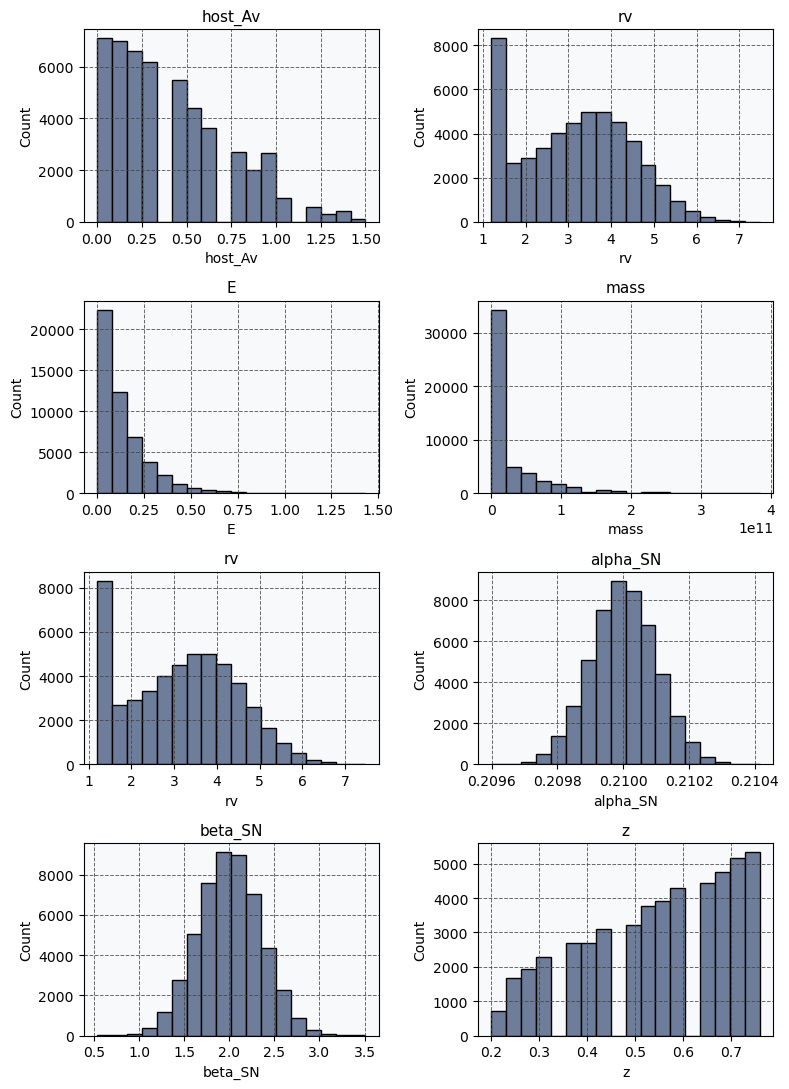

(array([ 487.,  808., 1085., 1192., 1381., 1359., 1744., 1758., 2146.,
        1722., 2242., 3202., 3835., 4569., 4369., 4042., 6053., 5136.,
        2328.,  534.]),
 array([ 6.06550028,  6.34146659,  6.61743291,  6.89339922,  7.16936554,
         7.44533185,  7.72129817,  7.99726448,  8.27323079,  8.54919711,
         8.82516342,  9.10112974,  9.37709605,  9.65306237,  9.92902868,
        10.20499499, 10.48096131, 10.75692762, 11.03289394, 11.30886025,
        11.58482657]),
 <BarContainer object of 20 artists>)

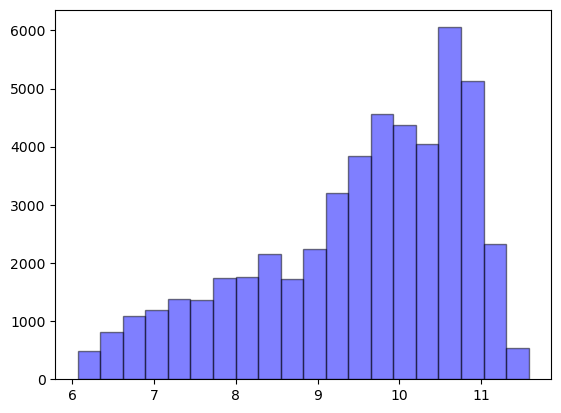

In [8]:
import matplotlib.pyplot as plt
import numpy as np

columns_to_plot = ['host_Av', 'rv', 'E', 'mass', 'rv', 'alpha_SN', 'beta_SN', 'z']

plt.figure(figsize=(8, 11))
cividis_color = "#6E7D9A" # A brighter cividis-inspired color

for i, col in enumerate(columns_to_plot, 1):
    if col in df.columns:
        plt.subplot(4, 2, i)
        df[col].dropna().hist(
            bins=18,
            color=cividis_color,
            edgecolor='black'
        )
        if col == 'U-R':
            plt.xlabel('u-r (SDSS, Vega)', fontsize=10)
            plt.title('u-r (SDSS, Vega)', fontsize=11)
        else:
            plt.xlabel(col, fontsize=10)
            plt.title(col, fontsize=11)
        plt.ylabel('Count', fontsize=10)
        plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.8, color='#444444')
        plt.gca().set_facecolor('#f8f9fa')  # light background for subplot
    else:
        print(f"Column '{col}' not found.")

plt.tight_layout()
plt.show()

plt.hist(np.log10(df['mass']), bins=20, alpha=0.5, color='blue', edgecolor='black')


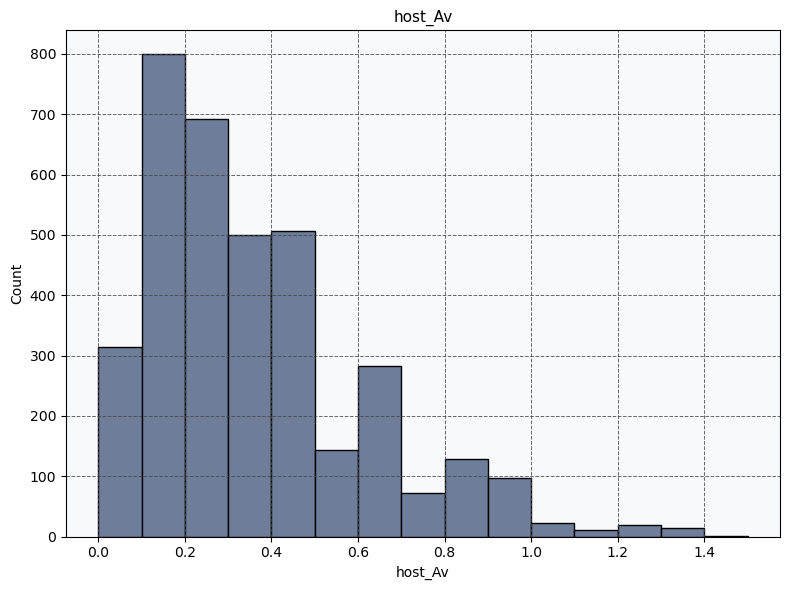

In [30]:
import matplotlib.pyplot as plt

columns_to_plot = ['host_Av']

plt.figure(figsize=(8, 6))
cividis_color = "#6E7D9A" # A brighter cividis-inspired color

for i, col in enumerate(columns_to_plot, 1):
    if col in df.columns:
        plt.subplot(1, 1, i)
        df[col].dropna().hist(
            bins=15,
            color=cividis_color,
            edgecolor='black'
        )
        if col == 'U-R':
            plt.xlabel('u-r (SDSS, Vega)', fontsize=10)
            plt.title('u-r (SDSS, Vega)', fontsize=11)
        else:
            plt.xlabel(col, fontsize=10)
            plt.title(col, fontsize=11)
        plt.ylabel('Count', fontsize=10)
        plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.8, color='#444444')
        plt.gca().set_facecolor('#f8f9fa')  # light background for subplot
    else:
        print(f"Column '{col}' not found.")

plt.tight_layout()
plt.show()


# FITRES FILE FROM SIMULATION

In [5]:
import pandas as pd

#file_path = '/priv/debass/DES/SIMS/sims/FITOPT000_MUOPT000.FITRES' #output from age_step_Rv_lo_hicut_tested
#file_path= '/priv/debass/DES/SIMS/sims/SNe/for_BBC/baseline_model_tested/FITOPT000.FITRES' # input, use makehostlib mpi, sfh 25 50
#file_path= '/priv/debass/DES/SIMS/sims/SNe/for_BBC/age_step_Rv_lo_hicut_tested/FITOPT000.FITRES' # input, use makehostlibnonmpi, sfh 250 500
#file_path= '/priv/debass/DES/SIMS/sims/SNe/for_BBC/baseline_model_tested_hostlibfix/FITOPT000.FITRES' # input,  use makehostlibnonmpi, sfh 250 500
file_path= '/priv/debass/DES/SIMS/sims/SNe/for_BBC/baseline_model_tested_sfh_50_100_1Av/FITOPT000.FITRES' # input,  use makehostlibnonmpi, sfh 250 500

# Step 1: Find the VARNAMES line
with open(file_path, 'r') as f:
    lines = f.readlines()

column_names = None
for line in lines:
    if line.startswith('VARNAMES:'):
        column_names = line.replace('VARNAMES:', '').strip().split()
        break

if column_names is None:
    raise ValueError("VARNAMES line not found in FITRES file")

# Step 2: Make column names unique
from collections import Counter

counts = Counter()
unique_column_names = []
for name in column_names:
    if counts[name]:
        unique_column_names.append(f"{name}_{counts[name]}")
    else:
        unique_column_names.append(name)
    counts[name] += 1

# Step 3: Find the line number where the SN data starts
data_start_index = None
for i, line in enumerate(lines):
    if line.startswith('SN:'):
        data_start_index = i
        break

if data_start_index is None:
    raise ValueError("Data (SN:) section not found in FITRES file")

# Step 4: Read the data
df = pd.read_csv(
    file_path,
    delim_whitespace=True,
    skiprows=data_start_index,
    names=unique_column_names,
    comment='#'
)

# Preview
print("Columns:", df.columns.tolist())
print(df)


Columns: ['CID', 'IDSURVEY', 'TYPE', 'mB', 'mBERR', 'cERR', 'x1ERR', 'zHD', 'TYPE_1', 'zHDERR', 'zCMB', 'zCMBERR', 'zHEL', 'zHELERR', 'x0', 'x0ERR', 'COV_x1_x0', 'COV_c_x0', 'COV_x1_c', 'VPEC', 'VPECERR', 'PKMJD', 'PKMJDERR', 'FITPROB', 'PROB_SNNTRAINV19_z_TRAINDES_V19', 'HOST_LOGMASS', 'HOST_LOG_SFR', 'HOST_LOG_sSFR', 'distmod', 'mass', 'ssfr', 'sfr', 'mean_ages', 'SN_age', 'rv', 'E', 'host_Av', 'U-R', 'c', 'c_noise', 'c_int', 'x1', 'x1_int', 'x1_noise']
      CID  IDSURVEY  TYPE         mB     mBERR      cERR     x1ERR   zHD  \
SN:    14        10   101  20.400135  0.027660  0.030929  0.238133  0.15   
SN:    15        10   101  19.881372  0.025843  0.024295  0.212417  0.15   
SN:    16        10   101  20.880748  0.025000  0.020000  0.232394  0.15   
SN:    17        10   101  19.968894  0.027551  0.023827  0.135945  0.15   
SN:    18        10   101  19.528583  0.026681  0.020422  0.188908  0.15   
..    ...       ...   ...        ...       ...       ...       ...   ...   
SN:  430

/tmp/ipykernel_3726098/3427604695.py:45: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


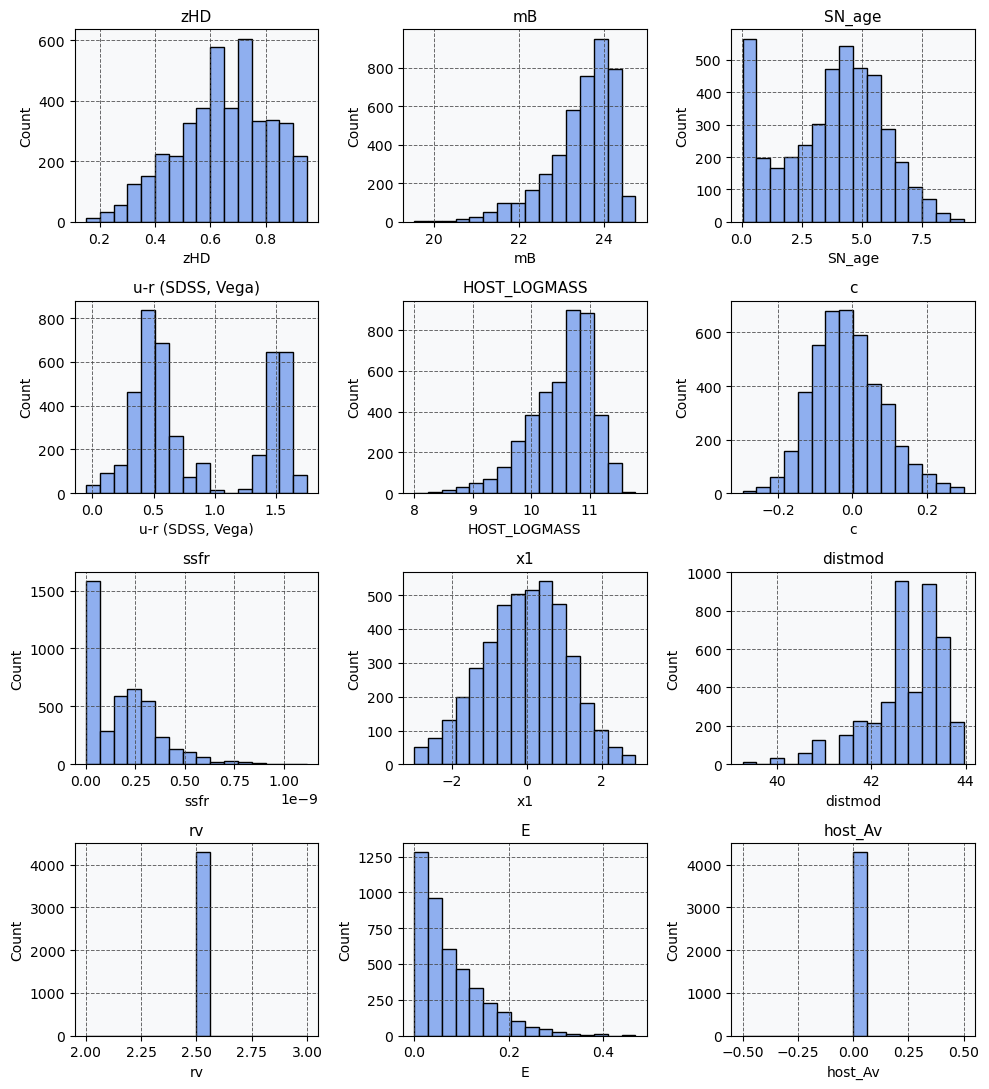

In [6]:
import matplotlib.pyplot as plt

columns_to_plot = ['zHD', 'mB', 'SN_age', 'U-R', 'HOST_LOGMASS', 'c', 'ssfr', 'x1', 'distmod', 'rv', 'E', 'host_Av']

plt.figure(figsize=(10, 11))
cividis_color = '#8fafef'  # A brighter cividis-inspired color

for i, col in enumerate(columns_to_plot, 1):
    if col in df.columns:
        plt.subplot(4, 3, i)
        df[col].dropna().hist(
            bins=16,
            color=cividis_color,
            edgecolor='black'
        )
        if col == 'U-R':
            plt.xlabel('u-r (SDSS, Vega)', fontsize=10)
            plt.title('u-r (SDSS, Vega)', fontsize=11)
        else:
            plt.xlabel(col, fontsize=10)
            plt.title(col, fontsize=11)
        plt.ylabel('Count', fontsize=10)
        plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.8, color='#444444')
        plt.gca().set_facecolor('#f8f9fa')  # light background for subplot
    else:
        print(f"Column '{col}' not found.")

plt.tight_layout()
plt.show()


## Compare DES and OzDES data and simulation

In [4]:
import pandas as pd
# replace with your actual path

# Step 1: Find the VARNAMES line
with open(file_path, 'r') as f:
    lines = f.readlines()

column_names = None
for line in lines:
    if line.startswith('VARNAMES:'):
        column_names = line.replace('VARNAMES:', '').strip().split()
        break

if column_names is None:
    raise ValueError("VARNAMES line not found in FITRES file")

# Step 2: Make column names unique
from collections import Counter

counts = Counter()
unique_column_names = []
for name in column_names:
    if counts[name]:
        unique_column_names.append(f"{name}_{counts[name]}")
    else:
        unique_column_names.append(name)
    counts[name] += 1

# Step 3: Find the line number where the SN data starts
data_start_index = None
for i, line in enumerate(lines):
    if line.startswith('SN:'):
        data_start_index = i
        break

if data_start_index is None:
    raise ValueError("Data (SN:) section not found in FITRES file")

# Step 4: Read the data
df = pd.read_csv(
    file_path,
    delim_whitespace=True,
    skiprows=data_start_index,
    names=unique_column_names,
    comment='#'
)

# Preview
print("Columns:", df.columns.tolist())
print(df.head())


Columns: ['CID', 'IDSURVEY', 'TYPE', 'mB', 'mBERR', 'cERR', 'x1ERR', 'zHD', 'TYPE_1', 'zHDERR', 'zCMB', 'zCMBERR', 'zHEL', 'zHELERR', 'x0', 'x0ERR', 'COV_x1_x0', 'COV_c_x0', 'COV_x1_c', 'VPEC', 'VPECERR', 'PKMJD', 'PKMJDERR', 'FITPROB', 'PROB_SNNTRAINV19_z_TRAINDES_V19', 'HOST_LOGMASS', 'HOST_LOG_SFR', 'HOST_LOG_sSFR', 'distmod', 'mass', 'ssfr', 'sfr', 'mean_ages', 'SN_age', 'rv', 'E', 'host_Av', 'U-R', 'c', 'c_noise', 'c_int', 'x1', 'x1_int', 'x1_noise']
     CID  IDSURVEY  TYPE         mB     mBERR      cERR     x1ERR   zHD  \
SN:   12        10   101  19.809238  0.028246  0.026752  0.184058  0.15   
SN:   13        10   101  20.638772  0.026388  0.024374  0.211616  0.15   
SN:   14        10   101  19.670149  0.029565  0.027542  0.287821  0.15   
SN:   15        10   101  19.669905  0.027492  0.025187  0.123893  0.15   
SN:   16        10   101  20.476021  0.029667  0.024495  0.236555  0.15   

     TYPE_1  zHDERR  ...   rv         E   host_Av       U-R         c  \
SN:     101  0.0

/tmp/ipykernel_3524141/1740284176.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


In [5]:
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import numpy as np

# Extract data arrays
z_des = filtered['zHD']
z_sub = df_merged['zHD']
z_sim = z_array

mass_des = filtered['HOST_LOGMASS']
mass_sub = df_merged['HOST_LOGMASS']
mass_sim = np.log10(mass_array)

color_des = filtered['HOST_COLOR']
color_sub = df_merged['HOST_COLOR']
color_sim = ur_array

def plot_cdf_comparison(ax, data1, data2, data3, label1, label2, label3, title, xlabel):
    # Sort data for CDFs
    d1 = np.sort(data1)
    d2 = np.sort(data2)
    d3 = np.sort(data3)

    # Normalized CDFs
    cdf1 = np.arange(1, len(d1)+1) / len(d1)
    cdf2 = np.arange(1, len(d2)+1) / len(d2)
    cdf3 = np.arange(1, len(d3)+1) / len(d3)

    # Plot
    ax.plot(d1, cdf1, label=label1, color='mediumseagreen')
    ax.plot(d2, cdf2, label=label2, color='orange')
    ax.plot(d3, cdf3, label=label3, color='darkred')

    # KS stats
    ks_12 = ks_2samp(data1, data2)
    ks_13 = ks_2samp(data1, data3)

    # Annotate
    ax.text(0.05, 0.8, f'KS(DES, subset): {ks_12.statistic:.2f}\np = {ks_12.pvalue:.2g}', transform=ax.transAxes, fontsize=9, color='black')
    ax.text(0.05, 0.6, f'KS(DES, sim): {ks_13.statistic:.2f}\np = {ks_13.pvalue:.2g}', transform=ax.transAxes, fontsize=9, color='black')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Cumulative Fraction')
    ax.legend()

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

plot_cdf_comparison(axs[0], z_des, z_sub, z_sim,
                    'DES5YR', 'Subset', 'Simulation',
                    'CDF: Redshift', 'zHD')

plot_cdf_comparison(axs[1], mass_des, mass_sub, mass_sim,
                    'DES5YR', 'Subset', 'Simulation',
                    'CDF: Host Log Mass', 'Log(Mass / M☉)')

plot_cdf_comparison(axs[2], color_des, color_sub, color_sim,
                    'DES5YR', 'Subset', 'Simulation',
                    'CDF: U–R Color', 'U–R (HOST_COLOR)')

plt.tight_layout()
plt.show()


NameError: name 'filtered' is not defined

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ---- Data preparation ----
z_des = filtered['zHD']
z_sub = df_merged['zHD']
z_sim = df['zHD']

plt.figure(figsize=(10, 6))

# Use common bins for fair comparison
all_data = pd.concat([z_des, z_sub, z_sim])
bins = np.linspace(all_data.min(), all_data.max(), 23)

plt.hist(z_des, bins=bins, color='#7bb7f6', alpha=1, label='z_des', 
          histtype='step', linewidth=2)
plt.hist(z_sub, bins=bins, color='#905896', alpha=1, label='z_sub', 
          histtype='step', linewidth=2)
plt.hist(z_sim, bins=bins, color='#BDBC54', alpha=1, label='z_sim', 
          histtype='step', linewidth=2)

plt.xlabel('Redshift', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.title('Comparison of redshift distributions', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


NameError: name 'filtered' is not defined

ValueError: weights should have the same shape as x

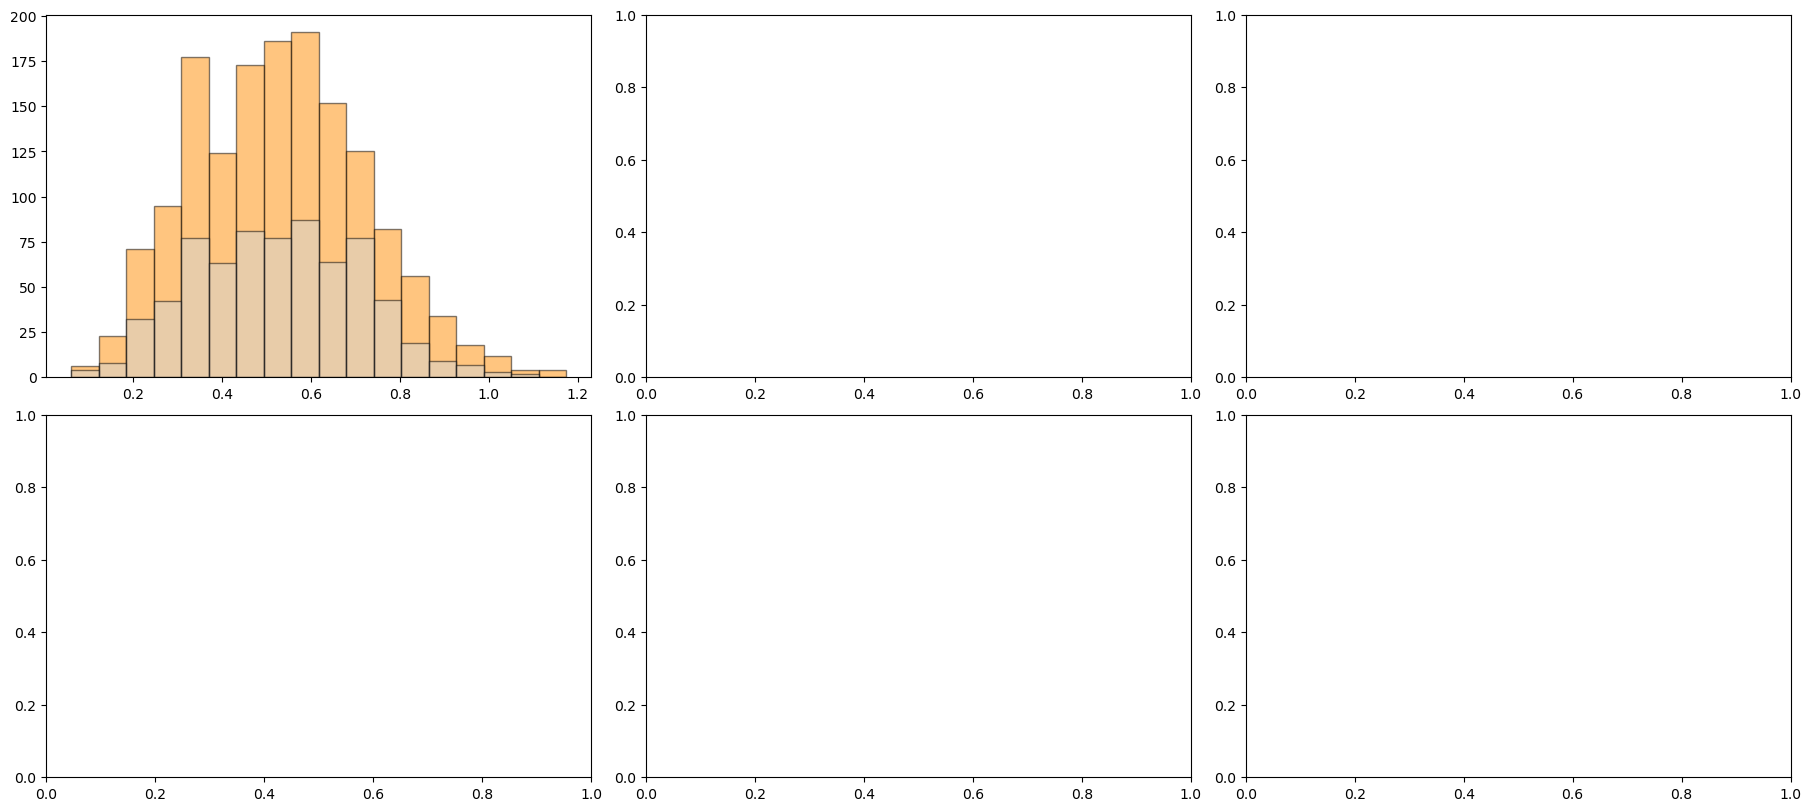

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# ---- Data preparation ----
z_des = filtered['zHD']
z_sub = df_merged['zHD']
z_sim = df['zHD']

mass_des = filtered['HOST_LOGMASS']
mass_sub = df_merged['HOST_LOGMASS']
mass_sim = np.log10(mass_array)

color_des = filtered['HOST_COLOR']
color_sub = df_merged['HOST_COLOR']
color_sim = ur_array

# Bin edges
bins_z = np.histogram_bin_edges(np.concatenate([z_des, z_sub, z_sim]), bins=18)
bins_mass = np.histogram_bin_edges(np.concatenate([mass_des, mass_sub, mass_sim]), bins=18)
bins_color = np.histogram_bin_edges(np.concatenate([color_des, color_sub, color_sim]), bins=18)

# ---- Create combined figure ----
fig, axs = plt.subplots(2, 3, figsize=(18, 8), constrained_layout=True)

# ---- Top row: Histograms ----
axs[0, 0].hist(z_des, bins=bins_z, alpha=0.5, label='DES5YR', color='darkorange', edgecolor='black')
axs[0, 0].hist(z_sub, bins=bins_z, alpha=0.5, label='Subset of DES5YR', color='lightgray', edgecolor='black')
axs[0, 0].hist(z_sim, bins=bins_z, weights=n_array, histtype='step', linewidth=2, color='darkred', label='Simulation')
axs[0, 0].set_title('Redshift Histogram')
axs[0, 0].set_xlabel('Redshift (z)')
axs[0, 0].set_ylabel('Count')
axs[0, 0].legend()

axs[0, 1].hist(mass_des, bins=bins_mass, alpha=0.5, label='DES5YR', color='darkorange', edgecolor='black')
axs[0, 1].hist(mass_sub, bins=bins_mass, alpha=0.5, label='Subset of DES5YR', color='lightgray', edgecolor='black')
axs[0, 1].hist(mass_sim, bins=bins_mass, weights=n_array, histtype='step', linewidth=2, color='darkred', label='Simulation')
axs[0, 1].set_title('Host Mass Histogram')
axs[0, 1].set_xlabel('Log(Host Mass / M☉)')
axs[0, 1].set_ylabel('Count')
axs[0, 1].legend()

axs[0, 2].hist(color_des, bins=bins_color, alpha=0.5, label='DES5YR', color='darkorange', edgecolor='black')
axs[0, 2].hist(color_sub, bins=bins_color, alpha=0.5, label='Subset of DES5YR', color='lightgray', edgecolor='black')
axs[0, 2].hist(color_sim, bins=bins_color, weights=n_array, histtype='step', linewidth=2, color='darkred', label='Simulation')
axs[0, 2].set_title('U–R Color Histogram')
axs[0, 2].set_xlabel('U – R (HOST_COLOR)')
axs[0, 2].set_ylabel('Count')
axs[0, 2].legend()

# ---- Bottom row: CDFs ----
def plot_cdf(ax, d1, d2, d3, label1, label2, label3, title, xlabel):
    # Sorted data
    s1 = np.sort(d1)
    s2 = np.sort(d2)
    s3 = np.sort(d3)

    cdf1 = np.arange(1, len(s1)+1) / len(s1)
    cdf2 = np.arange(1, len(s2)+1) / len(s2)
    cdf3 = np.arange(1, len(s3)+1) / len(s3)

    ax.plot(s1, cdf1, label=label1, color='mediumseagreen')
    ax.plot(s2, cdf2, label=label2, color='orange')
    ax.plot(s3, cdf3, label=label3, color='darkred')

    ks_12 = ks_2samp(d1, d2)
    ks_13 = ks_2samp(d1, d3)

    ax.text(0.05, 0.8, f'KS(DES, subset): {ks_12.statistic:.2f}\np = {ks_12.pvalue:.2g}', transform=ax.transAxes, fontsize=9)
    ax.text(0.05, 0.6, f'KS(DES, sim): {ks_13.statistic:.2f}\np = {ks_13.pvalue:.2g}', transform=ax.transAxes, fontsize=9)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Cumulative Fraction')
    ax.legend()

plot_cdf(axs[1, 0], z_des, z_sub, z_sim, 'DES5YR', 'Subset', 'Simulation', 'CDF: Redshift', 'zHD')
plot_cdf(axs[1, 1], mass_des, mass_sub, mass_sim, 'DES5YR', 'Subset', 'Simulation', 'CDF: Host Log Mass', 'Log(Mass / M☉)')
plot_cdf(axs[1, 2], color_des, color_sub, color_sim, 'DES5YR', 'Subset', 'Simulation', 'CDF: U–R Color', 'U–R (HOST_COLOR)')

# ---- Final layout ----
plt.suptitle("Comparison of Observed and Simulated Host Galaxy Properties", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


/tmp/ipykernel_797794/3399644031.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(
/tmp/ipykernel_797794/3399644031.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


SN:   -0.736107
SN:   -0.472067
SN:    0.089253
SN:    0.268573
SN:   -0.001777
         ...   
SN:    0.683348
SN:    0.370848
SN:    0.389888
SN:    0.239758
SN:    0.442158
Length: 3584, dtype: float64


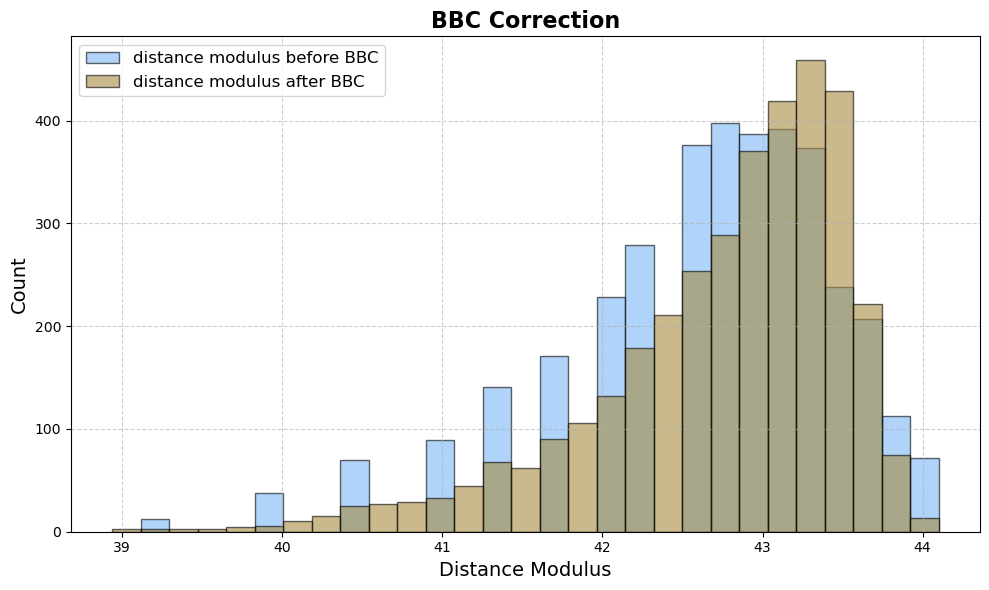

Index(['CID', 'IDSURVEY', 'TYPE', 'mB', 'mBERR', 'cERR', 'x1ERR', 'zHD',
       'TYPE_1', 'zHDERR', 'zCMB', 'zCMBERR', 'zHEL', 'zHELERR', 'x0', 'x0ERR',
       'COV_x1_x0', 'COV_c_x0', 'COV_x1_c', 'VPEC', 'VPECERR', 'PKMJD',
       'PKMJDERR', 'FITPROB', 'PROB_SNNTRAINV19_z_TRAINDES_V19',
       'HOST_LOGMASS', 'HOST_LOG_SFR', 'HOST_LOG_sSFR', 'distmod', 'mass',
       'ssfr', 'sfr', 'mean_ages', 'SN_age', 'rv', 'E', 'host_Av', 'U-R', 'c',
       'c_noise', 'c_int', 'x1', 'x1_int', 'x1_noise'],
      dtype='object')


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def load_fitres(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    # Find VARNAMES line
    column_names = None
    for line in lines:
        if line.startswith('VARNAMES:'):
            column_names = line.replace('VARNAMES:', '').strip().split()
            break
    if column_names is None:
        raise ValueError(f"VARNAMES line not found in {file_path}")

    # Make column names unique
    counts = Counter()
    unique_column_names = []
    for name in column_names:
        if counts[name]:
            unique_column_names.append(f"{name}_{counts[name]}")
        else:
            unique_column_names.append(name)
        counts[name] += 1

    # Find data start index
    data_start_index = None
    for i, line in enumerate(lines):
        if line.startswith('SN:'):
            data_start_index = i
            break
    if data_start_index is None:
        raise ValueError(f"Data (SN:) section not found in {file_path}")

    df = pd.read_csv(
        file_path,
        delim_whitespace=True,
        skiprows=data_start_index,
        names=unique_column_names,
        comment='#'
    )
    return df

# File paths
input_file = '/priv/debass/DES/SIMS/sims/SNe/for_BBC/baseline_model_tested_sfh_50_100/FITOPT000.FITRES'
output_file = '/priv/debass/DES/SIMS/sims/SNe/from_BBC/baseline_model_tested_sfh_50_100/FITOPT000_MUOPT000.FITRES'

# Load data
df_input = load_fitres(input_file)
df_output = load_fitres(output_file)

# Extract columns
distmod = df_input['distmod'].dropna()
mass= df_output['HOST_LOGMASS'].dropna()
MU = df_output['MU'].dropna()
redshift= df_input['zHD'].dropna()
residual= distmod - MU
MURES=  df_output['MURES']
M0DIF= df_output['M0DIF']
MUMODEL= df_output['MUMODEL']
MU_ADD= MUMODEL + MURES
print(residual)
# Use common bin edges for comparison
all_data = np.concatenate([distmod, MU])
bins = np.linspace(all_data.min(), all_data.max(), 30)

plt.figure(figsize=(10, 6))
plt.hist(distmod, bins=bins, alpha=0.6, label='distance modulus before BBC', color='#7bb7f6', edgecolor='black')
plt.hist(MU, bins=bins, alpha=0.6, label='distance modulus after BBC', color="#A68B41", edgecolor='black')
plt.xlabel('Distance Modulus', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('BBC Correction', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print(df_input.columns)

In [ ]:
import pandas as pd

output_file = '/priv/debass/DES/SIMS/sims/SNe/from_BBC/baseline_model_tested_sfh_50_100/FITOPT000_MUOPT000.M0DIF'

try:
    # Read file, skipping comment lines (starting with #)
    with open(output_file, 'r') as f:
        lines = [line.strip() for line in f if not line.startswith('#') and line.strip()]
    
    if not lines:
        print("No data found in file.")
    else:
        # First non-comment line is header
        header = lines[0].split()
        # Remaining lines are data
        data = [line.split() for line in lines[1:]]
        df = pd.DataFrame(data, columns=header)
        # Now you can plot, for example:
        # df.plot(x='your_x_column', y='your_y_column')
        print(df)  # Show first 5 rows
except FileNotFoundError:
    print(f"Error: The file {output_file} does not exist.")
except Exception as e:
    print(f"An error occurred while reading the file: {e}")



   VARNAMES: ROW   zHDMIN   zHDMAX      zHD     MUDIF   MUDIFERR     MUREF  \
0       ROW:   1  0.01000  0.06950  0.03975   0.00000  999.00000  36.22141   
1       ROW:   2  0.06950  0.12900  0.09925   0.00000  999.00000  38.30004   
2       ROW:   3  0.12900  0.18850  0.15875   0.06363    0.00792  39.40372   
3       ROW:   4  0.18850  0.24800  0.21825   0.23690    0.00453  40.17164   
4       ROW:   5  0.24800  0.30750  0.27775   0.15861    0.00247  40.76554   
5       ROW:   6  0.30750  0.36700  0.33725   0.12557    0.00292  41.25179   
6       ROW:   7  0.36700  0.42650  0.39675   0.08452    0.00286  41.66432   
7       ROW:   8  0.42650  0.48600  0.45625   0.10978    0.00281  42.02291   
8       ROW:   9  0.48600  0.54550  0.51575   0.05494    0.00274  42.34018   
9       ROW:  10  0.54550  0.60500  0.57525   0.05042    0.00195  42.62468   
10      ROW:  11  0.60500  0.66450  0.63475   0.01575    0.00321  42.88252   
11      ROW:  12  0.66450  0.72400  0.69425  -0.02289    0.00342

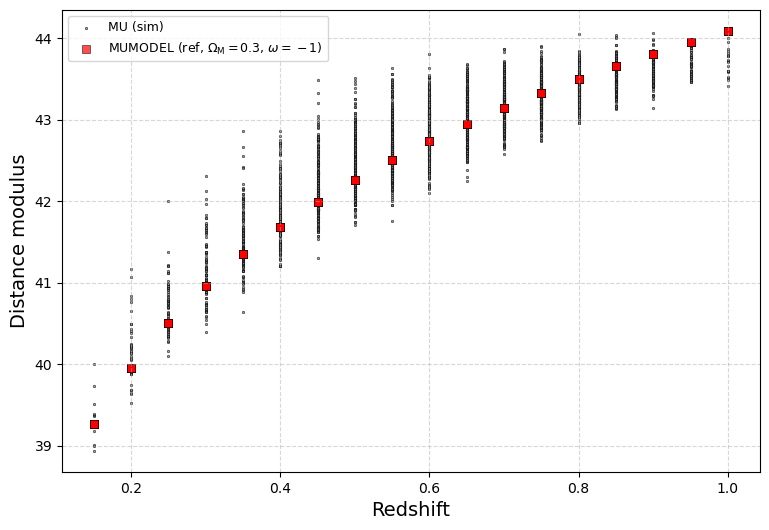

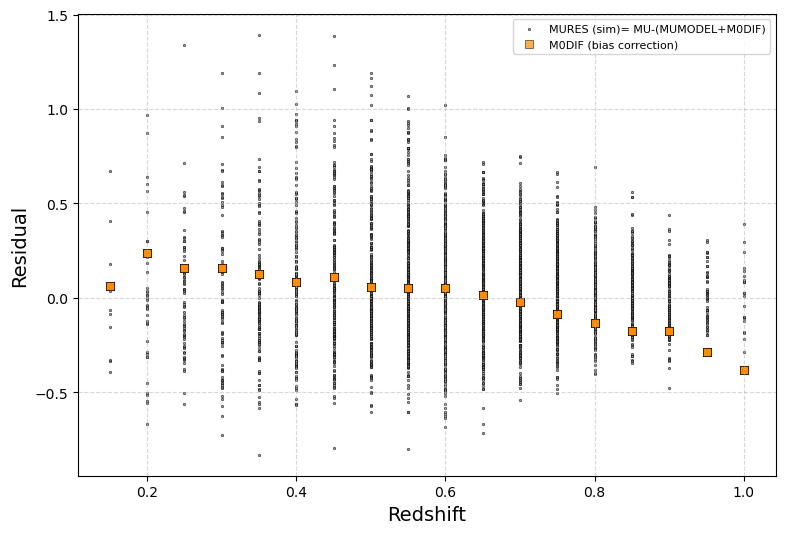

In [ ]:
# MURES = MU-(MUMODEL+M0DIF)# Larger figure size
import matplotlib.pyplot as plt
# Set the style
# First plot: MU and MUMODEL
plt.figure(figsize=(9, 6))
plt.scatter(
    redshift, MU,
    s=3, c='grey', alpha=0.7, edgecolor='black', linewidth=0.5, marker='o',
    label='MU (sim)'
)
plt.scatter(
    redshift, MUMODEL,
    s=30, c='red', alpha=0.7, edgecolor='black', linewidth=0.5, marker='s',
    label = r'MUMODEL (ref, $\Omega_\mathrm{M}=0.3$, $\omega=-1$)'
)
plt.xlabel('Redshift', fontsize=14)
plt.ylabel('Distance modulus', fontsize=14)
#plt.title('Distance modulus', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=9)
plt.show()

# Second plot: MURES and M0DIF
plt.figure(figsize=(9, 6))
plt.scatter(
    redshift, MURES,
    s=3, c='grey', alpha=0.7, edgecolor='black', linewidth=0.5, marker='o',
    label='MURES (sim)= MU-(MUMODEL+M0DIF)'
)
plt.scatter(
    redshift, M0DIF,
    s=30, c='darkorange', alpha=0.7, edgecolor='black', linewidth=0.5, marker='s',
    label='M0DIF (bias correction) '
)

plt.xlabel('Redshift', fontsize=14)
plt.ylabel('Residual', fontsize=14)
#plt.title('Residual', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=8)
plt.show()

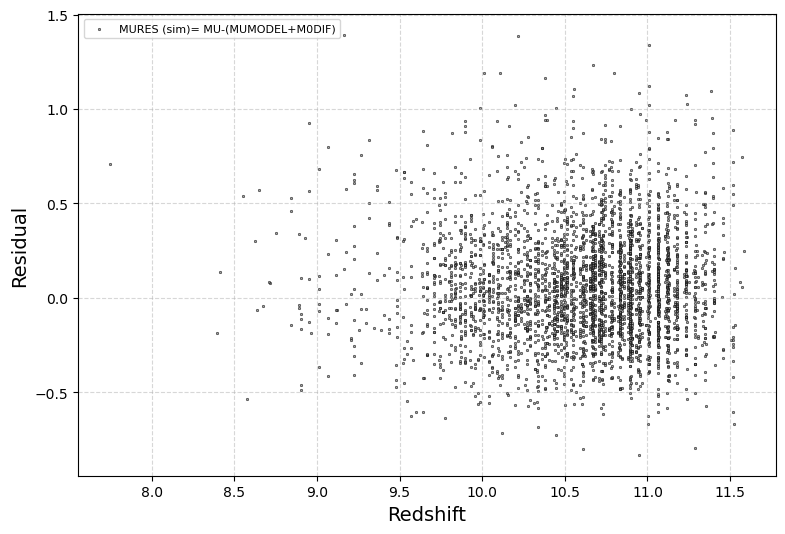

In [ ]:
# Second plot: MURES and M0DIF
plt.figure(figsize=(9, 6))
plt.scatter(
    mass, MURES,
    s=3, c='grey', alpha=0.7, edgecolor='black', linewidth=0.5, marker='o',
    label='MURES (sim)= MU-(MUMODEL+M0DIF)'
)

plt.xlabel('Redshift', fontsize=14)
plt.ylabel('Residual', fontsize=14)
#plt.title('Residual', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=8)
plt.show()

In [ ]:
#function:compute weighted average
def weighted_average(values, errors):
    """
    Calculate the weighted average of a list of values, where the weights are 1/(error^2).

    :param values: List of numerical values.
    :param errors: List of errors corresponding to the values.
    :return: The weighted average.
    """
    if len(values) != len(errors):
        raise ValueError("Values and errors must be of the same length.")
    
    # Calculate weights as 1/(error^2)
    weights = [1 / (error**2) for error in errors]
    
    weighted_sum = sum(value * weight for value, weight in zip(values, weights))
    total_weight = sum(weights)
    
    return weighted_sum / total_weight


#med_mass= np.median(mass)
med_mass=10

#split data into two
mass_below_median = df_output[mass <= med_mass]
mass_above_median = df_output[mass > med_mass]
mass_below_median

#weighted average for below median 
mass_values_bm = mass_below_median['MURES']
mass_weights_bm = mass_below_median['MUERR']
mass_wa_bm = weighted_average(mass_values_bm, mass_weights_bm)
print(f"(MASS) The weighted average below median is: {mass_wa_bm}")

#weighted average for above median
mass_values_am = mass_above_median['MURES']
mass_weights_am = mass_above_median['MUERR']
mass_wa_am = weighted_average(mass_values_am, mass_weights_am)
print(f"(MASS) The weighted average above median is: {mass_wa_am}")
mass_step= abs(mass_wa_am -mass_wa_bm)
print("(MASS) hubble residual diff:", mass_step)

(MASS) The weighted average below median is: 0.002457372564317238
(MASS) The weighted average above median is: -0.000490368331980745
(MASS) hubble residual diff: 0.0029477408962979832


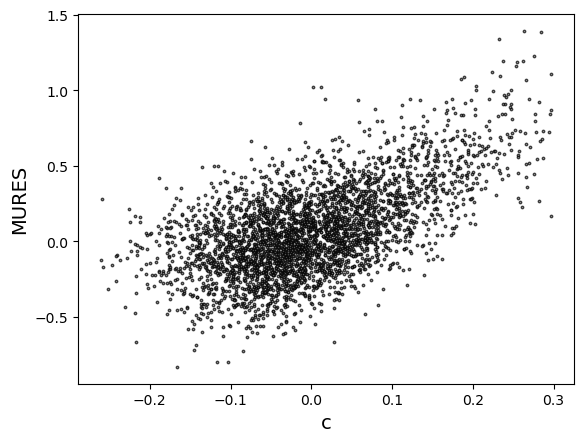

count    3091.000000
mean       -0.002242
std         0.096203
min        -0.261017
25%        -0.066107
50%        -0.011854
75%         0.052544
max         0.297358
Name: c, dtype: float64


In [ ]:
plt.scatter(
    df_output['c'],  df_output['MURES'],
    s=3, c='grey', alpha=0.7, edgecolor='black'
)
plt.xlabel('c', fontsize=14)
plt.ylabel('MURES', fontsize=14)
plt.show()
print(mass_above_median['c'].describe())

In [ ]:
#splitting data based on redshift value
z= df_output['zHD']
q1_z=np.percentile(z, 25)
#q1_z_med=np.median(q1_z)
med_z= np.percentile(z,50)
q3_z=np.percentile(z,75)
#%%
reg1= df_output[z < q1_z]
reg1_z_med = np.median(reg1['zHD'])
reg2 = df_output[(z >= q1_z) & (z < med_z)]
reg2_z_med = np.median(reg2['zHD'])
reg3 = df_output[(z >= med_z) & (z < q3_z)]
reg3_z_med = np.median(reg3['zHD'])
reg4= df_output[z>=q3_z]
reg4_z_med = np.median(reg4['zHD'])
print(reg1['zHD'])
print(reg2['zHD'])
print(reg3['zHD'])
print(np.min(z), np.min(reg1['zHD']))


SN:    0.15
SN:    0.15
SN:    0.15
SN:    0.15
SN:    0.15
       ... 
SN:    0.45
SN:    0.45
SN:    0.45
SN:    0.45
SN:    0.45
Name: zHD, Length: 749, dtype: float64
SN:    0.50
SN:    0.50
SN:    0.50
SN:    0.50
SN:    0.50
       ... 
SN:    0.55
SN:    0.55
SN:    0.55
SN:    0.55
SN:    0.55
Name: zHD, Length: 655, dtype: float64
SN:    0.6
SN:    0.6
SN:    0.6
SN:    0.6
SN:    0.6
      ... 
SN:    0.7
SN:    0.7
SN:    0.7
SN:    0.7
SN:    0.7
Name: zHD, Length: 1177, dtype: float64
0.15 0.15


In [ ]:
#%%
"""Mass"""
#find median of each region
#region 1
mass_z_reg1= reg1['HOST_LOGMASS']
med_mass_z_reg1= med_mass
#split data into two
mass_z_reg1_bm = reg1[mass_z_reg1 <= med_mass]
mass_z_reg1_am = reg1[mass_z_reg1 > med_mass]
#region 2
mass_z_reg2= reg2['HOST_LOGMASS']
med_mass_z_reg2= med_mass
#split data into two
mass_z_reg2_bm = reg2[mass_z_reg2 <= med_mass]
mass_z_reg2_am = reg2[mass_z_reg2 > med_mass]
#region 3
mass_z_reg3= reg3['HOST_LOGMASS']
med_mass_z_reg3= med_mass
#split data into two
mass_z_reg3_bm = reg3[mass_z_reg3 <= med_mass]
mass_z_reg3_am = reg3[mass_z_reg3 > med_mass]
#region 4
mass_z_reg4= reg4['HOST_LOGMASS']
med_mass_z_reg4= med_mass
#split data into two
mass_z_reg4_bm = reg4[mass_z_reg4 <= med_mass]
mass_z_reg4_am = reg4[mass_z_reg4 > med_mass]
print(mass_z_reg4_am)
# %%
#region1
#weighted average for below median 
mass_values_bm_z_reg1 = mass_z_reg1_bm['MURES']
mass_weights_bm_z_reg1 = mass_z_reg1_bm['MUERR']
mass_wa_bm_z_reg1 = weighted_average(mass_values_bm_z_reg1, mass_weights_bm_z_reg1)
print(f"[MASS] The weighted average below median for reg1 is: {mass_wa_bm_z_reg1}")
#weighted average for above median
mass_values_am_z_reg1 = mass_z_reg1_am['MURES']
mass_weights_am_z_reg1 = mass_z_reg1_am['MUERR']
mass_wa_am_z_reg1 = weighted_average(mass_values_am_z_reg1, mass_weights_am_z_reg1)
print(f"[MASS] The weighted average above median for reg1 is: {mass_wa_am_z_reg1}")
#region2
#weighted average for below median 
mass_values_bm_z_reg2 = mass_z_reg2_bm['MURES']
mass_weights_bm_z_reg2 = mass_z_reg2_bm['MUERR']
mass_wa_bm_z_reg2 = weighted_average(mass_values_bm_z_reg2, mass_weights_bm_z_reg2)
print(f"[MASS] The weighted average below median for reg2 is: {mass_wa_bm_z_reg2}")
#weighted average for above median
mass_values_am_z_reg2 = mass_z_reg2_am['MURES']
mass_weights_am_z_reg2 = mass_z_reg2_am['MUERR']
mass_wa_am_z_reg2 = weighted_average(mass_values_am_z_reg2, mass_weights_am_z_reg2)
print(f"[MASS] The weighted average above median for reg2 is: {mass_wa_am_z_reg2}")
#region3
#weighted average for below median 
mass_values_bm_z_reg3 = mass_z_reg3_bm['MURES']
mass_weights_bm_z_reg3 = mass_z_reg3_bm['MUERR']
mass_wa_bm_z_reg3 = weighted_average(mass_values_bm_z_reg3, mass_weights_bm_z_reg3)
print(f"[MASS] The weighted average below median for reg3 is: {mass_wa_bm_z_reg3}")
#weighted average for above median
mass_values_am_z_reg3 = mass_z_reg3_am['MURES']
mass_weights_am_z_reg3 = mass_z_reg3_am['MUERR']
mass_wa_am_z_reg3 = weighted_average(mass_values_am_z_reg3, mass_weights_am_z_reg3)
print(f"[MASS] The weighted average above median for reg3 is: {mass_wa_am_z_reg3}")
#region4
#weighted average for below median 
mass_values_bm_z_reg4 = mass_z_reg4_bm['MURES']
mass_weights_bm_z_reg4 = mass_z_reg4_bm['MUERR']
mass_wa_bm_z_reg4 = weighted_average(mass_values_bm_z_reg4, mass_weights_bm_z_reg4)
print(f"[MASS] The weighted average below median for reg4 is: {mass_wa_bm_z_reg4}")
#weighted average for above median
mass_values_am_z_reg4 = mass_z_reg4_am['MURES']
mass_weights_am_z_reg4 = mass_z_reg4_am['MUERR']
mass_wa_am_z_reg4 = weighted_average(mass_values_am_z_reg4, mass_weights_am_z_reg4)
print(f"[MASS] The weighted average above median for reg4 is: {mass_wa_am_z_reg4}")
# %%
print(mass_weights_bm_z_reg1)

      CID  IDSURVEY  TYPE         mB     mBERR      cERR     x1ERR   zHD  \
SN:  2590        10   101  24.038408  0.091950  0.074407  0.968304  0.75   
SN:  2591        10   101  24.373187  0.086459  0.073827  0.908060  0.75   
SN:  2592        10   101  23.677021  0.077937  0.068345  0.733266  0.75   
SN:  2593        10   101  23.885279  0.059978  0.051577  0.564028  0.75   
SN:  2594        10   101  24.127669  0.081330  0.068163  0.808531  0.75   
..    ...       ...   ...        ...       ...       ...       ...   ...   
SN:  3588        10   101  24.093327  0.096561  0.076795  0.937517  1.00   
SN:  3589        10   101  24.407784  0.077516  0.058146  0.834433  1.00   
SN:  3590        10   101  24.389436  0.094914  0.079256  0.968515  1.00   
SN:  3591        10   101  24.544199  0.093613  0.073085  0.939499  1.00   
SN:  3592        10   101  24.338279  0.074668  0.057391  0.666011  1.00   

     TYPE_1  zHDERR  ...        MU   MUMODEL    MUERR  MUERR_RAW  MUERR_VPEC  \
SN:    

In [ ]:
#region1
mass_step_z_reg1= mass_wa_am_z_reg1 - mass_wa_bm_z_reg1
print("[MASS] hubble residual diff for reg1:", mass_step_z_reg1, "with redshift=", reg1_z_med )
#region2
mass_step_z_reg2= mass_wa_am_z_reg2 - mass_wa_bm_z_reg2
print("[MASS] hubble residual diff for reg2:", mass_step_z_reg2, "with redshift=", reg2_z_med )
#region3
mass_step_z_reg3= mass_wa_am_z_reg3 - mass_wa_bm_z_reg3
print("[MASS] hubble residual diff for reg3:", mass_step_z_reg3, "with redshift=", reg3_z_med )
#region4
mass_step_z_reg4= mass_wa_am_z_reg4 - mass_wa_bm_z_reg4
print("[MASS] hubble residual diff for reg4:", mass_step_z_reg4, "with redshift=", reg4_z_med )

[MASS] hubble residual diff for reg1: -0.0035151721348899117 with redshift= 0.4
[MASS] hubble residual diff for reg2: -0.00376869066605748 with redshift= 0.55
[MASS] hubble residual diff for reg3: 0.0017745892615498565 with redshift= 0.65
[MASS] hubble residual diff for reg4: -0.012932992017694924 with redshift= 0.8


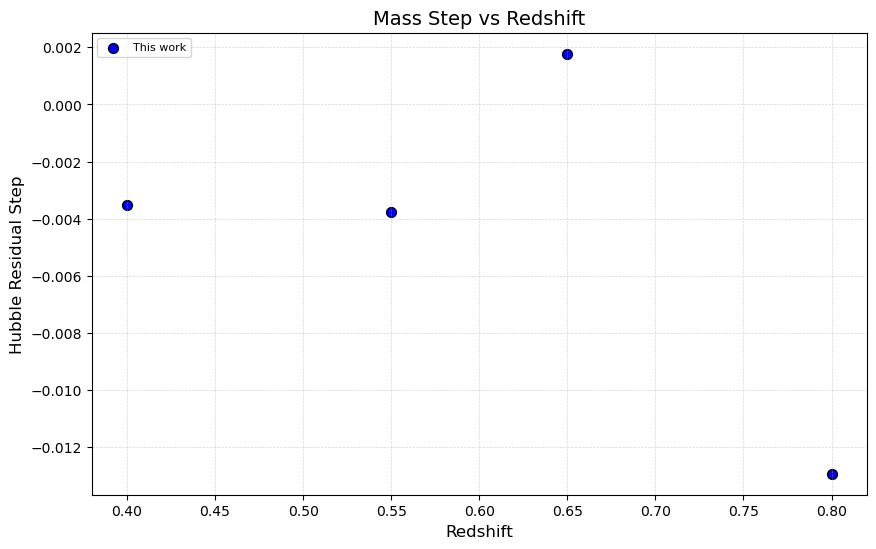

In [ ]:
plt.figure(figsize=(10, 6))

# Plotting OzDES data
ozdes_data = [(reg1_z_med, mass_step_z_reg1), (reg2_z_med, mass_step_z_reg2), 
              (reg3_z_med, mass_step_z_reg3), (reg4_z_med, mass_step_z_reg4)]
for z_med, mass_step_z in ozdes_data:
    plt.scatter(z_med, mass_step_z, color='blue', s=50, edgecolor='black', label=r'This work' if z_med == reg1_z_med else "")

# Labels and title
plt.xlabel(r'Redshift', fontsize=12)
plt.ylabel(r'Hubble Residual Step', fontsize=12)
plt.title(r'Mass Step vs Redshift', fontsize=14)

# Grid and legend
plt.grid(alpha=0.5, linestyle='--', linewidth=0.5)
plt.legend(fontsize=8, loc='upper left')

plt.show()  # Show the plot

# COMPARE RESULT FROM H5 AND FITRES

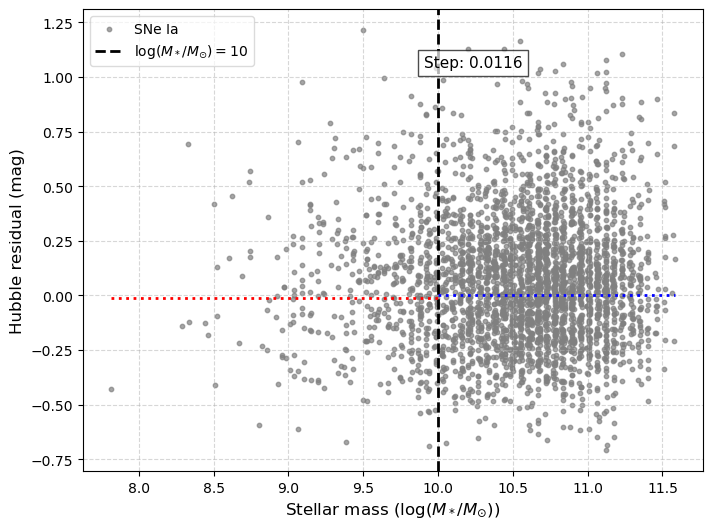

In [ ]:
plt.figure(figsize=(8, 6))

# Scatter plot for the data points
plt.scatter(mass, MURES, s=10, color='gray', alpha=0.7, label='SNe Ia')

# Labels and titles
plt.xlabel(r'Stellar mass ($\log(M_*/M_{\odot})$)', fontsize=12)
plt.ylabel(r'Hubble residual (mag)', fontsize=12)
#plt.title(r'Hubble residuals vs Mass', fontsize=14)

# Add the vertical and horizontal lines
plt.axvline(x=med_mass, color='black', linestyle='--', lw=2, label='$\log(M_*/M_{\odot}) = 10$')
plt.hlines(mass_wa_bm, xmin=mass.min(), xmax=med_mass, color='red', linestyle=':', lw=2)  # Left side
plt.hlines(mass_wa_am, xmin=med_mass, xmax=mass.max(), color='blue', linestyle=':', lw=2)  # Right side


# Add grid for better visualization
plt.grid(True, linestyle='--', alpha=0.5)

# Adjusted legend style: Only one entry for weighted average w/ error
plt.legend(loc='upper left', fontsize=10, frameon=True, fancybox=True, framealpha=0.7)

# Add custom text annotation for the step
plt.text(0.55, 0.9, rf'Step: {mass_step:.4f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Display the plot
plt.show()

/priv/debass/DES/SIMS/sims/SNe/for_BBC/age_step_Rv_lo_hicut_tested
[]
0
0.0


/tmp/ipykernel_3481592/2732072267.py:55: RuntimeWarning: divide by zero encountered in scalar divide
  scaling_factor = 1600 / np.sum(n_array_raw)


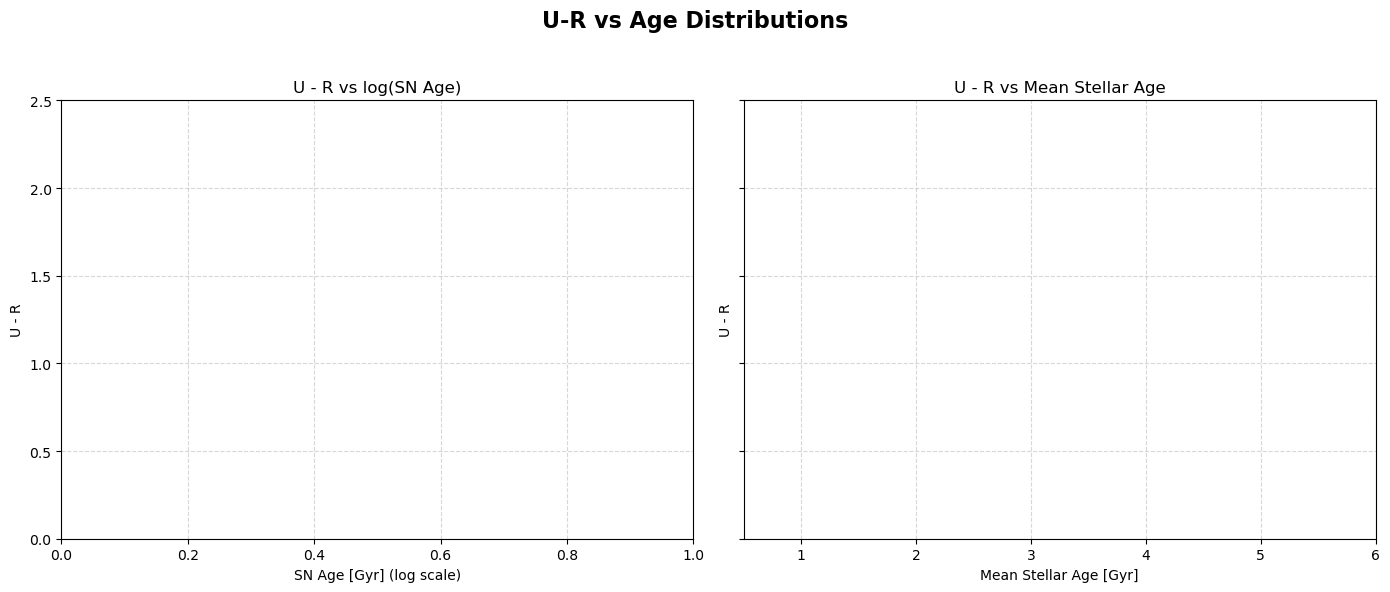

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
        0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
        0.9  , 0.925, 0.95 , 0.975, 1.   ]),
 <BarContainer object of 40 artists>)

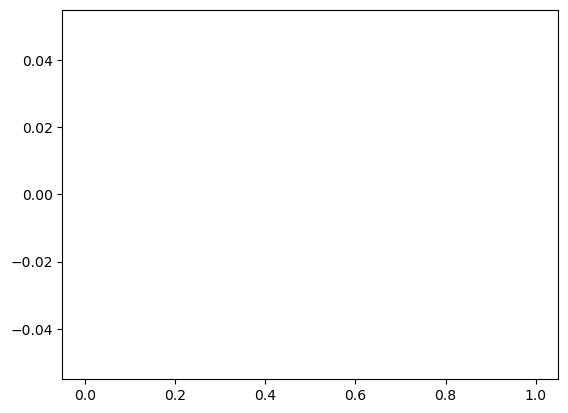

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

import pandas as pd
import os
# Define the file path

DESSIMS = os.environ['DESSIMS'] 
SN_path= os.path.join(DESSIMS, 'sims', 'SNe', 'for_BBC') # Make sure SN_sim is set in your environment
age_step_Rv_lo_hicut_test = os.path.join(SN_path, 'age_step_Rv_lo_hicut_tested')
print(age_step_Rv_lo_hicut_test)

# Collect files
h5_files = glob.glob(os.path.join(age_step_Rv_lo_hicut_test, "*.h5"))
print(h5_files)

# Initialize lists
z_list, mass_list, u_list, n_list, c_list = [], [], [], [], []
mr_lis, x1_list, mean_age_list, sn_age_list = [], [], [], []

# Load data
for file in h5_files:
    try:
        df = pd.read_hdf(file, key="/sim")
        z_list.extend(df["z"].values)
        mass_list.extend(df["mass"].values)
        u_list.extend(df["U-R"].values)
        n_list.extend(df["n"].values)
        c_list.extend(df["c"].values)
        mr_lis.extend(df["m_r"].values)
        x1_list.extend(df["x1"].values)
        mean_age_list.extend(df["mean_ages"].values)
        sn_age_list.extend(df["SN_age"].values)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Convert to arrays
sn_age_array = np.array(sn_age_list)
z_array = np.array(z_list)
mass_array = np.array(mass_list)
ur_array = np.array(u_list)
n_array_raw = np.array(n_list)
c_array = np.array(c_list)
mr_array = np.array(mr_lis)
x1_array = np.array(x1_list)
mean_age_array = np.array(mean_age_list)
logmass_array = np.log10(mass_array)
print(len(z_array > 0.15))

# Scale weights
scaling_factor = 1600 / np.sum(n_array_raw)
n_array = n_array_raw * scaling_factor
print(np.sum(n_array))
# Plotting
import matplotlib.ticker as ticker

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig.suptitle("U-R vs Age Distributions", fontsize=16, weight='bold')

# --- 1. U-R vs log(SN Age) ---
log_sn_age = np.log10(sn_age_array)

sns.kdeplot(
    x=sn_age_array,
    y=ur_array,
    weights=n_array,
    fill=False,
    cmap="viridis",
    ax=axs[0],
    levels=10,
    linewidths=1.2
)

#axs[0].set_xticks([-1, 0, 1])
#axs[0].set_xticklabels([r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$'])
axs[0].set_xlabel("SN Age [Gyr] (log scale)")
axs[0].set_ylabel("U - R")
axs[0].set_ylim(0,2.5)
axs[0].set_title("U - R vs log(SN Age)")
axs[0].grid(True, linestyle='--', alpha=0.5)

# --- 2. U-R vs Mean Stellar Age ---
sns.kdeplot(
    x=mean_age_array/1000,
    y=ur_array,
    weights=n_array,
    fill=False,
    cmap="plasma",
    ax=axs[1],
    levels=10,
    linewidths=1.2
)

axs[1].set_xlabel("Mean Stellar Age [Gyr]")
axs[1].set_ylabel("U - R")
axs[1].set_title("U - R vs Mean Stellar Age")
axs[1].set_xlim(0.5, 6)
axs[1].set_ylim(0,2.5)
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

plt.hist(z_array, bins=40)

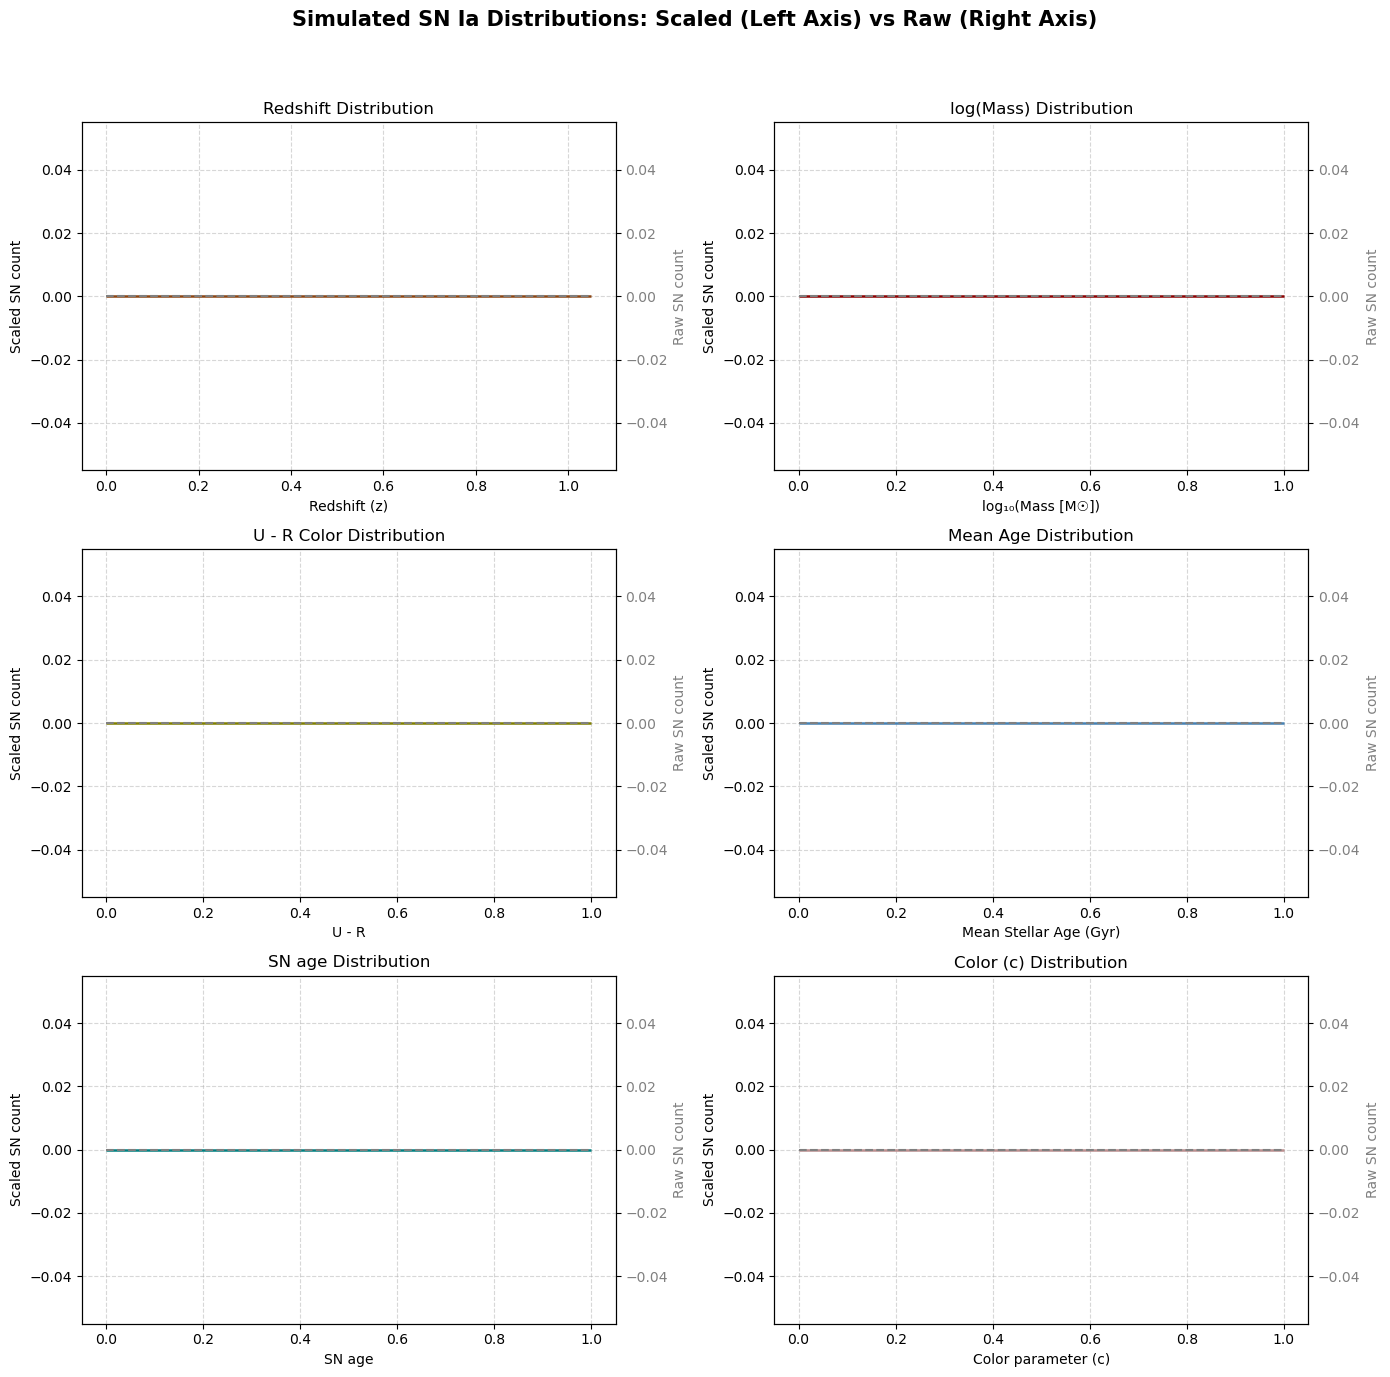

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 2, figsize=(14, 14))
fig.suptitle("Simulated SN Ia Distributions: Scaled (Left Axis) vs Raw (Right Axis)", fontsize=15, weight='bold')

def dual_axis_step_hist(ax, data, raw_weights, scaled_weights, bins, xlabel, title, scaled_color):
    ax2 = ax.twinx()

    bin_edges = np.histogram_bin_edges(data, bins=bins)

    # Scaled histogram (on left)
    ax.hist(data, bins=bin_edges, weights=scaled_weights, histtype='step', color=scaled_color,
            linewidth=1.8, linestyle='-', label='Scaled')
    ax.set_ylabel('Scaled SN count', color='black')
    ax.tick_params(axis='y', labelcolor='black')

    # Raw histogram (on right)
    ax2.hist(data, bins=bin_edges, weights=raw_weights, histtype='step', color='gray',
             linewidth=1.5, linestyle='--', label='Raw')
    ax2.set_ylabel('Raw SN count', color='gray')
    ax2.tick_params(axis='y', labelcolor='gray')

    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.grid(True, linestyle='--', alpha=0.5)

# Row 1
dual_axis_step_hist(
    ax=axs[0, 0],
    data=z_array,
    raw_weights=n_array_raw,
    scaled_weights=n_array,
    bins=np.arange(0, 1.1, 0.05),
    xlabel='Redshift (z)',
    title='Redshift Distribution',
    scaled_color='saddlebrown'
)

dual_axis_step_hist(
    ax=axs[0, 1],
    data=logmass_array,
    raw_weights=n_array_raw,
    scaled_weights=n_array,
    bins=15,
    xlabel='log₁₀(Mass [M☉])',
    title='log(Mass) Distribution',
    scaled_color='darkred'
)

# Row 2
dual_axis_step_hist(
    ax=axs[1, 0],
    data=ur_array,
    raw_weights=n_array_raw,
    scaled_weights=n_array,
    bins=20,
    xlabel='U - R',
    title='U - R Color Distribution',
    scaled_color='olive'
)

dual_axis_step_hist(
    ax=axs[2, 1],
    data=c_array,
    raw_weights=n_array_raw,
    scaled_weights=n_array,
    bins=20,
    xlabel='Color parameter (c)',
    title='Color (c) Distribution',
    scaled_color='rosybrown'
)

# Row 3
dual_axis_step_hist(
    ax=axs[2, 0],
    data=sn_age_array,
    raw_weights=n_array_raw,
    scaled_weights=n_array,
    bins=20,
    xlabel='SN age',
    title='SN age Distribution',
    scaled_color='teal'
)

dual_axis_step_hist(
    ax=axs[1, 1],
    data=mean_age_array/1000,
    raw_weights=n_array_raw,
    scaled_weights=n_array,
    bins=20,
    xlabel='Mean Stellar Age (Gyr)',
    title='Mean Age Distribution',
    scaled_color='steelblue'
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
import pandas as pd

#file_path = '/priv/debass/DES/SIMS/sims/FITOPT000_MUOPT000.FITRES' #output
file_path= '/priv/debass/DES/SIMS/sims/SNe/for_BBC/age_step_Rv_lo_hicut_tested/FITOPT000.FITRES' # input

# Step 1: Find the VARNAMES line
with open(file_path, 'r') as f:
    lines = f.readlines()

column_names = None
for line in lines:
    if line.startswith('VARNAMES:'):
        column_names = line.replace('VARNAMES:', '').strip().split()
        break

if column_names is None:
    raise ValueError("VARNAMES line not found in FITRES file")

# Step 2: Make column names unique
from collections import Counter

counts = Counter()
unique_column_names = []
for name in column_names:
    if counts[name]:
        unique_column_names.append(f"{name}_{counts[name]}")
    else:
        unique_column_names.append(name)
    counts[name] += 1

# Step 3: Find the line number where the SN data starts
data_start_index = None
for i, line in enumerate(lines):
    if line.startswith('SN:'):
        data_start_index = i
        break

if data_start_index is None:
    raise ValueError("Data (SN:) section not found in FITRES file")

# Step 4: Read the data
df = pd.read_csv(
    file_path,
    delim_whitespace=True,
    skiprows=data_start_index,
    names=unique_column_names,
    comment='#'
)

# Preview
print("Columns:", df.columns.tolist())
print(df)


FileNotFoundError: [Errno 2] No such file or directory: '/priv/debass/DES/SIMS/sims/SNe/for_BBC/age_step_Rv_lo_hicut_tested/FITOPT000.FITRES'

## the example of compariosn distmod by using age config file

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def load_fitres(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    # Find VARNAMES line
    column_names = None
    for line in lines:
        if line.startswith('VARNAMES:'):
            column_names = line.replace('VARNAMES:', '').strip().split()
            break
    if column_names is None:
        raise ValueError(f"VARNAMES line not found in {file_path}")

    # Make column names unique
    counts = Counter()
    unique_column_names = []
    for name in column_names:
        if counts[name]:
            unique_column_names.append(f"{name}_{counts[name]}")
        else:
            unique_column_names.append(name)
        counts[name] += 1

    # Find data start index
    data_start_index = None
    for i, line in enumerate(lines):
        if line.startswith('SN:'):
            data_start_index = i
            break
    if data_start_index is None:
        raise ValueError(f"Data (SN:) section not found in {file_path}")

    df = pd.read_csv(
        file_path,
        delim_whitespace=True,
        skiprows=data_start_index,
        names=unique_column_names,
        comment='#'
    )
    return df

# File paths
input_file = '/priv/debass/DES/SIMS/sims/SNe/for_BBC/age_step_Rv_lo_hicut_tested/FITOPT000.FITRES'
output_file = '/priv/debass/DES/SIMS/sims/FITOPT000_MUOPT000.FITRES'

# Load data
df_input = load_fitres(input_file)
df_output = load_fitres(output_file)

# Extract columns
distmod = df_input['distmod'].dropna()
MU = df_output['MU'].dropna()

# Use common bin edges for comparison
all_data = np.concatenate([distmod, MU])
bins = np.linspace(all_data.min(), all_data.max(), 30)

plt.figure(figsize=(10, 6))
plt.hist(distmod, bins=bins, alpha=0.6, label='distance modulus before BBC', color='#7bb7f6', edgecolor='black')
plt.hist(MU, bins=bins, alpha=0.6, label='distance modulus after BBC', color="#A68B41", edgecolor='black')
plt.xlabel('Distance Modulus', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('BBC Correction', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/priv/debass/DES/SIMS/sims/SNe/for_BBC/age_step_Rv_lo_hicut_tested/FITOPT000.FITRES'

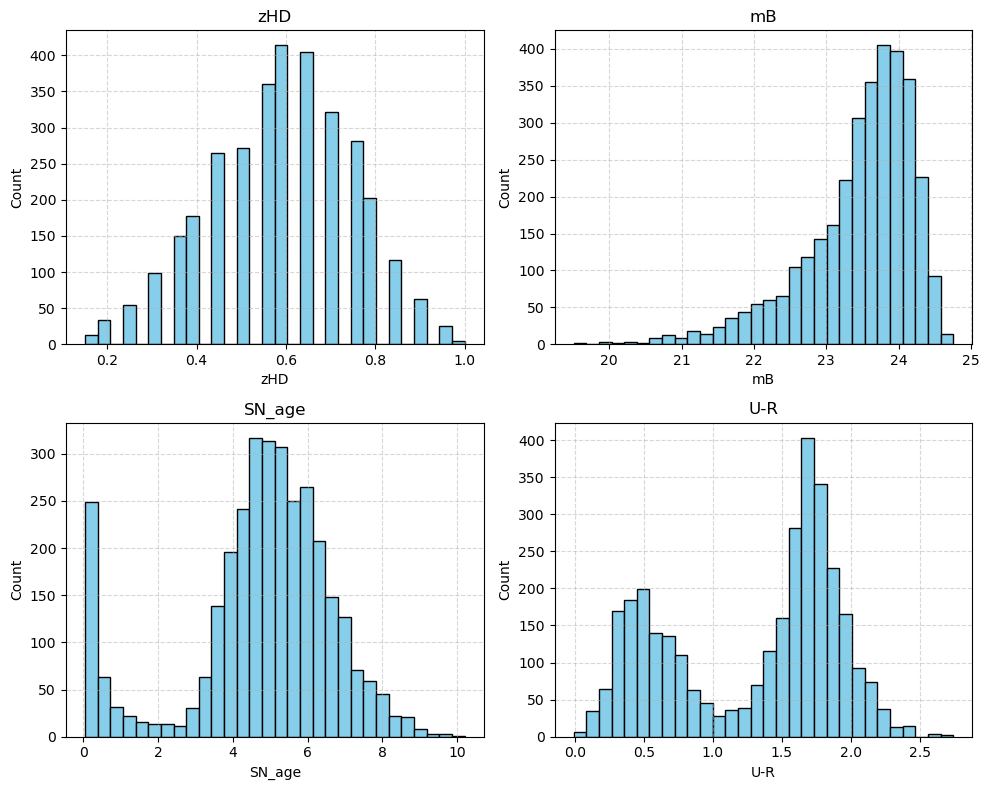

      CID  IDSURVEY  TYPE         mB     mBERR      cERR     x1ERR   zHD  \
SN:     7        10   101  20.393625  0.025000  0.020000  0.220980  0.15   
SN:     8        10   101  20.118625  0.027689  0.022703  0.163818  0.15   
SN:     9        10   101  20.783994  0.028719  0.024614  0.145534  0.15   
SN:    10        10   101  20.761115  0.030064  0.026671  0.297468  0.15   
SN:    11        10   101  21.335297  0.026749  0.025479  0.171231  0.15   
..    ...       ...   ...        ...       ...       ...       ...   ...   
SN:  3261        10   101  24.666158  0.094910  0.074701  0.857193  1.00   
SN:  3262        10   101  24.441163  0.081652  0.066164  0.711868  1.00   
SN:  3263        10   101  24.623068  0.093178  0.072031  0.911350  1.00   
SN:  3264        10   101  24.620733  0.091214  0.070696  0.893063  1.00   
SN:  3265        10   101  24.405141  0.081048  0.067896  0.898885  1.00   

     TYPE_1  zHDERR  ...        rv         E   host_Av       U-R         c  \
SN:     1

In [ ]:
import matplotlib.pyplot as plt
# Example: plot histograms for selected columns (only if they exist)
columns_to_plot = ['zHD', 'mB', 'SN_age', 'U-R']

plt.figure(figsize=(10, 8))
for i, col in enumerate(columns_to_plot, 1):
    if col in df.columns:
        plt.subplot(2, 2, i)
        df[col].dropna().hist(bins=30, color='skyblue', edgecolor='black')
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.grid(True, linestyle='--', alpha=0.5)
    else:
        print(f"Column '{col}' not found.")

plt.tight_layout()
plt.show()

print(df)

In [ ]:
z_des = filtered['zHD']
z_sub = df_merged['zHD']
z_sim = df['zHD']

mass_des = filtered['HOST_LOGMASS']
mass_sub = df_merged['HOST_LOGMASS']
mass_sim = df['HOST_LOGMASS']

color_des = filtered['HOST_COLOR']
color_sub = df_merged['HOST_COLOR']
color_sim = df['U-R']



/tmp/ipykernel_1557913/4239272076.py:80: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


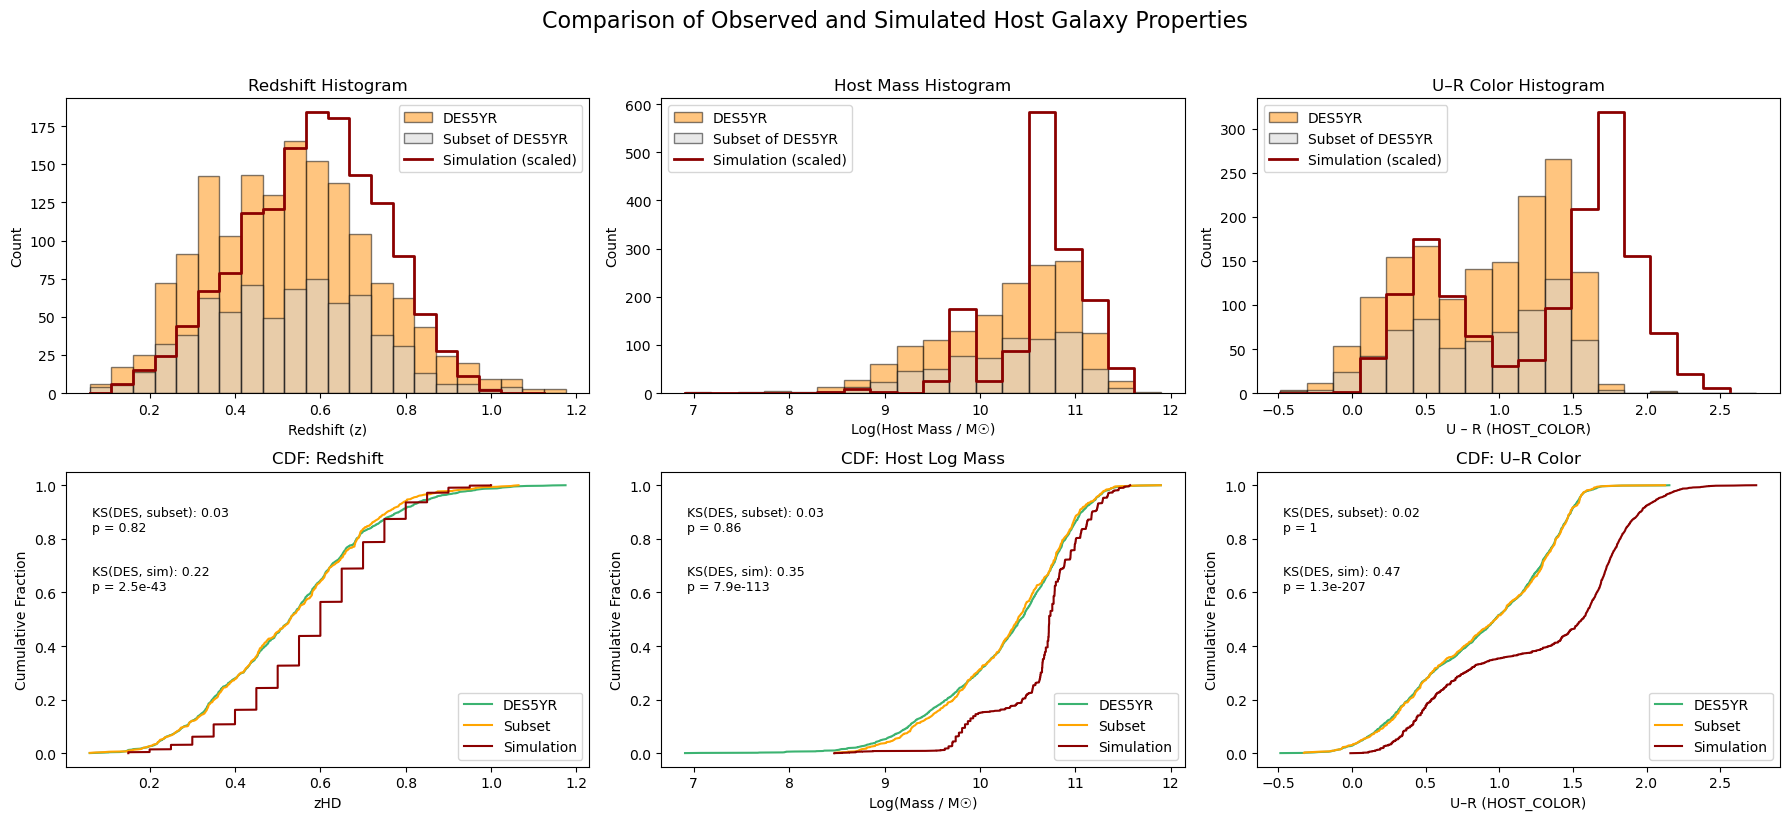

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Scale factor for simulation counts
scale_factor = 1600 / 3600

# Bin edges for histograms
bins_z = np.histogram_bin_edges(np.concatenate([z_des, z_sub, z_sim]), bins=22)
bins_mass = np.histogram_bin_edges(np.concatenate([mass_des, mass_sub, mass_sim]), bins=18)
bins_color = np.histogram_bin_edges(np.concatenate([color_des, color_sub, color_sim]), bins=18)

fig, axs = plt.subplots(2, 3, figsize=(18, 8), constrained_layout=True)

# --- Plot histograms (top row) ---

# Redshift
counts_sim, bin_edges = np.histogram(z_sim, bins=bins_z)
scaled_counts_sim = counts_sim * scale_factor
axs[0, 0].hist(z_des, bins=bins_z, alpha=0.5, label='DES5YR', color='darkorange', edgecolor='black')
axs[0, 0].hist(z_sub, bins=bins_z, alpha=0.5, label='Subset of DES5YR', color='lightgray', edgecolor='black')
axs[0, 0].step(bin_edges[:-1], scaled_counts_sim, where='post', color='darkred', linewidth=2, label='Simulation (scaled)')
axs[0, 0].set_title('Redshift Histogram')
axs[0, 0].set_xlabel('Redshift (z)')
axs[0, 0].set_ylabel('Count')
axs[0, 0].legend()

# Host Mass
counts_sim, bin_edges = np.histogram(mass_sim, bins=bins_mass)
scaled_counts_sim = counts_sim * scale_factor
axs[0, 1].hist(mass_des, bins=bins_mass, alpha=0.5, label='DES5YR', color='darkorange', edgecolor='black')
axs[0, 1].hist(mass_sub, bins=bins_mass, alpha=0.5, label='Subset of DES5YR', color='lightgray', edgecolor='black')
axs[0, 1].step(bin_edges[:-1], scaled_counts_sim, where='post', color='darkred', linewidth=2, label='Simulation (scaled)')
axs[0, 1].set_title('Host Mass Histogram')
axs[0, 1].set_xlabel('Log(Host Mass / M☉)')
axs[0, 1].set_ylabel('Count')
axs[0, 1].legend()

# U–R Color
counts_sim, bin_edges = np.histogram(color_sim, bins=bins_color)
scaled_counts_sim = counts_sim * scale_factor
axs[0, 2].hist(color_des, bins=bins_color, alpha=0.5, label='DES5YR', color='darkorange', edgecolor='black')
axs[0, 2].hist(color_sub, bins=bins_color, alpha=0.5, label='Subset of DES5YR', color='lightgray', edgecolor='black')
axs[0, 2].step(bin_edges[:-1], scaled_counts_sim, where='post', color='darkred', linewidth=2, label='Simulation (scaled)')
axs[0, 2].set_title('U–R Color Histogram')
axs[0, 2].set_xlabel('U – R (HOST_COLOR)')
axs[0, 2].set_ylabel('Count')
axs[0, 2].legend()

# --- Plot CDFs (bottom row) ---
def plot_cdf(ax, d1, d2, d3, label1, label2, label3, title, xlabel):
    s1 = np.sort(d1)
    s2 = np.sort(d2)
    s3 = np.sort(d3)

    cdf1 = np.arange(1, len(s1)+1) / len(s1)
    cdf2 = np.arange(1, len(s2)+1) / len(s2)
    cdf3 = np.arange(1, len(s3)+1) / len(s3)

    ax.plot(s1, cdf1, label=label1, color='mediumseagreen')
    ax.plot(s2, cdf2, label=label2, color='orange')
    ax.plot(s3, cdf3, label=label3, color='darkred')

    ks_12 = ks_2samp(d1, d2)
    ks_13 = ks_2samp(d1, d3)

    ax.text(0.05, 0.8, f'KS(DES, subset): {ks_12.statistic:.2f}\np = {ks_12.pvalue:.2g}', transform=ax.transAxes, fontsize=9)
    ax.text(0.05, 0.6, f'KS(DES, sim): {ks_13.statistic:.2f}\np = {ks_13.pvalue:.2g}', transform=ax.transAxes, fontsize=9)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Cumulative Fraction')
    ax.legend()

plot_cdf(axs[1, 0], z_des, z_sub, z_sim, 'DES5YR', 'Subset', 'Simulation', 'CDF: Redshift', 'zHD')
plot_cdf(axs[1, 1], mass_des, mass_sub, mass_sim, 'DES5YR', 'Subset', 'Simulation', 'CDF: Host Log Mass', 'Log(Mass / M☉)')
plot_cdf(axs[1, 2], color_des, color_sub, color_sim, 'DES5YR', 'Subset', 'Simulation', 'CDF: U–R Color', 'U–R (HOST_COLOR)')

plt.suptitle("Comparison of Observed and Simulated Host Galaxy Properties", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


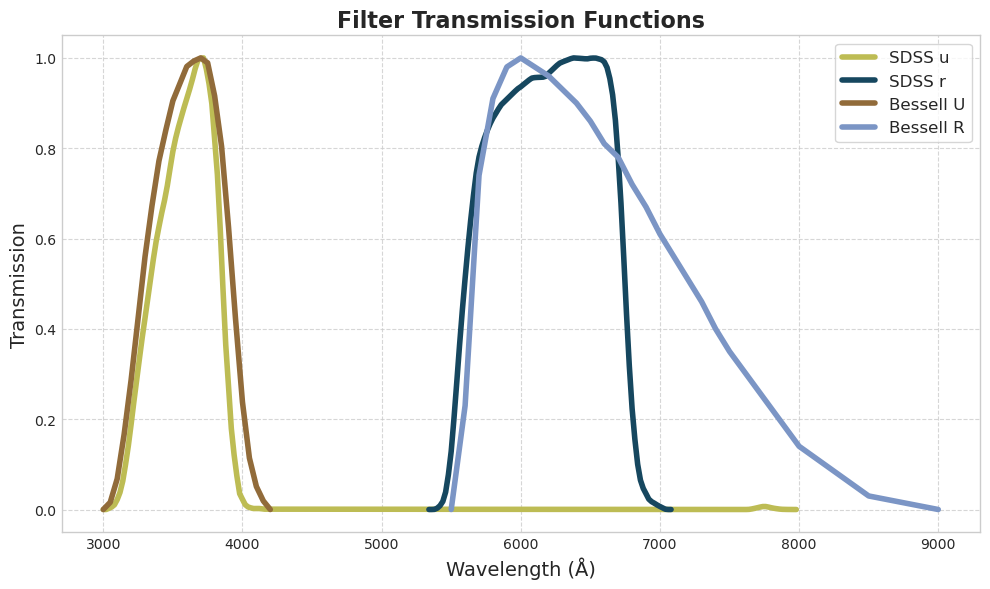

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Use a clean, modern style
plt.style.use('seaborn-v0_8-whitegrid')

# Directory with filter files
filter_dir = '/priv/debass/DES/SIMS/filters'

# Filter files and labels
filters = {
    'SDSSu.dat': 'SDSS u',
    'SDSSr.dat': 'SDSS r',
    'BessellU.dat': 'Bessell U',
    'BessellR.dat': 'Bessell R'
}

# Use colorblind-friendly palette
colors = ["#BDBC54", "#16475F", "#916B3A", "#7B95C5"]

plt.figure(figsize=(10, 6))

for (fname, label), color in zip(filters.items(), colors):
    path = os.path.join(filter_dir, fname)
    data = np.loadtxt(path)
    wavelength = data[:, 0]
    transmission = data[:, 1]
    plt.plot(
        wavelength, transmission, label=label,
        color=color, linewidth=4
    )

plt.xlabel('Wavelength (Å)', fontsize=14)
plt.ylabel('Transmission', fontsize=14)
plt.title('Filter Transmission Functions', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, frameon=True, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.8)

# Increase margins: values < 1 move the plot inward from the edge
plt.subplots_adjust(left=0.3, right=2, top=0.7, bottom=0.3)
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/priv/debass/DES/SIMS/sims/SNe/for_BBC/age_step_Rv_lo_hicut_tested/FITOPT000.FITRES'